In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_path = "data/train.csv"
test_path = "data/test.csv"


In [2]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

# the competition uses only the f1 score as a metrics so we will use the same metrics to be noted

In [3]:
train.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
print(train.shape,test.shape)

(54808, 14) (23490, 13)


In [5]:
print(train['department'].unique())
print(train['region'].unique())
print(train['education'].unique())
print(train['education'].unique())

['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
["Master's & above" "Bachelor's" nan 'Below Secondary']
["Master's & above" "Bachelor's" nan 'Below Secondary']


In [6]:
## checking for the null values
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [7]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [8]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [9]:
# Now we conclude that only education and previous_year_rating has missing values so we will look into this by finding corr matrix

corr_train = train.corr()

In [10]:
corr_train

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000437,0.004533,0.001274,-0.002501,0.008420,-0.000586,0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.063126,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,0.000437,-0.081278,1.000000,0.006008,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,0.004533,-0.063126,0.006008,1.000000,0.000253,0.351578,0.027738,0.075139,0.159320
length_of_service,0.001274,-0.057275,0.657111,0.000253,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.002501,-0.045576,-0.025592,0.351578,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won?,0.008420,-0.007628,-0.008169,0.027738,-0.039927,0.097000,1.000000,0.072138,0.195871
avg_training_score,-0.000586,0.042517,-0.048380,0.075139,-0.038122,0.078391,0.072138,1.000000,0.181147
is_promoted,0.001206,-0.024896,-0.017166,0.159320,-0.010670,0.221582,0.195871,0.181147,1.000000


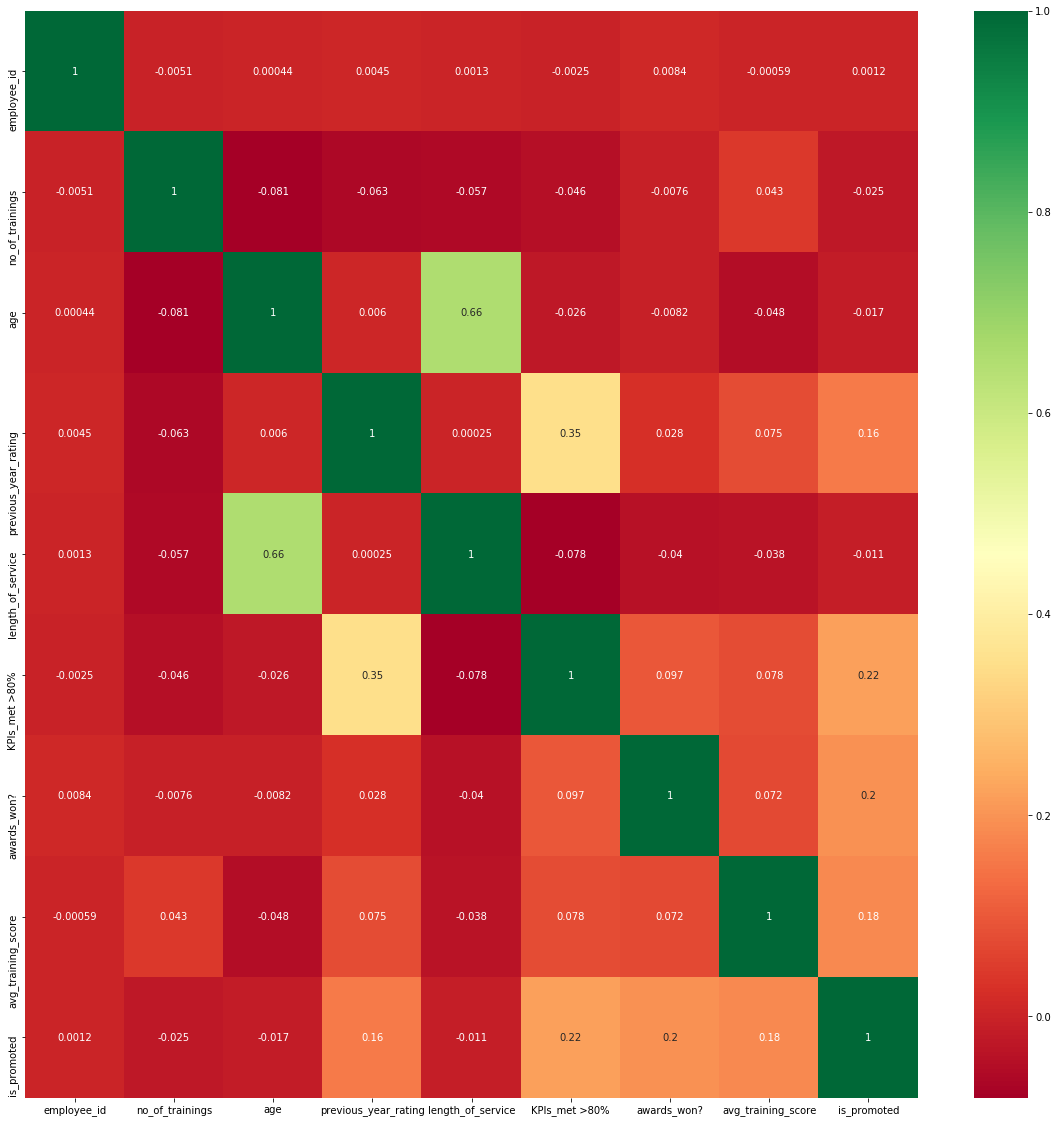

In [11]:
import seaborn as sns
top_corr_features = corr_train.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [12]:
# So let us fill the null values with mean values
# but yes we are going to fill the null values for the numerical(previous_year_rating) and for categorical (education)

print(train.groupby(['is_promoted'])['education'].value_counts())
# so we will replace the categorical values with predominant as Bachelor's degree 

train['education'].fillna("Bachelor's",inplace=True)

# and similarly we will replace the previous_year_rating with mean values

train['previous_year_rating']=train['previous_year_rating'].fillna(train['previous_year_rating'].mean())

is_promoted  education       
0            Bachelor's          33661
             Master's & above    13454
             Below Secondary       738
1            Bachelor's           3008
             Master's & above     1471
             Below Secondary        67
Name: education, dtype: int64


In [13]:
train.isnull().any()

employee_id             False
department              False
region                  False
education               False
gender                  False
recruitment_channel     False
no_of_trainings         False
age                     False
previous_year_rating    False
length_of_service       False
KPIs_met >80%           False
awards_won?             False
avg_training_score      False
is_promoted             False
dtype: bool

# Now we have handled the missing values for both the categorical and numerical values

In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder() 


lst = ['department', 'region', 'education', 'gender','recruitment_channel']

for val in lst:
    train[val] = label_encoder.fit_transform(train[val])

In [15]:
X = train.iloc[:,:13]
y = train.iloc[:,13:]

In [16]:
# Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

C:\Users\Aakash Babu\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


ExtraTreesRegressor()

In [17]:
print(model.feature_importances_)

[0.11658381 0.13917333 0.09211954 0.01674121 0.02274337 0.03272659
 0.02751504 0.0980506  0.05124859 0.08516365 0.04853083 0.03381792
 0.23558554]


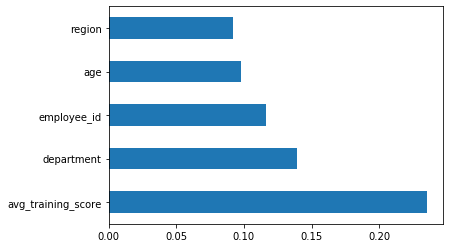

In [18]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Now let us fine tune the parameters using Random search CV


In [84]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [20]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [40]:
#Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, 
                               cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [41]:
rf_random.fit(X_train,y_train.values.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  39.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   38.9s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  44.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  39.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  40.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  38.9s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total= 1.3min
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=  28.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=  24.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=  19.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=  24.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=  19.3s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 31.8min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [42]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [43]:
rf_random.best_score_

-0.068082888049003

In [44]:
predictions=rf_random.predict(X_test)

In [46]:
from sklearn.metrics import f1_score

print(f1_score(y_test,predictions))

0.3773584905660377


In [50]:
from catboost import CatBoostClassifier


model = CatBoostClassifier(iterations=1000)

model.fit(X_train,
          y_train,
          verbose=True)

pred = model.predict(X_test)


Learning rate set to 0.048896
0:	learn: 0.6369508	total: 82ms	remaining: 1m 21s
1:	learn: 0.5904555	total: 123ms	remaining: 1m 1s
2:	learn: 0.5466461	total: 160ms	remaining: 53.3s
3:	learn: 0.5109243	total: 183ms	remaining: 45.7s
4:	learn: 0.4665270	total: 212ms	remaining: 42.3s
5:	learn: 0.4417088	total: 243ms	remaining: 40.2s
6:	learn: 0.4139756	total: 269ms	remaining: 38.1s
7:	learn: 0.3938320	total: 293ms	remaining: 36.3s
8:	learn: 0.3779461	total: 318ms	remaining: 35.1s
9:	learn: 0.3624722	total: 343ms	remaining: 33.9s
10:	learn: 0.3405124	total: 370ms	remaining: 33.3s
11:	learn: 0.3298580	total: 396ms	remaining: 32.6s
12:	learn: 0.3201997	total: 421ms	remaining: 32s
13:	learn: 0.3079298	total: 447ms	remaining: 31.5s
14:	learn: 0.3006158	total: 472ms	remaining: 31s
15:	learn: 0.2938704	total: 497ms	remaining: 30.6s
16:	learn: 0.2850888	total: 521ms	remaining: 30.1s
17:	learn: 0.2744034	total: 548ms	remaining: 29.9s
18:	learn: 0.2697685	total: 579ms	remaining: 29.9s
19:	learn: 0.26

163:	learn: 0.1674979	total: 4.58s	remaining: 23.3s
164:	learn: 0.1674454	total: 4.61s	remaining: 23.3s
165:	learn: 0.1674003	total: 4.63s	remaining: 23.3s
166:	learn: 0.1673059	total: 4.66s	remaining: 23.3s
167:	learn: 0.1672487	total: 4.7s	remaining: 23.3s
168:	learn: 0.1671393	total: 4.73s	remaining: 23.2s
169:	learn: 0.1670623	total: 4.76s	remaining: 23.2s
170:	learn: 0.1669859	total: 4.78s	remaining: 23.2s
171:	learn: 0.1668900	total: 4.81s	remaining: 23.1s
172:	learn: 0.1668358	total: 4.83s	remaining: 23.1s
173:	learn: 0.1667786	total: 4.86s	remaining: 23.1s
174:	learn: 0.1667242	total: 4.89s	remaining: 23s
175:	learn: 0.1666820	total: 4.92s	remaining: 23s
176:	learn: 0.1665507	total: 4.94s	remaining: 23s
177:	learn: 0.1662031	total: 4.97s	remaining: 23s
178:	learn: 0.1659765	total: 5.01s	remaining: 23s
179:	learn: 0.1659369	total: 5.04s	remaining: 23s
180:	learn: 0.1658453	total: 5.07s	remaining: 22.9s
181:	learn: 0.1657986	total: 5.1s	remaining: 22.9s
182:	learn: 0.1657560	tota

326:	learn: 0.1539918	total: 9.11s	remaining: 18.7s
327:	learn: 0.1539300	total: 9.13s	remaining: 18.7s
328:	learn: 0.1538723	total: 9.16s	remaining: 18.7s
329:	learn: 0.1538175	total: 9.19s	remaining: 18.6s
330:	learn: 0.1537484	total: 9.21s	remaining: 18.6s
331:	learn: 0.1537154	total: 9.24s	remaining: 18.6s
332:	learn: 0.1536623	total: 9.27s	remaining: 18.6s
333:	learn: 0.1536119	total: 9.29s	remaining: 18.5s
334:	learn: 0.1535563	total: 9.32s	remaining: 18.5s
335:	learn: 0.1535246	total: 9.34s	remaining: 18.5s
336:	learn: 0.1534849	total: 9.37s	remaining: 18.4s
337:	learn: 0.1534468	total: 9.4s	remaining: 18.4s
338:	learn: 0.1533945	total: 9.42s	remaining: 18.4s
339:	learn: 0.1532996	total: 9.46s	remaining: 18.4s
340:	learn: 0.1532219	total: 9.49s	remaining: 18.3s
341:	learn: 0.1531208	total: 9.51s	remaining: 18.3s
342:	learn: 0.1530450	total: 9.54s	remaining: 18.3s
343:	learn: 0.1529896	total: 9.56s	remaining: 18.2s
344:	learn: 0.1529202	total: 9.59s	remaining: 18.2s
345:	learn: 0

491:	learn: 0.1462455	total: 13.6s	remaining: 14.1s
492:	learn: 0.1462106	total: 13.6s	remaining: 14s
493:	learn: 0.1461672	total: 13.7s	remaining: 14s
494:	learn: 0.1461337	total: 13.7s	remaining: 14s
495:	learn: 0.1461033	total: 13.7s	remaining: 13.9s
496:	learn: 0.1460877	total: 13.7s	remaining: 13.9s
497:	learn: 0.1460222	total: 13.8s	remaining: 13.9s
498:	learn: 0.1459795	total: 13.8s	remaining: 13.8s
499:	learn: 0.1459361	total: 13.8s	remaining: 13.8s
500:	learn: 0.1458871	total: 13.9s	remaining: 13.8s
501:	learn: 0.1458388	total: 13.9s	remaining: 13.8s
502:	learn: 0.1458020	total: 13.9s	remaining: 13.7s
503:	learn: 0.1457570	total: 14s	remaining: 13.8s
504:	learn: 0.1457332	total: 14.1s	remaining: 13.8s
505:	learn: 0.1456989	total: 14.1s	remaining: 13.8s
506:	learn: 0.1456742	total: 14.1s	remaining: 13.7s
507:	learn: 0.1456255	total: 14.2s	remaining: 13.7s
508:	learn: 0.1455881	total: 14.2s	remaining: 13.7s
509:	learn: 0.1455551	total: 14.2s	remaining: 13.6s
510:	learn: 0.145511

653:	learn: 0.1386896	total: 18.1s	remaining: 9.6s
654:	learn: 0.1386641	total: 18.2s	remaining: 9.57s
655:	learn: 0.1385986	total: 18.2s	remaining: 9.54s
656:	learn: 0.1385660	total: 18.2s	remaining: 9.51s
657:	learn: 0.1385337	total: 18.3s	remaining: 9.49s
658:	learn: 0.1384978	total: 18.3s	remaining: 9.46s
659:	learn: 0.1384422	total: 18.3s	remaining: 9.43s
660:	learn: 0.1384226	total: 18.3s	remaining: 9.4s
661:	learn: 0.1383973	total: 18.4s	remaining: 9.37s
662:	learn: 0.1383662	total: 18.4s	remaining: 9.35s
663:	learn: 0.1383336	total: 18.4s	remaining: 9.32s
664:	learn: 0.1382858	total: 18.4s	remaining: 9.29s
665:	learn: 0.1382540	total: 18.5s	remaining: 9.26s
666:	learn: 0.1382320	total: 18.5s	remaining: 9.23s
667:	learn: 0.1381979	total: 18.5s	remaining: 9.2s
668:	learn: 0.1381717	total: 18.5s	remaining: 9.18s
669:	learn: 0.1381445	total: 18.6s	remaining: 9.15s
670:	learn: 0.1380879	total: 18.6s	remaining: 9.12s
671:	learn: 0.1380298	total: 18.6s	remaining: 9.09s
672:	learn: 0.1

819:	learn: 0.1327002	total: 22.7s	remaining: 4.98s
820:	learn: 0.1326616	total: 22.7s	remaining: 4.95s
821:	learn: 0.1326416	total: 22.7s	remaining: 4.92s
822:	learn: 0.1326042	total: 22.8s	remaining: 4.9s
823:	learn: 0.1325715	total: 22.8s	remaining: 4.87s
824:	learn: 0.1325403	total: 22.8s	remaining: 4.84s
825:	learn: 0.1325146	total: 22.8s	remaining: 4.81s
826:	learn: 0.1324857	total: 22.9s	remaining: 4.79s
827:	learn: 0.1324669	total: 22.9s	remaining: 4.76s
828:	learn: 0.1324281	total: 22.9s	remaining: 4.73s
829:	learn: 0.1323938	total: 22.9s	remaining: 4.7s
830:	learn: 0.1323768	total: 23s	remaining: 4.67s
831:	learn: 0.1323573	total: 23s	remaining: 4.64s
832:	learn: 0.1323108	total: 23s	remaining: 4.62s
833:	learn: 0.1322611	total: 23.1s	remaining: 4.59s
834:	learn: 0.1322353	total: 23.1s	remaining: 4.56s
835:	learn: 0.1322028	total: 23.1s	remaining: 4.53s
836:	learn: 0.1321793	total: 23.1s	remaining: 4.5s
837:	learn: 0.1321554	total: 23.2s	remaining: 4.48s
838:	learn: 0.1321123

978:	learn: 0.1275132	total: 27s	remaining: 579ms
979:	learn: 0.1274677	total: 27s	remaining: 551ms
980:	learn: 0.1274319	total: 27s	remaining: 524ms
981:	learn: 0.1274141	total: 27.1s	remaining: 496ms
982:	learn: 0.1273727	total: 27.1s	remaining: 469ms
983:	learn: 0.1273580	total: 27.1s	remaining: 441ms
984:	learn: 0.1273363	total: 27.1s	remaining: 413ms
985:	learn: 0.1273000	total: 27.2s	remaining: 386ms
986:	learn: 0.1272575	total: 27.2s	remaining: 358ms
987:	learn: 0.1272228	total: 27.2s	remaining: 331ms
988:	learn: 0.1272014	total: 27.3s	remaining: 303ms
989:	learn: 0.1271828	total: 27.3s	remaining: 276ms
990:	learn: 0.1271605	total: 27.3s	remaining: 248ms
991:	learn: 0.1271455	total: 27.3s	remaining: 220ms
992:	learn: 0.1271153	total: 27.4s	remaining: 193ms
993:	learn: 0.1270922	total: 27.4s	remaining: 165ms
994:	learn: 0.1270698	total: 27.4s	remaining: 138ms
995:	learn: 0.1270426	total: 27.4s	remaining: 110ms
996:	learn: 0.1269968	total: 27.5s	remaining: 82.6ms
997:	learn: 0.126

#  Yeah we got almost 0.51+ score lets see what happens

In [51]:
print(f1_score(y_test,pred))

0.5158277114686041


In [70]:
model.fit(X,y)

Learning rate set to 0.05694
0:	learn: 0.6280577	total: 85.3ms	remaining: 1m 25s
1:	learn: 0.5654284	total: 141ms	remaining: 1m 10s
2:	learn: 0.5218543	total: 188ms	remaining: 1m 2s
3:	learn: 0.4836665	total: 221ms	remaining: 55.1s
4:	learn: 0.4371936	total: 252ms	remaining: 50.1s
5:	learn: 0.4120606	total: 281ms	remaining: 46.6s
6:	learn: 0.3840858	total: 311ms	remaining: 44.1s
7:	learn: 0.3660324	total: 341ms	remaining: 42.2s
8:	learn: 0.3502623	total: 370ms	remaining: 40.7s
9:	learn: 0.3352046	total: 403ms	remaining: 39.9s
10:	learn: 0.3149415	total: 434ms	remaining: 39s
11:	learn: 0.3054389	total: 462ms	remaining: 38s
12:	learn: 0.2968364	total: 490ms	remaining: 37.2s
13:	learn: 0.2874472	total: 519ms	remaining: 36.6s
14:	learn: 0.2813176	total: 547ms	remaining: 35.9s
15:	learn: 0.2749892	total: 571ms	remaining: 35.1s
16:	learn: 0.2680256	total: 615ms	remaining: 35.5s
17:	learn: 0.2571545	total: 643ms	remaining: 35.1s
18:	learn: 0.2536297	total: 670ms	remaining: 34.6s
19:	learn: 0.

161:	learn: 0.1648147	total: 5.11s	remaining: 26.4s
162:	learn: 0.1645826	total: 5.14s	remaining: 26.4s
163:	learn: 0.1645360	total: 5.17s	remaining: 26.3s
164:	learn: 0.1644874	total: 5.2s	remaining: 26.3s
165:	learn: 0.1644156	total: 5.22s	remaining: 26.3s
166:	learn: 0.1643694	total: 5.26s	remaining: 26.2s
167:	learn: 0.1640046	total: 5.28s	remaining: 26.2s
168:	learn: 0.1639360	total: 5.32s	remaining: 26.2s
169:	learn: 0.1638409	total: 5.35s	remaining: 26.1s
170:	learn: 0.1638136	total: 5.38s	remaining: 26.1s
171:	learn: 0.1637526	total: 5.41s	remaining: 26s
172:	learn: 0.1637026	total: 5.44s	remaining: 26s
173:	learn: 0.1636326	total: 5.48s	remaining: 26s
174:	learn: 0.1635072	total: 5.51s	remaining: 26s
175:	learn: 0.1634354	total: 5.54s	remaining: 25.9s
176:	learn: 0.1633973	total: 5.56s	remaining: 25.9s
177:	learn: 0.1632768	total: 5.59s	remaining: 25.8s
178:	learn: 0.1632220	total: 5.62s	remaining: 25.8s
179:	learn: 0.1631173	total: 5.65s	remaining: 25.7s
180:	learn: 0.1630563

324:	learn: 0.1542654	total: 9.97s	remaining: 20.7s
325:	learn: 0.1542214	total: 10s	remaining: 20.7s
326:	learn: 0.1540228	total: 10s	remaining: 20.6s
327:	learn: 0.1539822	total: 10.1s	remaining: 20.6s
328:	learn: 0.1539369	total: 10.1s	remaining: 20.6s
329:	learn: 0.1538828	total: 10.1s	remaining: 20.6s
330:	learn: 0.1538578	total: 10.2s	remaining: 20.6s
331:	learn: 0.1537744	total: 10.2s	remaining: 20.6s
332:	learn: 0.1537209	total: 10.3s	remaining: 20.5s
333:	learn: 0.1536495	total: 10.3s	remaining: 20.5s
334:	learn: 0.1536276	total: 10.3s	remaining: 20.5s
335:	learn: 0.1535681	total: 10.3s	remaining: 20.4s
336:	learn: 0.1535326	total: 10.4s	remaining: 20.4s
337:	learn: 0.1534572	total: 10.4s	remaining: 20.4s
338:	learn: 0.1534221	total: 10.4s	remaining: 20.3s
339:	learn: 0.1533720	total: 10.5s	remaining: 20.3s
340:	learn: 0.1533358	total: 10.5s	remaining: 20.3s
341:	learn: 0.1532489	total: 10.5s	remaining: 20.3s
342:	learn: 0.1532277	total: 10.6s	remaining: 20.2s
343:	learn: 0.15

487:	learn: 0.1464966	total: 14.7s	remaining: 15.4s
488:	learn: 0.1464595	total: 14.7s	remaining: 15.3s
489:	learn: 0.1464374	total: 14.7s	remaining: 15.3s
490:	learn: 0.1463951	total: 14.7s	remaining: 15.3s
491:	learn: 0.1463564	total: 14.8s	remaining: 15.3s
492:	learn: 0.1463124	total: 14.8s	remaining: 15.2s
493:	learn: 0.1462823	total: 14.8s	remaining: 15.2s
494:	learn: 0.1462762	total: 14.9s	remaining: 15.2s
495:	learn: 0.1462428	total: 14.9s	remaining: 15.1s
496:	learn: 0.1462173	total: 14.9s	remaining: 15.1s
497:	learn: 0.1461915	total: 15s	remaining: 15.1s
498:	learn: 0.1461611	total: 15s	remaining: 15s
499:	learn: 0.1461379	total: 15s	remaining: 15s
500:	learn: 0.1461122	total: 15s	remaining: 15s
501:	learn: 0.1460723	total: 15.1s	remaining: 15s
502:	learn: 0.1460518	total: 15.1s	remaining: 14.9s
503:	learn: 0.1460224	total: 15.1s	remaining: 14.9s
504:	learn: 0.1459849	total: 15.2s	remaining: 14.9s
505:	learn: 0.1459427	total: 15.2s	remaining: 14.8s
506:	learn: 0.1458969	total:

646:	learn: 0.1413002	total: 19.4s	remaining: 10.6s
647:	learn: 0.1412810	total: 19.4s	remaining: 10.5s
648:	learn: 0.1412585	total: 19.4s	remaining: 10.5s
649:	learn: 0.1412305	total: 19.5s	remaining: 10.5s
650:	learn: 0.1412045	total: 19.5s	remaining: 10.5s
651:	learn: 0.1411773	total: 19.5s	remaining: 10.4s
652:	learn: 0.1411539	total: 19.6s	remaining: 10.4s
653:	learn: 0.1411316	total: 19.6s	remaining: 10.4s
654:	learn: 0.1410932	total: 19.6s	remaining: 10.3s
655:	learn: 0.1410652	total: 19.6s	remaining: 10.3s
656:	learn: 0.1410129	total: 19.7s	remaining: 10.3s
657:	learn: 0.1409810	total: 19.7s	remaining: 10.2s
658:	learn: 0.1409505	total: 19.7s	remaining: 10.2s
659:	learn: 0.1409008	total: 19.8s	remaining: 10.2s
660:	learn: 0.1407189	total: 19.8s	remaining: 10.2s
661:	learn: 0.1406838	total: 19.8s	remaining: 10.1s
662:	learn: 0.1406555	total: 19.9s	remaining: 10.1s
663:	learn: 0.1406154	total: 19.9s	remaining: 10.1s
664:	learn: 0.1405833	total: 19.9s	remaining: 10s
665:	learn: 0.

812:	learn: 0.1359975	total: 24.5s	remaining: 5.63s
813:	learn: 0.1359792	total: 24.5s	remaining: 5.6s
814:	learn: 0.1359542	total: 24.5s	remaining: 5.57s
815:	learn: 0.1359212	total: 24.5s	remaining: 5.54s
816:	learn: 0.1358992	total: 24.6s	remaining: 5.5s
817:	learn: 0.1358552	total: 24.6s	remaining: 5.47s
818:	learn: 0.1358282	total: 24.6s	remaining: 5.44s
819:	learn: 0.1358014	total: 24.7s	remaining: 5.41s
820:	learn: 0.1357764	total: 24.7s	remaining: 5.38s
821:	learn: 0.1357673	total: 24.7s	remaining: 5.35s
822:	learn: 0.1357384	total: 24.7s	remaining: 5.32s
823:	learn: 0.1357081	total: 24.8s	remaining: 5.29s
824:	learn: 0.1356841	total: 24.8s	remaining: 5.26s
825:	learn: 0.1356665	total: 24.8s	remaining: 5.23s
826:	learn: 0.1356448	total: 24.8s	remaining: 5.2s
827:	learn: 0.1356060	total: 24.9s	remaining: 5.17s
828:	learn: 0.1355801	total: 24.9s	remaining: 5.14s
829:	learn: 0.1355559	total: 24.9s	remaining: 5.11s
830:	learn: 0.1355342	total: 25s	remaining: 5.08s
831:	learn: 0.135

976:	learn: 0.1314394	total: 29.3s	remaining: 690ms
977:	learn: 0.1314113	total: 29.3s	remaining: 660ms
978:	learn: 0.1313765	total: 29.4s	remaining: 630ms
979:	learn: 0.1313571	total: 29.4s	remaining: 600ms
980:	learn: 0.1313125	total: 29.4s	remaining: 570ms
981:	learn: 0.1313029	total: 29.5s	remaining: 540ms
982:	learn: 0.1312806	total: 29.5s	remaining: 510ms
983:	learn: 0.1312569	total: 29.5s	remaining: 480ms
984:	learn: 0.1312201	total: 29.5s	remaining: 450ms
985:	learn: 0.1311960	total: 29.6s	remaining: 420ms
986:	learn: 0.1311683	total: 29.6s	remaining: 390ms
987:	learn: 0.1311581	total: 29.6s	remaining: 360ms
988:	learn: 0.1311115	total: 29.7s	remaining: 330ms
989:	learn: 0.1310907	total: 29.7s	remaining: 300ms
990:	learn: 0.1310671	total: 29.7s	remaining: 270ms
991:	learn: 0.1310351	total: 29.7s	remaining: 240ms
992:	learn: 0.1310159	total: 29.8s	remaining: 210ms
993:	learn: 0.1309957	total: 29.8s	remaining: 180ms
994:	learn: 0.1309822	total: 29.8s	remaining: 150ms
995:	learn: 

In [72]:
print(model.score(X,y))

0.949040286089622


In [57]:
test['education'].fillna("Bachelor's",inplace=True)

# and similarly we will replace the previous_year_rating with mean values

test['previous_year_rating']=test['previous_year_rating'].fillna(test['previous_year_rating'].mean())

In [58]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder() 


lst = ['department', 'region', 'education', 'gender','recruitment_channel']

for val in lst:
    test[val] = label_encoder.fit_transform(test[val])

In [73]:
pred = model.predict(test)

In [74]:
fun = pd.DataFrame()

fun['is_promoted'] = pred
fun['employee_id'] = test['employee_id']

In [75]:
fun.to_csv("sub.csv",index=False)

In [76]:
fun

,is_promoted,employee_id
0,0,8724
1,0,74430
2,0,72255
3,0,38562
4,0,64486
...,...,...
23485,0,53478
23486,0,25600
23487,0,45409
23488,0,1186


In [80]:
import lightgbm as ltb

model = ltb.LGBMClassifier()

model.fit(X,y.values.ravel())

LGBMClassifier()

In [81]:
lgbmpred = model.predict(test)


In [82]:
fun = pd.DataFrame()

fun['employee_id'] = test['employee_id']
fun['is_promoted'] = lgbmpred

fun.to_csv("sub-lgbm.csv",index=False)

In [88]:
params = {'depth': [4, 7, 10],
          'learning_rate' : [0.03, 0.1, 0.15],
         'l2_leaf_reg': [1,4,9],
         'iterations': [300]}

cb = CatBoostClassifier()

cb_model = GridSearchCV(cb, params, scoring="f1", cv = 3)

cb_model.fit(X,y)

0:	learn: 0.6572791	total: 35.2ms	remaining: 10.5s
1:	learn: 0.6263126	total: 76.5ms	remaining: 11.4s
2:	learn: 0.5948821	total: 118ms	remaining: 11.7s
3:	learn: 0.5662461	total: 159ms	remaining: 11.8s
4:	learn: 0.5408793	total: 200ms	remaining: 11.8s
5:	learn: 0.5188840	total: 251ms	remaining: 12.3s
6:	learn: 0.4992635	total: 310ms	remaining: 13s
7:	learn: 0.4789292	total: 359ms	remaining: 13.1s
8:	learn: 0.4627360	total: 405ms	remaining: 13.1s
9:	learn: 0.4476123	total: 446ms	remaining: 12.9s
10:	learn: 0.4336320	total: 504ms	remaining: 13.2s
11:	learn: 0.4177372	total: 580ms	remaining: 13.9s
12:	learn: 0.4052105	total: 683ms	remaining: 15.1s
13:	learn: 0.3932953	total: 766ms	remaining: 15.7s
14:	learn: 0.3829562	total: 843ms	remaining: 16s
15:	learn: 0.3720958	total: 902ms	remaining: 16s
16:	learn: 0.3636681	total: 943ms	remaining: 15.7s
17:	learn: 0.3555396	total: 986ms	remaining: 15.4s
18:	learn: 0.3481063	total: 1.03s	remaining: 15.2s
19:	learn: 0.3390241	total: 1.07s	remaining: 

161:	learn: 0.1939532	total: 9.33s	remaining: 7.95s
162:	learn: 0.1938626	total: 9.37s	remaining: 7.88s
163:	learn: 0.1929004	total: 9.45s	remaining: 7.83s
164:	learn: 0.1928439	total: 9.51s	remaining: 7.78s
165:	learn: 0.1927961	total: 9.57s	remaining: 7.73s
166:	learn: 0.1924464	total: 9.63s	remaining: 7.67s
167:	learn: 0.1923404	total: 9.69s	remaining: 7.61s
168:	learn: 0.1923007	total: 9.74s	remaining: 7.55s
169:	learn: 0.1922484	total: 9.83s	remaining: 7.52s
170:	learn: 0.1921930	total: 9.9s	remaining: 7.47s
171:	learn: 0.1921371	total: 9.95s	remaining: 7.41s
172:	learn: 0.1920230	total: 10s	remaining: 7.37s
173:	learn: 0.1919640	total: 10.1s	remaining: 7.32s
174:	learn: 0.1919275	total: 10.2s	remaining: 7.26s
175:	learn: 0.1918707	total: 10.2s	remaining: 7.2s
176:	learn: 0.1917705	total: 10.3s	remaining: 7.15s
177:	learn: 0.1914426	total: 10.4s	remaining: 7.1s
178:	learn: 0.1909139	total: 10.4s	remaining: 7.05s
179:	learn: 0.1908695	total: 10.5s	remaining: 6.99s
180:	learn: 0.190

21:	learn: 0.3240230	total: 1.15s	remaining: 14.5s
22:	learn: 0.3184352	total: 1.2s	remaining: 14.5s
23:	learn: 0.3122563	total: 1.26s	remaining: 14.5s
24:	learn: 0.3068267	total: 1.3s	remaining: 14.4s
25:	learn: 0.3023961	total: 1.39s	remaining: 14.7s
26:	learn: 0.2987281	total: 1.44s	remaining: 14.5s
27:	learn: 0.2950679	total: 1.48s	remaining: 14.4s
28:	learn: 0.2917235	total: 1.52s	remaining: 14.2s
29:	learn: 0.2870659	total: 1.59s	remaining: 14.3s
30:	learn: 0.2811467	total: 1.63s	remaining: 14.2s
31:	learn: 0.2771056	total: 1.67s	remaining: 14s
32:	learn: 0.2700307	total: 1.72s	remaining: 13.9s
33:	learn: 0.2665967	total: 1.77s	remaining: 13.9s
34:	learn: 0.2647727	total: 1.84s	remaining: 13.9s
35:	learn: 0.2623343	total: 1.89s	remaining: 13.9s
36:	learn: 0.2596886	total: 1.97s	remaining: 14s
37:	learn: 0.2579940	total: 2.02s	remaining: 14s
38:	learn: 0.2548433	total: 2.11s	remaining: 14.1s
39:	learn: 0.2536080	total: 2.18s	remaining: 14.2s
40:	learn: 0.2526543	total: 2.26s	remai

184:	learn: 0.1911281	total: 9.5s	remaining: 5.91s
185:	learn: 0.1910969	total: 9.55s	remaining: 5.85s
186:	learn: 0.1910482	total: 9.58s	remaining: 5.79s
187:	learn: 0.1910149	total: 9.62s	remaining: 5.73s
188:	learn: 0.1907172	total: 9.65s	remaining: 5.67s
189:	learn: 0.1906707	total: 9.7s	remaining: 5.61s
190:	learn: 0.1906339	total: 9.74s	remaining: 5.56s
191:	learn: 0.1905981	total: 9.78s	remaining: 5.5s
192:	learn: 0.1905688	total: 9.81s	remaining: 5.44s
193:	learn: 0.1905283	total: 9.86s	remaining: 5.39s
194:	learn: 0.1899126	total: 9.89s	remaining: 5.33s
195:	learn: 0.1895462	total: 9.93s	remaining: 5.27s
196:	learn: 0.1894507	total: 9.96s	remaining: 5.21s
197:	learn: 0.1894139	total: 9.99s	remaining: 5.15s
198:	learn: 0.1893162	total: 10.1s	remaining: 5.11s
199:	learn: 0.1892699	total: 10.1s	remaining: 5.07s
200:	learn: 0.1892448	total: 10.2s	remaining: 5.02s
201:	learn: 0.1891971	total: 10.2s	remaining: 4.97s
202:	learn: 0.1887614	total: 10.3s	remaining: 4.92s
203:	learn: 0.1

44:	learn: 0.2493442	total: 1.8s	remaining: 10.2s
45:	learn: 0.2480440	total: 1.84s	remaining: 10.1s
46:	learn: 0.2470111	total: 1.88s	remaining: 10.1s
47:	learn: 0.2450265	total: 1.92s	remaining: 10.1s
48:	learn: 0.2442491	total: 1.96s	remaining: 10s
49:	learn: 0.2422144	total: 2s	remaining: 9.98s
50:	learn: 0.2414103	total: 2.04s	remaining: 9.95s
51:	learn: 0.2404081	total: 2.08s	remaining: 9.91s
52:	learn: 0.2386918	total: 2.11s	remaining: 9.86s
53:	learn: 0.2374043	total: 2.15s	remaining: 9.78s
54:	learn: 0.2364121	total: 2.19s	remaining: 9.74s
55:	learn: 0.2359776	total: 2.23s	remaining: 9.7s
56:	learn: 0.2348421	total: 2.26s	remaining: 9.64s
57:	learn: 0.2344150	total: 2.3s	remaining: 9.61s
58:	learn: 0.2338754	total: 2.34s	remaining: 9.56s
59:	learn: 0.2325198	total: 2.38s	remaining: 9.52s
60:	learn: 0.2310662	total: 2.42s	remaining: 9.49s
61:	learn: 0.2300651	total: 2.47s	remaining: 9.47s
62:	learn: 0.2290985	total: 2.54s	remaining: 9.55s
63:	learn: 0.2277021	total: 2.61s	remai

206:	learn: 0.1900936	total: 9.41s	remaining: 4.23s
207:	learn: 0.1900592	total: 9.45s	remaining: 4.18s
208:	learn: 0.1900351	total: 9.48s	remaining: 4.13s
209:	learn: 0.1896836	total: 9.52s	remaining: 4.08s
210:	learn: 0.1896075	total: 9.55s	remaining: 4.03s
211:	learn: 0.1893913	total: 9.59s	remaining: 3.98s
212:	learn: 0.1893564	total: 9.66s	remaining: 3.94s
213:	learn: 0.1893149	total: 9.71s	remaining: 3.9s
214:	learn: 0.1892884	total: 9.79s	remaining: 3.87s
215:	learn: 0.1890389	total: 9.84s	remaining: 3.83s
216:	learn: 0.1889936	total: 9.92s	remaining: 3.79s
217:	learn: 0.1888371	total: 9.98s	remaining: 3.75s
218:	learn: 0.1882248	total: 10s	remaining: 3.71s
219:	learn: 0.1881767	total: 10.1s	remaining: 3.67s
220:	learn: 0.1876193	total: 10.2s	remaining: 3.63s
221:	learn: 0.1875717	total: 10.2s	remaining: 3.59s
222:	learn: 0.1874976	total: 10.3s	remaining: 3.55s
223:	learn: 0.1873333	total: 10.3s	remaining: 3.5s
224:	learn: 0.1873011	total: 10.4s	remaining: 3.46s
225:	learn: 0.18

66:	learn: 0.1843984	total: 3.46s	remaining: 12s
67:	learn: 0.1822953	total: 3.51s	remaining: 12s
68:	learn: 0.1813840	total: 3.57s	remaining: 12s
69:	learn: 0.1813219	total: 3.64s	remaining: 12s
70:	learn: 0.1805523	total: 3.7s	remaining: 11.9s
71:	learn: 0.1800118	total: 3.76s	remaining: 11.9s
72:	learn: 0.1799706	total: 3.81s	remaining: 11.8s
73:	learn: 0.1791294	total: 3.86s	remaining: 11.8s
74:	learn: 0.1790657	total: 3.91s	remaining: 11.7s
75:	learn: 0.1789655	total: 3.94s	remaining: 11.6s
76:	learn: 0.1789150	total: 3.98s	remaining: 11.5s
77:	learn: 0.1781055	total: 4.02s	remaining: 11.5s
78:	learn: 0.1779833	total: 4.08s	remaining: 11.4s
79:	learn: 0.1779167	total: 4.15s	remaining: 11.4s
80:	learn: 0.1777247	total: 4.22s	remaining: 11.4s
81:	learn: 0.1771800	total: 4.28s	remaining: 11.4s
82:	learn: 0.1770798	total: 4.35s	remaining: 11.4s
83:	learn: 0.1765488	total: 4.43s	remaining: 11.4s
84:	learn: 0.1763621	total: 4.53s	remaining: 11.5s
85:	learn: 0.1762835	total: 4.6s	remaini

228:	learn: 0.1601264	total: 11s	remaining: 3.41s
229:	learn: 0.1600999	total: 11s	remaining: 3.36s
230:	learn: 0.1598218	total: 11.1s	remaining: 3.31s
231:	learn: 0.1597856	total: 11.1s	remaining: 3.26s
232:	learn: 0.1597485	total: 11.2s	remaining: 3.21s
233:	learn: 0.1597121	total: 11.2s	remaining: 3.16s
234:	learn: 0.1596515	total: 11.2s	remaining: 3.11s
235:	learn: 0.1595981	total: 11.3s	remaining: 3.06s
236:	learn: 0.1595493	total: 11.3s	remaining: 3.01s
237:	learn: 0.1594952	total: 11.3s	remaining: 2.96s
238:	learn: 0.1594671	total: 11.4s	remaining: 2.91s
239:	learn: 0.1594405	total: 11.5s	remaining: 2.86s
240:	learn: 0.1593637	total: 11.5s	remaining: 2.81s
241:	learn: 0.1593357	total: 11.5s	remaining: 2.76s
242:	learn: 0.1592953	total: 11.6s	remaining: 2.71s
243:	learn: 0.1592716	total: 11.6s	remaining: 2.66s
244:	learn: 0.1592063	total: 11.6s	remaining: 2.61s
245:	learn: 0.1591774	total: 11.7s	remaining: 2.56s
246:	learn: 0.1590244	total: 11.7s	remaining: 2.51s
247:	learn: 0.15

91:	learn: 0.1783399	total: 3.51s	remaining: 7.93s
92:	learn: 0.1775415	total: 3.54s	remaining: 7.89s
93:	learn: 0.1767886	total: 3.58s	remaining: 7.84s
94:	learn: 0.1766766	total: 3.62s	remaining: 7.8s
95:	learn: 0.1754447	total: 3.65s	remaining: 7.76s
96:	learn: 0.1753573	total: 3.69s	remaining: 7.72s
97:	learn: 0.1752991	total: 3.73s	remaining: 7.68s
98:	learn: 0.1752283	total: 3.76s	remaining: 7.63s
99:	learn: 0.1748125	total: 3.79s	remaining: 7.59s
100:	learn: 0.1747535	total: 3.83s	remaining: 7.55s
101:	learn: 0.1746355	total: 3.88s	remaining: 7.53s
102:	learn: 0.1741682	total: 3.93s	remaining: 7.51s
103:	learn: 0.1740947	total: 3.96s	remaining: 7.47s
104:	learn: 0.1738478	total: 4s	remaining: 7.44s
105:	learn: 0.1728481	total: 4.05s	remaining: 7.41s
106:	learn: 0.1727387	total: 4.08s	remaining: 7.37s
107:	learn: 0.1726377	total: 4.12s	remaining: 7.32s
108:	learn: 0.1717466	total: 4.15s	remaining: 7.27s
109:	learn: 0.1716720	total: 4.19s	remaining: 7.24s
110:	learn: 0.1715823	tot

253:	learn: 0.1588940	total: 11.9s	remaining: 2.16s
254:	learn: 0.1588524	total: 12s	remaining: 2.11s
255:	learn: 0.1588143	total: 12s	remaining: 2.07s
256:	learn: 0.1587803	total: 12.1s	remaining: 2.02s
257:	learn: 0.1587319	total: 12.1s	remaining: 1.98s
258:	learn: 0.1586958	total: 12.2s	remaining: 1.93s
259:	learn: 0.1586389	total: 12.2s	remaining: 1.88s
260:	learn: 0.1586098	total: 12.3s	remaining: 1.83s
261:	learn: 0.1585351	total: 12.3s	remaining: 1.79s
262:	learn: 0.1584840	total: 12.4s	remaining: 1.74s
263:	learn: 0.1584294	total: 12.4s	remaining: 1.7s
264:	learn: 0.1581025	total: 12.5s	remaining: 1.65s
265:	learn: 0.1580808	total: 12.5s	remaining: 1.6s
266:	learn: 0.1578047	total: 12.6s	remaining: 1.55s
267:	learn: 0.1577344	total: 12.6s	remaining: 1.51s
268:	learn: 0.1576890	total: 12.7s	remaining: 1.46s
269:	learn: 0.1576335	total: 12.7s	remaining: 1.42s
270:	learn: 0.1575914	total: 12.8s	remaining: 1.37s
271:	learn: 0.1575388	total: 12.8s	remaining: 1.32s
272:	learn: 0.1574

114:	learn: 0.1759790	total: 5.29s	remaining: 8.51s
115:	learn: 0.1758898	total: 5.34s	remaining: 8.48s
116:	learn: 0.1756922	total: 5.38s	remaining: 8.42s
117:	learn: 0.1753751	total: 5.42s	remaining: 8.36s
118:	learn: 0.1753207	total: 5.47s	remaining: 8.32s
119:	learn: 0.1752593	total: 5.53s	remaining: 8.3s
120:	learn: 0.1747395	total: 5.57s	remaining: 8.24s
121:	learn: 0.1739525	total: 5.63s	remaining: 8.21s
122:	learn: 0.1728100	total: 5.67s	remaining: 8.15s
123:	learn: 0.1727162	total: 5.72s	remaining: 8.12s
124:	learn: 0.1726646	total: 5.77s	remaining: 8.08s
125:	learn: 0.1725985	total: 5.81s	remaining: 8.02s
126:	learn: 0.1724904	total: 5.85s	remaining: 7.97s
127:	learn: 0.1724370	total: 5.9s	remaining: 7.93s
128:	learn: 0.1721176	total: 5.94s	remaining: 7.87s
129:	learn: 0.1713220	total: 5.97s	remaining: 7.81s
130:	learn: 0.1709498	total: 6.01s	remaining: 7.76s
131:	learn: 0.1708824	total: 6.05s	remaining: 7.71s
132:	learn: 0.1708264	total: 6.1s	remaining: 7.65s
133:	learn: 0.1

273:	learn: 0.1586159	total: 13.7s	remaining: 1.3s
274:	learn: 0.1585705	total: 13.8s	remaining: 1.25s
275:	learn: 0.1585194	total: 13.8s	remaining: 1.2s
276:	learn: 0.1584728	total: 13.9s	remaining: 1.15s
277:	learn: 0.1584433	total: 13.9s	remaining: 1.1s
278:	learn: 0.1584057	total: 14s	remaining: 1.05s
279:	learn: 0.1583573	total: 14s	remaining: 1s
280:	learn: 0.1582893	total: 14.1s	remaining: 952ms
281:	learn: 0.1582575	total: 14.1s	remaining: 902ms
282:	learn: 0.1581822	total: 14.2s	remaining: 851ms
283:	learn: 0.1581562	total: 14.2s	remaining: 801ms
284:	learn: 0.1581194	total: 14.3s	remaining: 751ms
285:	learn: 0.1580749	total: 14.3s	remaining: 700ms
286:	learn: 0.1580534	total: 14.3s	remaining: 650ms
287:	learn: 0.1578089	total: 14.4s	remaining: 600ms
288:	learn: 0.1576965	total: 14.5s	remaining: 550ms
289:	learn: 0.1575277	total: 14.5s	remaining: 501ms
290:	learn: 0.1574052	total: 14.6s	remaining: 451ms
291:	learn: 0.1573659	total: 14.6s	remaining: 401ms
292:	learn: 0.1573388	

137:	learn: 0.1618407	total: 6.54s	remaining: 7.68s
138:	learn: 0.1617976	total: 6.59s	remaining: 7.64s
139:	learn: 0.1616989	total: 6.66s	remaining: 7.62s
140:	learn: 0.1616147	total: 6.74s	remaining: 7.6s
141:	learn: 0.1615470	total: 6.8s	remaining: 7.56s
142:	learn: 0.1615021	total: 6.85s	remaining: 7.52s
143:	learn: 0.1614084	total: 6.91s	remaining: 7.49s
144:	learn: 0.1613082	total: 6.98s	remaining: 7.46s
145:	learn: 0.1612241	total: 7.06s	remaining: 7.45s
146:	learn: 0.1611516	total: 7.14s	remaining: 7.43s
147:	learn: 0.1610960	total: 7.2s	remaining: 7.39s
148:	learn: 0.1610476	total: 7.26s	remaining: 7.36s
149:	learn: 0.1610044	total: 7.31s	remaining: 7.31s
150:	learn: 0.1609460	total: 7.37s	remaining: 7.27s
151:	learn: 0.1608980	total: 7.41s	remaining: 7.21s
152:	learn: 0.1608181	total: 7.5s	remaining: 7.21s
153:	learn: 0.1607042	total: 7.56s	remaining: 7.17s
154:	learn: 0.1603707	total: 7.61s	remaining: 7.11s
155:	learn: 0.1602621	total: 7.64s	remaining: 7.05s
156:	learn: 0.16

298:	learn: 0.1495038	total: 14.8s	remaining: 49.5ms
299:	learn: 0.1494521	total: 14.9s	remaining: 0us
0:	learn: 0.5350777	total: 41.8ms	remaining: 12.5s
1:	learn: 0.4344296	total: 83.6ms	remaining: 12.5s
2:	learn: 0.3737084	total: 127ms	remaining: 12.6s
3:	learn: 0.3304384	total: 178ms	remaining: 13.2s
4:	learn: 0.3043302	total: 223ms	remaining: 13.1s
5:	learn: 0.2832375	total: 264ms	remaining: 12.9s
6:	learn: 0.2705316	total: 309ms	remaining: 12.9s
7:	learn: 0.2540549	total: 344ms	remaining: 12.5s
8:	learn: 0.2462492	total: 384ms	remaining: 12.4s
9:	learn: 0.2404636	total: 434ms	remaining: 12.6s
10:	learn: 0.2348353	total: 478ms	remaining: 12.6s
11:	learn: 0.2250276	total: 523ms	remaining: 12.6s
12:	learn: 0.2211462	total: 562ms	remaining: 12.4s
13:	learn: 0.2160622	total: 607ms	remaining: 12.4s
14:	learn: 0.2139257	total: 652ms	remaining: 12.4s
15:	learn: 0.2091626	total: 703ms	remaining: 12.5s
16:	learn: 0.2085271	total: 743ms	remaining: 12.4s
17:	learn: 0.2057531	total: 786ms	rema

159:	learn: 0.1583515	total: 8.48s	remaining: 7.42s
160:	learn: 0.1583050	total: 8.52s	remaining: 7.36s
161:	learn: 0.1582235	total: 8.56s	remaining: 7.29s
162:	learn: 0.1581516	total: 8.59s	remaining: 7.22s
163:	learn: 0.1580722	total: 8.64s	remaining: 7.16s
164:	learn: 0.1580074	total: 8.68s	remaining: 7.1s
165:	learn: 0.1579313	total: 8.72s	remaining: 7.04s
166:	learn: 0.1578666	total: 8.76s	remaining: 6.97s
167:	learn: 0.1577839	total: 8.79s	remaining: 6.91s
168:	learn: 0.1577283	total: 8.84s	remaining: 6.85s
169:	learn: 0.1576639	total: 8.88s	remaining: 6.79s
170:	learn: 0.1576099	total: 8.93s	remaining: 6.74s
171:	learn: 0.1575435	total: 8.98s	remaining: 6.68s
172:	learn: 0.1572184	total: 9.04s	remaining: 6.63s
173:	learn: 0.1571650	total: 9.09s	remaining: 6.58s
174:	learn: 0.1571048	total: 9.13s	remaining: 6.52s
175:	learn: 0.1570258	total: 9.18s	remaining: 6.47s
176:	learn: 0.1568825	total: 9.23s	remaining: 6.41s
177:	learn: 0.1566610	total: 9.28s	remaining: 6.36s
178:	learn: 0

21:	learn: 0.2089252	total: 1.05s	remaining: 13.3s
22:	learn: 0.2083521	total: 1.09s	remaining: 13.1s
23:	learn: 0.2067736	total: 1.13s	remaining: 12.9s
24:	learn: 0.2064323	total: 1.17s	remaining: 12.9s
25:	learn: 0.2060969	total: 1.21s	remaining: 12.7s
26:	learn: 0.2052221	total: 1.25s	remaining: 12.7s
27:	learn: 0.2036999	total: 1.3s	remaining: 12.6s
28:	learn: 0.2012662	total: 1.34s	remaining: 12.5s
29:	learn: 0.1979068	total: 1.37s	remaining: 12.4s
30:	learn: 0.1955702	total: 1.41s	remaining: 12.2s
31:	learn: 0.1951690	total: 1.46s	remaining: 12.2s
32:	learn: 0.1949984	total: 1.5s	remaining: 12.2s
33:	learn: 0.1947931	total: 1.54s	remaining: 12.1s
34:	learn: 0.1943495	total: 1.58s	remaining: 12s
35:	learn: 0.1942239	total: 1.63s	remaining: 11.9s
36:	learn: 0.1940326	total: 1.68s	remaining: 11.9s
37:	learn: 0.1932772	total: 1.72s	remaining: 11.9s
38:	learn: 0.1930914	total: 1.77s	remaining: 11.9s
39:	learn: 0.1928241	total: 1.82s	remaining: 11.8s
40:	learn: 0.1926990	total: 1.88s	r

181:	learn: 0.1591543	total: 9.28s	remaining: 6.02s
182:	learn: 0.1589123	total: 9.34s	remaining: 5.97s
183:	learn: 0.1588379	total: 9.38s	remaining: 5.91s
184:	learn: 0.1587571	total: 9.44s	remaining: 5.87s
185:	learn: 0.1586781	total: 9.52s	remaining: 5.83s
186:	learn: 0.1584239	total: 9.58s	remaining: 5.79s
187:	learn: 0.1583252	total: 9.64s	remaining: 5.74s
188:	learn: 0.1582661	total: 9.73s	remaining: 5.72s
189:	learn: 0.1582174	total: 9.79s	remaining: 5.67s
190:	learn: 0.1581664	total: 9.85s	remaining: 5.62s
191:	learn: 0.1581215	total: 9.92s	remaining: 5.58s
192:	learn: 0.1580707	total: 9.98s	remaining: 5.53s
193:	learn: 0.1576498	total: 10.1s	remaining: 5.49s
194:	learn: 0.1576048	total: 10.1s	remaining: 5.44s
195:	learn: 0.1575282	total: 10.2s	remaining: 5.39s
196:	learn: 0.1573949	total: 10.2s	remaining: 5.34s
197:	learn: 0.1572910	total: 10.3s	remaining: 5.29s
198:	learn: 0.1572285	total: 10.3s	remaining: 5.24s
199:	learn: 0.1571534	total: 10.4s	remaining: 5.2s
200:	learn: 0

42:	learn: 0.2509658	total: 2.6s	remaining: 15.5s
43:	learn: 0.2499236	total: 2.66s	remaining: 15.5s
44:	learn: 0.2482724	total: 2.72s	remaining: 15.4s
45:	learn: 0.2460517	total: 2.77s	remaining: 15.3s
46:	learn: 0.2450470	total: 2.84s	remaining: 15.3s
47:	learn: 0.2430920	total: 2.9s	remaining: 15.3s
48:	learn: 0.2422047	total: 2.97s	remaining: 15.2s
49:	learn: 0.2415719	total: 3.04s	remaining: 15.2s
50:	learn: 0.2404189	total: 3.11s	remaining: 15.2s
51:	learn: 0.2384988	total: 3.17s	remaining: 15.1s
52:	learn: 0.2376152	total: 3.24s	remaining: 15.1s
53:	learn: 0.2359392	total: 3.29s	remaining: 15s
54:	learn: 0.2351452	total: 3.37s	remaining: 15s
55:	learn: 0.2343153	total: 3.45s	remaining: 15s
56:	learn: 0.2339565	total: 3.52s	remaining: 15s
57:	learn: 0.2330504	total: 3.58s	remaining: 14.9s
58:	learn: 0.2324353	total: 3.64s	remaining: 14.9s
59:	learn: 0.2316148	total: 3.69s	remaining: 14.8s
60:	learn: 0.2307185	total: 3.75s	remaining: 14.7s
61:	learn: 0.2295582	total: 3.8s	remainin

202:	learn: 0.1859651	total: 12.1s	remaining: 5.77s
203:	learn: 0.1856533	total: 12.1s	remaining: 5.7s
204:	learn: 0.1851514	total: 12.2s	remaining: 5.64s
205:	learn: 0.1849221	total: 12.2s	remaining: 5.58s
206:	learn: 0.1848841	total: 12.3s	remaining: 5.51s
207:	learn: 0.1848400	total: 12.3s	remaining: 5.46s
208:	learn: 0.1846655	total: 12.4s	remaining: 5.41s
209:	learn: 0.1846343	total: 12.5s	remaining: 5.34s
210:	learn: 0.1844082	total: 12.5s	remaining: 5.28s
211:	learn: 0.1842033	total: 12.6s	remaining: 5.23s
212:	learn: 0.1839408	total: 12.7s	remaining: 5.17s
213:	learn: 0.1838918	total: 12.7s	remaining: 5.11s
214:	learn: 0.1838110	total: 12.8s	remaining: 5.06s
215:	learn: 0.1837880	total: 12.9s	remaining: 5s
216:	learn: 0.1834585	total: 12.9s	remaining: 4.95s
217:	learn: 0.1833879	total: 13s	remaining: 4.89s
218:	learn: 0.1829640	total: 13s	remaining: 4.83s
219:	learn: 0.1826877	total: 13.1s	remaining: 4.78s
220:	learn: 0.1825562	total: 13.2s	remaining: 4.72s
221:	learn: 0.182383

66:	learn: 0.2235048	total: 3.29s	remaining: 11.5s
67:	learn: 0.2222818	total: 3.34s	remaining: 11.4s
68:	learn: 0.2216132	total: 3.4s	remaining: 11.4s
69:	learn: 0.2208550	total: 3.45s	remaining: 11.3s
70:	learn: 0.2201818	total: 3.5s	remaining: 11.3s
71:	learn: 0.2190862	total: 3.56s	remaining: 11.3s
72:	learn: 0.2180486	total: 3.61s	remaining: 11.2s
73:	learn: 0.2170558	total: 3.67s	remaining: 11.2s
74:	learn: 0.2165986	total: 3.71s	remaining: 11.1s
75:	learn: 0.2161774	total: 3.78s	remaining: 11.1s
76:	learn: 0.2153588	total: 3.86s	remaining: 11.2s
77:	learn: 0.2149357	total: 3.92s	remaining: 11.1s
78:	learn: 0.2142083	total: 3.97s	remaining: 11.1s
79:	learn: 0.2131885	total: 4.07s	remaining: 11.2s
80:	learn: 0.2127230	total: 4.11s	remaining: 11.1s
81:	learn: 0.2120639	total: 4.17s	remaining: 11.1s
82:	learn: 0.2114312	total: 4.25s	remaining: 11.1s
83:	learn: 0.2112930	total: 4.3s	remaining: 11.1s
84:	learn: 0.2104749	total: 4.36s	remaining: 11s
85:	learn: 0.2097281	total: 4.41s	re

226:	learn: 0.1849410	total: 11.2s	remaining: 3.61s
227:	learn: 0.1848982	total: 11.3s	remaining: 3.56s
228:	learn: 0.1848597	total: 11.3s	remaining: 3.51s
229:	learn: 0.1846203	total: 11.4s	remaining: 3.45s
230:	learn: 0.1845732	total: 11.4s	remaining: 3.4s
231:	learn: 0.1843526	total: 11.4s	remaining: 3.35s
232:	learn: 0.1843048	total: 11.5s	remaining: 3.3s
233:	learn: 0.1842755	total: 11.5s	remaining: 3.25s
234:	learn: 0.1842519	total: 11.6s	remaining: 3.19s
235:	learn: 0.1839773	total: 11.6s	remaining: 3.14s
236:	learn: 0.1839491	total: 11.6s	remaining: 3.09s
237:	learn: 0.1839129	total: 11.7s	remaining: 3.04s
238:	learn: 0.1838931	total: 11.7s	remaining: 3s
239:	learn: 0.1838437	total: 11.8s	remaining: 2.95s
240:	learn: 0.1834680	total: 11.8s	remaining: 2.9s
241:	learn: 0.1834367	total: 11.9s	remaining: 2.85s
242:	learn: 0.1832251	total: 11.9s	remaining: 2.8s
243:	learn: 0.1831893	total: 12s	remaining: 2.75s
244:	learn: 0.1830083	total: 12s	remaining: 2.7s
245:	learn: 0.1829549	to

90:	learn: 0.2165014	total: 4.33s	remaining: 9.96s
91:	learn: 0.2155645	total: 4.39s	remaining: 9.92s
92:	learn: 0.2154243	total: 4.43s	remaining: 9.86s
93:	learn: 0.2147794	total: 4.47s	remaining: 9.8s
94:	learn: 0.2144037	total: 4.51s	remaining: 9.73s
95:	learn: 0.2142229	total: 4.56s	remaining: 9.69s
96:	learn: 0.2140960	total: 4.61s	remaining: 9.65s
97:	learn: 0.2138963	total: 4.65s	remaining: 9.58s
98:	learn: 0.2128539	total: 4.69s	remaining: 9.52s
99:	learn: 0.2124647	total: 4.73s	remaining: 9.46s
100:	learn: 0.2122856	total: 4.78s	remaining: 9.42s
101:	learn: 0.2122118	total: 4.82s	remaining: 9.37s
102:	learn: 0.2120209	total: 4.87s	remaining: 9.32s
103:	learn: 0.2114475	total: 4.91s	remaining: 9.26s
104:	learn: 0.2110376	total: 4.97s	remaining: 9.23s
105:	learn: 0.2108173	total: 5.01s	remaining: 9.17s
106:	learn: 0.2104428	total: 5.05s	remaining: 9.1s
107:	learn: 0.2098463	total: 5.09s	remaining: 9.05s
108:	learn: 0.2090233	total: 5.12s	remaining: 8.98s
109:	learn: 0.2087965	to

250:	learn: 0.1822265	total: 11.6s	remaining: 2.26s
251:	learn: 0.1821961	total: 11.6s	remaining: 2.22s
252:	learn: 0.1821605	total: 11.7s	remaining: 2.17s
253:	learn: 0.1821304	total: 11.7s	remaining: 2.12s
254:	learn: 0.1821098	total: 11.8s	remaining: 2.08s
255:	learn: 0.1820311	total: 11.8s	remaining: 2.03s
256:	learn: 0.1818578	total: 11.9s	remaining: 1.98s
257:	learn: 0.1818318	total: 11.9s	remaining: 1.94s
258:	learn: 0.1813617	total: 12s	remaining: 1.89s
259:	learn: 0.1813377	total: 12s	remaining: 1.85s
260:	learn: 0.1813111	total: 12.1s	remaining: 1.8s
261:	learn: 0.1808380	total: 12.1s	remaining: 1.75s
262:	learn: 0.1808029	total: 12.1s	remaining: 1.71s
263:	learn: 0.1807777	total: 12.2s	remaining: 1.66s
264:	learn: 0.1807506	total: 12.2s	remaining: 1.62s
265:	learn: 0.1804809	total: 12.3s	remaining: 1.57s
266:	learn: 0.1804514	total: 12.3s	remaining: 1.52s
267:	learn: 0.1802299	total: 12.4s	remaining: 1.48s
268:	learn: 0.1802097	total: 12.4s	remaining: 1.43s
269:	learn: 0.180

115:	learn: 0.1714657	total: 5.65s	remaining: 8.96s
116:	learn: 0.1713499	total: 5.69s	remaining: 8.89s
117:	learn: 0.1712638	total: 5.73s	remaining: 8.84s
118:	learn: 0.1711731	total: 5.78s	remaining: 8.78s
119:	learn: 0.1711085	total: 5.83s	remaining: 8.75s
120:	learn: 0.1707890	total: 5.88s	remaining: 8.7s
121:	learn: 0.1699851	total: 5.92s	remaining: 8.63s
122:	learn: 0.1698907	total: 5.96s	remaining: 8.58s
123:	learn: 0.1692163	total: 6.01s	remaining: 8.54s
124:	learn: 0.1686788	total: 6.06s	remaining: 8.48s
125:	learn: 0.1685307	total: 6.1s	remaining: 8.43s
126:	learn: 0.1684755	total: 6.14s	remaining: 8.37s
127:	learn: 0.1683890	total: 6.21s	remaining: 8.34s
128:	learn: 0.1683133	total: 6.24s	remaining: 8.27s
129:	learn: 0.1682740	total: 6.28s	remaining: 8.21s
130:	learn: 0.1682038	total: 6.32s	remaining: 8.15s
131:	learn: 0.1681271	total: 6.37s	remaining: 8.1s
132:	learn: 0.1680830	total: 6.43s	remaining: 8.07s
133:	learn: 0.1680046	total: 6.49s	remaining: 8.04s
134:	learn: 0.1

276:	learn: 0.1584594	total: 13.3s	remaining: 1.1s
277:	learn: 0.1584132	total: 13.4s	remaining: 1.06s
278:	learn: 0.1583648	total: 13.4s	remaining: 1.01s
279:	learn: 0.1583161	total: 13.5s	remaining: 962ms
280:	learn: 0.1582986	total: 13.5s	remaining: 914ms
281:	learn: 0.1582549	total: 13.6s	remaining: 866ms
282:	learn: 0.1582331	total: 13.6s	remaining: 817ms
283:	learn: 0.1582082	total: 13.6s	remaining: 769ms
284:	learn: 0.1581568	total: 13.7s	remaining: 720ms
285:	learn: 0.1581169	total: 13.7s	remaining: 672ms
286:	learn: 0.1580920	total: 13.8s	remaining: 624ms
287:	learn: 0.1580308	total: 13.8s	remaining: 576ms
288:	learn: 0.1579805	total: 13.9s	remaining: 528ms
289:	learn: 0.1579658	total: 13.9s	remaining: 479ms
290:	learn: 0.1579434	total: 14s	remaining: 432ms
291:	learn: 0.1578885	total: 14s	remaining: 384ms
292:	learn: 0.1578506	total: 14s	remaining: 335ms
293:	learn: 0.1575810	total: 14.1s	remaining: 287ms
294:	learn: 0.1575678	total: 14.1s	remaining: 240ms
295:	learn: 0.15753

138:	learn: 0.1672354	total: 6.51s	remaining: 7.54s
139:	learn: 0.1670506	total: 6.58s	remaining: 7.51s
140:	learn: 0.1670002	total: 6.62s	remaining: 7.46s
141:	learn: 0.1669246	total: 6.67s	remaining: 7.42s
142:	learn: 0.1667167	total: 6.72s	remaining: 7.38s
143:	learn: 0.1666539	total: 6.77s	remaining: 7.33s
144:	learn: 0.1665903	total: 6.82s	remaining: 7.29s
145:	learn: 0.1665343	total: 6.87s	remaining: 7.24s
146:	learn: 0.1664738	total: 6.93s	remaining: 7.21s
147:	learn: 0.1663795	total: 6.97s	remaining: 7.16s
148:	learn: 0.1663303	total: 7.01s	remaining: 7.1s
149:	learn: 0.1658482	total: 7.05s	remaining: 7.05s
150:	learn: 0.1657511	total: 7.1s	remaining: 7.01s
151:	learn: 0.1657221	total: 7.15s	remaining: 6.96s
152:	learn: 0.1656413	total: 7.18s	remaining: 6.9s
153:	learn: 0.1655798	total: 7.23s	remaining: 6.85s
154:	learn: 0.1655377	total: 7.29s	remaining: 6.82s
155:	learn: 0.1654936	total: 7.33s	remaining: 6.76s
156:	learn: 0.1654562	total: 7.37s	remaining: 6.71s
157:	learn: 0.1

298:	learn: 0.1568224	total: 14.2s	remaining: 47.5ms
299:	learn: 0.1568029	total: 14.3s	remaining: 0us
0:	learn: 0.5835532	total: 42.2ms	remaining: 12.6s
1:	learn: 0.5013941	total: 89.6ms	remaining: 13.3s
2:	learn: 0.4450939	total: 131ms	remaining: 13s
3:	learn: 0.3985525	total: 175ms	remaining: 12.9s
4:	learn: 0.3672336	total: 215ms	remaining: 12.7s
5:	learn: 0.3398221	total: 283ms	remaining: 13.9s
6:	learn: 0.3196009	total: 322ms	remaining: 13.5s
7:	learn: 0.2978752	total: 362ms	remaining: 13.2s
8:	learn: 0.2872934	total: 401ms	remaining: 13s
9:	learn: 0.2740420	total: 457ms	remaining: 13.3s
10:	learn: 0.2589160	total: 498ms	remaining: 13.1s
11:	learn: 0.2541873	total: 538ms	remaining: 12.9s
12:	learn: 0.2467746	total: 582ms	remaining: 12.8s
13:	learn: 0.2438499	total: 634ms	remaining: 13s
14:	learn: 0.2408813	total: 678ms	remaining: 12.9s
15:	learn: 0.2358183	total: 718ms	remaining: 12.7s
16:	learn: 0.2338043	total: 759ms	remaining: 12.6s
17:	learn: 0.2323617	total: 808ms	remaining:

159:	learn: 0.1681850	total: 7.25s	remaining: 6.34s
160:	learn: 0.1681599	total: 7.3s	remaining: 6.3s
161:	learn: 0.1681085	total: 7.35s	remaining: 6.26s
162:	learn: 0.1680829	total: 7.4s	remaining: 6.22s
163:	learn: 0.1680185	total: 7.44s	remaining: 6.17s
164:	learn: 0.1679607	total: 7.5s	remaining: 6.13s
165:	learn: 0.1679108	total: 7.54s	remaining: 6.09s
166:	learn: 0.1678787	total: 7.59s	remaining: 6.04s
167:	learn: 0.1673541	total: 7.63s	remaining: 6s
168:	learn: 0.1672689	total: 7.68s	remaining: 5.96s
169:	learn: 0.1672148	total: 7.72s	remaining: 5.91s
170:	learn: 0.1671720	total: 7.77s	remaining: 5.86s
171:	learn: 0.1671420	total: 7.81s	remaining: 5.81s
172:	learn: 0.1670925	total: 7.85s	remaining: 5.76s
173:	learn: 0.1670391	total: 7.9s	remaining: 5.72s
174:	learn: 0.1669458	total: 7.94s	remaining: 5.67s
175:	learn: 0.1668984	total: 7.98s	remaining: 5.63s
176:	learn: 0.1668812	total: 8.02s	remaining: 5.58s
177:	learn: 0.1668473	total: 8.07s	remaining: 5.53s
178:	learn: 0.166790

18:	learn: 0.2088038	total: 843ms	remaining: 12.5s
19:	learn: 0.2082287	total: 890ms	remaining: 12.5s
20:	learn: 0.2058886	total: 932ms	remaining: 12.4s
21:	learn: 0.2021966	total: 979ms	remaining: 12.4s
22:	learn: 0.2015368	total: 1.03s	remaining: 12.4s
23:	learn: 0.1997002	total: 1.08s	remaining: 12.5s
24:	learn: 0.1994547	total: 1.12s	remaining: 12.4s
25:	learn: 0.1962943	total: 1.22s	remaining: 12.8s
26:	learn: 0.1960471	total: 1.27s	remaining: 12.8s
27:	learn: 0.1957410	total: 1.31s	remaining: 12.8s
28:	learn: 0.1955415	total: 1.37s	remaining: 12.8s
29:	learn: 0.1912140	total: 1.42s	remaining: 12.8s
30:	learn: 0.1907793	total: 1.49s	remaining: 13s
31:	learn: 0.1905107	total: 1.53s	remaining: 12.8s
32:	learn: 0.1893394	total: 1.57s	remaining: 12.7s
33:	learn: 0.1891587	total: 1.62s	remaining: 12.7s
34:	learn: 0.1883484	total: 1.67s	remaining: 12.7s
35:	learn: 0.1882065	total: 1.72s	remaining: 12.6s
36:	learn: 0.1880748	total: 1.76s	remaining: 12.5s
37:	learn: 0.1879609	total: 1.81s

180:	learn: 0.1583900	total: 9.51s	remaining: 6.25s
181:	learn: 0.1583138	total: 9.56s	remaining: 6.2s
182:	learn: 0.1582305	total: 9.63s	remaining: 6.15s
183:	learn: 0.1581639	total: 9.68s	remaining: 6.1s
184:	learn: 0.1581126	total: 9.73s	remaining: 6.05s
185:	learn: 0.1580907	total: 9.79s	remaining: 6s
186:	learn: 0.1578539	total: 9.86s	remaining: 5.96s
187:	learn: 0.1578015	total: 9.91s	remaining: 5.91s
188:	learn: 0.1577294	total: 9.98s	remaining: 5.86s
189:	learn: 0.1576067	total: 10s	remaining: 5.82s
190:	learn: 0.1575307	total: 10.1s	remaining: 5.76s
191:	learn: 0.1574999	total: 10.2s	remaining: 5.74s
192:	learn: 0.1574283	total: 10.3s	remaining: 5.69s
193:	learn: 0.1574217	total: 10.4s	remaining: 5.69s
194:	learn: 0.1573792	total: 10.6s	remaining: 5.68s
195:	learn: 0.1573410	total: 10.8s	remaining: 5.72s
196:	learn: 0.1572523	total: 10.8s	remaining: 5.67s
197:	learn: 0.1571900	total: 11s	remaining: 5.65s
198:	learn: 0.1571367	total: 11s	remaining: 5.6s
199:	learn: 0.1568675	to

42:	learn: 0.1871074	total: 2.04s	remaining: 12.2s
43:	learn: 0.1869527	total: 2.1s	remaining: 12.2s
44:	learn: 0.1865448	total: 2.14s	remaining: 12.1s
45:	learn: 0.1863554	total: 2.19s	remaining: 12.1s
46:	learn: 0.1862117	total: 2.23s	remaining: 12s
47:	learn: 0.1860713	total: 2.27s	remaining: 11.9s
48:	learn: 0.1858496	total: 2.31s	remaining: 11.9s
49:	learn: 0.1843476	total: 2.36s	remaining: 11.8s
50:	learn: 0.1841572	total: 2.42s	remaining: 11.8s
51:	learn: 0.1839811	total: 2.45s	remaining: 11.7s
52:	learn: 0.1839272	total: 2.49s	remaining: 11.6s
53:	learn: 0.1838007	total: 2.53s	remaining: 11.5s
54:	learn: 0.1826438	total: 2.58s	remaining: 11.5s
55:	learn: 0.1825688	total: 2.63s	remaining: 11.5s
56:	learn: 0.1824533	total: 2.68s	remaining: 11.4s
57:	learn: 0.1822521	total: 2.72s	remaining: 11.3s
58:	learn: 0.1821585	total: 2.76s	remaining: 11.3s
59:	learn: 0.1819437	total: 2.82s	remaining: 11.3s
60:	learn: 0.1818018	total: 2.86s	remaining: 11.2s
61:	learn: 0.1817171	total: 2.9s	r

205:	learn: 0.1563824	total: 9.73s	remaining: 4.44s
206:	learn: 0.1561026	total: 9.79s	remaining: 4.4s
207:	learn: 0.1560525	total: 9.84s	remaining: 4.35s
208:	learn: 0.1559402	total: 9.88s	remaining: 4.3s
209:	learn: 0.1558682	total: 9.93s	remaining: 4.25s
210:	learn: 0.1555910	total: 9.99s	remaining: 4.21s
211:	learn: 0.1555458	total: 10s	remaining: 4.16s
212:	learn: 0.1554979	total: 10.1s	remaining: 4.11s
213:	learn: 0.1554283	total: 10.1s	remaining: 4.06s
214:	learn: 0.1553748	total: 10.2s	remaining: 4.02s
215:	learn: 0.1553271	total: 10.2s	remaining: 3.97s
216:	learn: 0.1552475	total: 10.2s	remaining: 3.92s
217:	learn: 0.1551419	total: 10.3s	remaining: 3.87s
218:	learn: 0.1550968	total: 10.3s	remaining: 3.82s
219:	learn: 0.1550414	total: 10.4s	remaining: 3.77s
220:	learn: 0.1549685	total: 10.4s	remaining: 3.72s
221:	learn: 0.1548962	total: 10.5s	remaining: 3.67s
222:	learn: 0.1548264	total: 10.5s	remaining: 3.62s
223:	learn: 0.1547220	total: 10.5s	remaining: 3.58s
224:	learn: 0.15

66:	learn: 0.1748614	total: 3.45s	remaining: 12s
67:	learn: 0.1747887	total: 3.5s	remaining: 11.9s
68:	learn: 0.1745539	total: 3.56s	remaining: 11.9s
69:	learn: 0.1736350	total: 3.62s	remaining: 11.9s
70:	learn: 0.1735147	total: 3.68s	remaining: 11.9s
71:	learn: 0.1728905	total: 3.73s	remaining: 11.8s
72:	learn: 0.1727100	total: 3.79s	remaining: 11.8s
73:	learn: 0.1724739	total: 3.88s	remaining: 11.9s
74:	learn: 0.1723051	total: 3.95s	remaining: 11.8s
75:	learn: 0.1721606	total: 4.04s	remaining: 11.9s
76:	learn: 0.1714843	total: 4.13s	remaining: 12s
77:	learn: 0.1713782	total: 4.26s	remaining: 12.1s
78:	learn: 0.1707430	total: 4.34s	remaining: 12.1s
79:	learn: 0.1699508	total: 4.42s	remaining: 12.2s
80:	learn: 0.1690686	total: 4.49s	remaining: 12.1s
81:	learn: 0.1686001	total: 4.57s	remaining: 12.1s
82:	learn: 0.1684808	total: 4.62s	remaining: 12.1s
83:	learn: 0.1683716	total: 4.67s	remaining: 12s
84:	learn: 0.1682806	total: 4.71s	remaining: 11.9s
85:	learn: 0.1681679	total: 4.75s	rema

227:	learn: 0.1560706	total: 14.4s	remaining: 4.53s
228:	learn: 0.1560164	total: 14.4s	remaining: 4.47s
229:	learn: 0.1559885	total: 14.5s	remaining: 4.4s
230:	learn: 0.1559151	total: 14.5s	remaining: 4.33s
231:	learn: 0.1558663	total: 14.6s	remaining: 4.27s
232:	learn: 0.1558216	total: 14.6s	remaining: 4.21s
233:	learn: 0.1557702	total: 14.7s	remaining: 4.14s
234:	learn: 0.1557473	total: 14.7s	remaining: 4.07s
235:	learn: 0.1556727	total: 14.8s	remaining: 4.01s
236:	learn: 0.1556037	total: 14.9s	remaining: 3.95s
237:	learn: 0.1555537	total: 14.9s	remaining: 3.88s
238:	learn: 0.1555091	total: 15s	remaining: 3.82s
239:	learn: 0.1554400	total: 15s	remaining: 3.76s
240:	learn: 0.1553248	total: 15.1s	remaining: 3.69s
241:	learn: 0.1552768	total: 15.1s	remaining: 3.62s
242:	learn: 0.1552130	total: 15.2s	remaining: 3.56s
243:	learn: 0.1551575	total: 15.2s	remaining: 3.5s
244:	learn: 0.1551014	total: 15.3s	remaining: 3.44s
245:	learn: 0.1550630	total: 15.4s	remaining: 3.37s
246:	learn: 0.1549

90:	learn: 0.2131756	total: 4.74s	remaining: 10.9s
91:	learn: 0.2123570	total: 4.79s	remaining: 10.8s
92:	learn: 0.2118694	total: 4.84s	remaining: 10.8s
93:	learn: 0.2113662	total: 4.89s	remaining: 10.7s
94:	learn: 0.2112189	total: 4.94s	remaining: 10.7s
95:	learn: 0.2109893	total: 5s	remaining: 10.6s
96:	learn: 0.2102099	total: 5.05s	remaining: 10.6s
97:	learn: 0.2099950	total: 5.11s	remaining: 10.5s
98:	learn: 0.2095840	total: 5.15s	remaining: 10.5s
99:	learn: 0.2088377	total: 5.21s	remaining: 10.4s
100:	learn: 0.2081981	total: 5.25s	remaining: 10.3s
101:	learn: 0.2077386	total: 5.3s	remaining: 10.3s
102:	learn: 0.2076164	total: 5.33s	remaining: 10.2s
103:	learn: 0.2070024	total: 5.38s	remaining: 10.1s
104:	learn: 0.2069156	total: 5.42s	remaining: 10.1s
105:	learn: 0.2059727	total: 5.47s	remaining: 10s
106:	learn: 0.2056681	total: 5.5s	remaining: 9.92s
107:	learn: 0.2055385	total: 5.54s	remaining: 9.85s
108:	learn: 0.2053293	total: 5.6s	remaining: 9.82s
109:	learn: 0.2049788	total: 5

249:	learn: 0.1826511	total: 12.1s	remaining: 2.41s
250:	learn: 0.1826259	total: 12.1s	remaining: 2.37s
251:	learn: 0.1823046	total: 12.2s	remaining: 2.32s
252:	learn: 0.1822623	total: 12.2s	remaining: 2.27s
253:	learn: 0.1822191	total: 12.3s	remaining: 2.22s
254:	learn: 0.1821782	total: 12.3s	remaining: 2.17s
255:	learn: 0.1817551	total: 12.3s	remaining: 2.12s
256:	learn: 0.1817313	total: 12.4s	remaining: 2.07s
257:	learn: 0.1817078	total: 12.4s	remaining: 2.02s
258:	learn: 0.1816799	total: 12.5s	remaining: 1.98s
259:	learn: 0.1816591	total: 12.5s	remaining: 1.93s
260:	learn: 0.1814761	total: 12.6s	remaining: 1.88s
261:	learn: 0.1814667	total: 12.6s	remaining: 1.83s
262:	learn: 0.1813915	total: 12.7s	remaining: 1.78s
263:	learn: 0.1813722	total: 12.7s	remaining: 1.74s
264:	learn: 0.1813468	total: 12.8s	remaining: 1.69s
265:	learn: 0.1810917	total: 12.8s	remaining: 1.64s
266:	learn: 0.1807727	total: 12.9s	remaining: 1.59s
267:	learn: 0.1804373	total: 12.9s	remaining: 1.54s
268:	learn: 

113:	learn: 0.2051143	total: 5.27s	remaining: 8.6s
114:	learn: 0.2042453	total: 5.32s	remaining: 8.56s
115:	learn: 0.2041471	total: 5.36s	remaining: 8.51s
116:	learn: 0.2037893	total: 5.41s	remaining: 8.46s
117:	learn: 0.2032606	total: 5.46s	remaining: 8.42s
118:	learn: 0.2031940	total: 5.5s	remaining: 8.37s
119:	learn: 0.2031366	total: 5.55s	remaining: 8.33s
120:	learn: 0.2029978	total: 5.59s	remaining: 8.27s
121:	learn: 0.2026152	total: 5.65s	remaining: 8.24s
122:	learn: 0.2018499	total: 5.69s	remaining: 8.19s
123:	learn: 0.2018091	total: 5.73s	remaining: 8.13s
124:	learn: 0.2012484	total: 5.76s	remaining: 8.07s
125:	learn: 0.2010918	total: 5.82s	remaining: 8.03s
126:	learn: 0.2006612	total: 5.86s	remaining: 7.98s
127:	learn: 0.1997793	total: 5.91s	remaining: 7.94s
128:	learn: 0.1996914	total: 5.95s	remaining: 7.88s
129:	learn: 0.1996206	total: 5.99s	remaining: 7.84s
130:	learn: 0.1995317	total: 6.04s	remaining: 7.79s
131:	learn: 0.1987195	total: 6.08s	remaining: 7.74s
132:	learn: 0.

273:	learn: 0.1790706	total: 12.7s	remaining: 1.2s
274:	learn: 0.1790598	total: 12.7s	remaining: 1.16s
275:	learn: 0.1790304	total: 12.8s	remaining: 1.11s
276:	learn: 0.1790106	total: 12.8s	remaining: 1.06s
277:	learn: 0.1789929	total: 12.9s	remaining: 1.02s
278:	learn: 0.1789307	total: 12.9s	remaining: 972ms
279:	learn: 0.1789098	total: 13s	remaining: 925ms
280:	learn: 0.1788627	total: 13s	remaining: 879ms
281:	learn: 0.1788495	total: 13.1s	remaining: 833ms
282:	learn: 0.1787732	total: 13.1s	remaining: 787ms
283:	learn: 0.1787506	total: 13.1s	remaining: 741ms
284:	learn: 0.1787168	total: 13.2s	remaining: 695ms
285:	learn: 0.1786839	total: 13.3s	remaining: 649ms
286:	learn: 0.1786599	total: 13.3s	remaining: 603ms
287:	learn: 0.1786385	total: 13.3s	remaining: 556ms
288:	learn: 0.1785748	total: 13.4s	remaining: 509ms
289:	learn: 0.1783357	total: 13.4s	remaining: 463ms
290:	learn: 0.1783129	total: 13.5s	remaining: 416ms
291:	learn: 0.1781838	total: 13.5s	remaining: 370ms
292:	learn: 0.178

134:	learn: 0.2037480	total: 6.46s	remaining: 7.9s
135:	learn: 0.2030416	total: 6.5s	remaining: 7.84s
136:	learn: 0.2029736	total: 6.55s	remaining: 7.8s
137:	learn: 0.2021833	total: 6.59s	remaining: 7.74s
138:	learn: 0.2020039	total: 6.64s	remaining: 7.69s
139:	learn: 0.2018045	total: 6.68s	remaining: 7.63s
140:	learn: 0.2017460	total: 6.72s	remaining: 7.57s
141:	learn: 0.2014360	total: 6.77s	remaining: 7.53s
142:	learn: 0.2006081	total: 6.82s	remaining: 7.49s
143:	learn: 0.2005504	total: 6.86s	remaining: 7.43s
144:	learn: 0.2004987	total: 6.9s	remaining: 7.38s
145:	learn: 0.1998487	total: 6.94s	remaining: 7.32s
146:	learn: 0.1997905	total: 6.99s	remaining: 7.28s
147:	learn: 0.1989629	total: 7.04s	remaining: 7.23s
148:	learn: 0.1989218	total: 7.08s	remaining: 7.18s
149:	learn: 0.1988774	total: 7.13s	remaining: 7.13s
150:	learn: 0.1981982	total: 7.17s	remaining: 7.08s
151:	learn: 0.1980473	total: 7.22s	remaining: 7.03s
152:	learn: 0.1975430	total: 7.28s	remaining: 6.99s
153:	learn: 0.19

297:	learn: 0.1795033	total: 13.8s	remaining: 92.8ms
298:	learn: 0.1792963	total: 13.9s	remaining: 46.4ms
299:	learn: 0.1792776	total: 13.9s	remaining: 0us
0:	learn: 0.5809175	total: 37.2ms	remaining: 11.1s
1:	learn: 0.5051970	total: 75.8ms	remaining: 11.3s
2:	learn: 0.4383864	total: 115ms	remaining: 11.4s
3:	learn: 0.3933865	total: 159ms	remaining: 11.8s
4:	learn: 0.3615863	total: 198ms	remaining: 11.7s
5:	learn: 0.3356108	total: 240ms	remaining: 11.8s
6:	learn: 0.3148419	total: 295ms	remaining: 12.3s
7:	learn: 0.2930421	total: 334ms	remaining: 12.2s
8:	learn: 0.2806515	total: 375ms	remaining: 12.1s
9:	learn: 0.2724064	total: 422ms	remaining: 12.2s
10:	learn: 0.2614020	total: 500ms	remaining: 13.1s
11:	learn: 0.2511637	total: 542ms	remaining: 13s
12:	learn: 0.2453555	total: 580ms	remaining: 12.8s
13:	learn: 0.2391385	total: 618ms	remaining: 12.6s
14:	learn: 0.2370879	total: 664ms	remaining: 12.6s
15:	learn: 0.2346361	total: 708ms	remaining: 12.6s
16:	learn: 0.2321462	total: 746ms	rema

161:	learn: 0.1656264	total: 7.38s	remaining: 6.29s
162:	learn: 0.1655671	total: 7.43s	remaining: 6.25s
163:	learn: 0.1655376	total: 7.47s	remaining: 6.2s
164:	learn: 0.1654708	total: 7.52s	remaining: 6.15s
165:	learn: 0.1654016	total: 7.56s	remaining: 6.1s
166:	learn: 0.1651305	total: 7.61s	remaining: 6.06s
167:	learn: 0.1650882	total: 7.67s	remaining: 6.02s
168:	learn: 0.1650500	total: 7.71s	remaining: 5.98s
169:	learn: 0.1650061	total: 7.76s	remaining: 5.93s
170:	learn: 0.1646643	total: 7.8s	remaining: 5.88s
171:	learn: 0.1646063	total: 7.85s	remaining: 5.84s
172:	learn: 0.1645956	total: 7.89s	remaining: 5.79s
173:	learn: 0.1645872	total: 7.93s	remaining: 5.74s
174:	learn: 0.1645424	total: 7.97s	remaining: 5.69s
175:	learn: 0.1644876	total: 8.01s	remaining: 5.64s
176:	learn: 0.1644314	total: 8.09s	remaining: 5.62s
177:	learn: 0.1643569	total: 8.13s	remaining: 5.57s
178:	learn: 0.1642959	total: 8.17s	remaining: 5.52s
179:	learn: 0.1642867	total: 8.21s	remaining: 5.47s
180:	learn: 0.1

22:	learn: 0.2187774	total: 1.04s	remaining: 12.6s
23:	learn: 0.2164655	total: 1.09s	remaining: 12.5s
24:	learn: 0.2151692	total: 1.13s	remaining: 12.4s
25:	learn: 0.2134724	total: 1.16s	remaining: 12.3s
26:	learn: 0.2130044	total: 1.21s	remaining: 12.2s
27:	learn: 0.2126855	total: 1.25s	remaining: 12.2s
28:	learn: 0.2092562	total: 1.29s	remaining: 12.1s
29:	learn: 0.2078065	total: 1.34s	remaining: 12.1s
30:	learn: 0.2073800	total: 1.38s	remaining: 12s
31:	learn: 0.2048799	total: 1.42s	remaining: 11.9s
32:	learn: 0.2032989	total: 1.46s	remaining: 11.8s
33:	learn: 0.2031211	total: 1.51s	remaining: 11.8s
34:	learn: 0.2025844	total: 1.56s	remaining: 11.8s
35:	learn: 0.2015650	total: 1.61s	remaining: 11.8s
36:	learn: 0.1995424	total: 1.65s	remaining: 11.7s
37:	learn: 0.1991678	total: 1.71s	remaining: 11.8s
38:	learn: 0.1985703	total: 1.78s	remaining: 11.9s
39:	learn: 0.1983486	total: 1.86s	remaining: 12.1s
40:	learn: 0.1962558	total: 1.91s	remaining: 12s
41:	learn: 0.1959780	total: 1.95s	r

183:	learn: 0.1636041	total: 8.5s	remaining: 5.36s
184:	learn: 0.1635254	total: 8.58s	remaining: 5.33s
185:	learn: 0.1634846	total: 8.69s	remaining: 5.33s
186:	learn: 0.1634195	total: 8.85s	remaining: 5.35s
187:	learn: 0.1633952	total: 8.94s	remaining: 5.32s
188:	learn: 0.1633585	total: 9.01s	remaining: 5.29s
189:	learn: 0.1632988	total: 9.12s	remaining: 5.28s
190:	learn: 0.1632080	total: 9.21s	remaining: 5.26s
191:	learn: 0.1631443	total: 9.27s	remaining: 5.21s
192:	learn: 0.1630896	total: 9.33s	remaining: 5.17s
193:	learn: 0.1630393	total: 9.38s	remaining: 5.13s
194:	learn: 0.1629965	total: 9.44s	remaining: 5.08s
195:	learn: 0.1629191	total: 9.51s	remaining: 5.05s
196:	learn: 0.1628781	total: 9.57s	remaining: 5s
197:	learn: 0.1628133	total: 9.62s	remaining: 4.95s
198:	learn: 0.1627683	total: 9.67s	remaining: 4.91s
199:	learn: 0.1624698	total: 9.73s	remaining: 4.86s
200:	learn: 0.1624033	total: 9.79s	remaining: 4.82s
201:	learn: 0.1621281	total: 9.84s	remaining: 4.77s
202:	learn: 0.16

45:	learn: 0.1960181	total: 2.35s	remaining: 13s
46:	learn: 0.1958600	total: 2.42s	remaining: 13s
47:	learn: 0.1957770	total: 2.48s	remaining: 13s
48:	learn: 0.1943122	total: 2.53s	remaining: 13s
49:	learn: 0.1941639	total: 2.59s	remaining: 13s
50:	learn: 0.1939451	total: 2.63s	remaining: 12.9s
51:	learn: 0.1933992	total: 2.67s	remaining: 12.7s
52:	learn: 0.1930419	total: 2.7s	remaining: 12.6s
53:	learn: 0.1919834	total: 2.75s	remaining: 12.5s
54:	learn: 0.1918284	total: 2.79s	remaining: 12.4s
55:	learn: 0.1916323	total: 2.83s	remaining: 12.3s
56:	learn: 0.1915216	total: 2.87s	remaining: 12.2s
57:	learn: 0.1909745	total: 2.91s	remaining: 12.1s
58:	learn: 0.1900623	total: 2.95s	remaining: 12.1s
59:	learn: 0.1893833	total: 3s	remaining: 12s
60:	learn: 0.1892301	total: 3.04s	remaining: 11.9s
61:	learn: 0.1885326	total: 3.08s	remaining: 11.8s
62:	learn: 0.1884205	total: 3.12s	remaining: 11.7s
63:	learn: 0.1863212	total: 3.17s	remaining: 11.7s
64:	learn: 0.1847981	total: 3.22s	remaining: 11

208:	learn: 0.1637003	total: 9.7s	remaining: 4.22s
209:	learn: 0.1636567	total: 9.75s	remaining: 4.18s
210:	learn: 0.1636393	total: 9.81s	remaining: 4.14s
211:	learn: 0.1635852	total: 9.84s	remaining: 4.08s
212:	learn: 0.1635439	total: 9.88s	remaining: 4.04s
213:	learn: 0.1635051	total: 9.93s	remaining: 3.99s
214:	learn: 0.1634739	total: 9.97s	remaining: 3.94s
215:	learn: 0.1634199	total: 10s	remaining: 3.89s
216:	learn: 0.1633276	total: 10s	remaining: 3.84s
217:	learn: 0.1633099	total: 10.1s	remaining: 3.8s
218:	learn: 0.1632548	total: 10.2s	remaining: 3.75s
219:	learn: 0.1632415	total: 10.2s	remaining: 3.71s
220:	learn: 0.1631928	total: 10.2s	remaining: 3.66s
221:	learn: 0.1631688	total: 10.3s	remaining: 3.61s
222:	learn: 0.1631122	total: 10.3s	remaining: 3.56s
223:	learn: 0.1630871	total: 10.4s	remaining: 3.52s
224:	learn: 0.1630523	total: 10.4s	remaining: 3.47s
225:	learn: 0.1630217	total: 10.5s	remaining: 3.42s
226:	learn: 0.1630064	total: 10.5s	remaining: 3.38s
227:	learn: 0.1628

68:	learn: 0.1738402	total: 3.12s	remaining: 10.4s
69:	learn: 0.1726075	total: 3.17s	remaining: 10.4s
70:	learn: 0.1724080	total: 3.22s	remaining: 10.4s
71:	learn: 0.1719170	total: 3.28s	remaining: 10.4s
72:	learn: 0.1718239	total: 3.33s	remaining: 10.4s
73:	learn: 0.1717126	total: 3.37s	remaining: 10.3s
74:	learn: 0.1715009	total: 3.41s	remaining: 10.2s
75:	learn: 0.1704382	total: 3.45s	remaining: 10.2s
76:	learn: 0.1703086	total: 3.52s	remaining: 10.2s
77:	learn: 0.1702202	total: 3.56s	remaining: 10.1s
78:	learn: 0.1700685	total: 3.59s	remaining: 10.1s
79:	learn: 0.1699573	total: 3.63s	remaining: 9.98s
80:	learn: 0.1696982	total: 3.68s	remaining: 9.95s
81:	learn: 0.1696078	total: 3.72s	remaining: 9.9s
82:	learn: 0.1694753	total: 3.76s	remaining: 9.84s
83:	learn: 0.1688680	total: 3.8s	remaining: 9.78s
84:	learn: 0.1686325	total: 3.84s	remaining: 9.72s
85:	learn: 0.1683755	total: 3.9s	remaining: 9.71s
86:	learn: 0.1682788	total: 3.94s	remaining: 9.65s
87:	learn: 0.1681834	total: 3.98s	

229:	learn: 0.1560796	total: 10.5s	remaining: 3.21s
230:	learn: 0.1560180	total: 10.6s	remaining: 3.16s
231:	learn: 0.1559164	total: 10.6s	remaining: 3.12s
232:	learn: 0.1558854	total: 10.7s	remaining: 3.07s
233:	learn: 0.1558156	total: 10.7s	remaining: 3.03s
234:	learn: 0.1557613	total: 10.8s	remaining: 2.98s
235:	learn: 0.1557342	total: 10.8s	remaining: 2.93s
236:	learn: 0.1556871	total: 10.9s	remaining: 2.89s
237:	learn: 0.1556232	total: 10.9s	remaining: 2.84s
238:	learn: 0.1555674	total: 10.9s	remaining: 2.79s
239:	learn: 0.1555216	total: 11s	remaining: 2.75s
240:	learn: 0.1554653	total: 11s	remaining: 2.7s
241:	learn: 0.1554442	total: 11.1s	remaining: 2.65s
242:	learn: 0.1554115	total: 11.1s	remaining: 2.61s
243:	learn: 0.1553731	total: 11.2s	remaining: 2.56s
244:	learn: 0.1553086	total: 11.2s	remaining: 2.51s
245:	learn: 0.1552640	total: 11.2s	remaining: 2.47s
246:	learn: 0.1551967	total: 11.3s	remaining: 2.42s
247:	learn: 0.1551600	total: 11.4s	remaining: 2.38s
248:	learn: 0.155

93:	learn: 0.1682846	total: 4.26s	remaining: 9.34s
94:	learn: 0.1681049	total: 4.31s	remaining: 9.29s
95:	learn: 0.1680070	total: 4.37s	remaining: 9.28s
96:	learn: 0.1678725	total: 4.41s	remaining: 9.22s
97:	learn: 0.1678080	total: 4.45s	remaining: 9.17s
98:	learn: 0.1678057	total: 4.5s	remaining: 9.13s
99:	learn: 0.1676969	total: 4.53s	remaining: 9.06s
100:	learn: 0.1676191	total: 4.57s	remaining: 9s
101:	learn: 0.1668897	total: 4.61s	remaining: 8.95s
102:	learn: 0.1668261	total: 4.64s	remaining: 8.88s
103:	learn: 0.1667441	total: 4.71s	remaining: 8.87s
104:	learn: 0.1666382	total: 4.75s	remaining: 8.82s
105:	learn: 0.1665103	total: 4.78s	remaining: 8.76s
106:	learn: 0.1664120	total: 4.82s	remaining: 8.7s
107:	learn: 0.1663344	total: 4.87s	remaining: 8.65s
108:	learn: 0.1662768	total: 4.91s	remaining: 8.61s
109:	learn: 0.1661518	total: 4.96s	remaining: 8.56s
110:	learn: 0.1659248	total: 5s	remaining: 8.51s
111:	learn: 0.1658207	total: 5.04s	remaining: 8.45s
112:	learn: 0.1657383	total

253:	learn: 0.1542401	total: 11.5s	remaining: 2.09s
254:	learn: 0.1541663	total: 11.6s	remaining: 2.04s
255:	learn: 0.1539850	total: 11.6s	remaining: 2s
256:	learn: 0.1539089	total: 11.7s	remaining: 1.95s
257:	learn: 0.1536642	total: 11.7s	remaining: 1.91s
258:	learn: 0.1536061	total: 11.8s	remaining: 1.86s
259:	learn: 0.1534637	total: 11.8s	remaining: 1.81s
260:	learn: 0.1534337	total: 11.9s	remaining: 1.77s
261:	learn: 0.1533791	total: 11.9s	remaining: 1.73s
262:	learn: 0.1533268	total: 12s	remaining: 1.68s
263:	learn: 0.1533115	total: 12s	remaining: 1.64s
264:	learn: 0.1532854	total: 12s	remaining: 1.59s
265:	learn: 0.1532346	total: 12.1s	remaining: 1.54s
266:	learn: 0.1531323	total: 12.1s	remaining: 1.5s
267:	learn: 0.1530691	total: 12.2s	remaining: 1.45s
268:	learn: 0.1529908	total: 12.2s	remaining: 1.41s
269:	learn: 0.1529379	total: 12.3s	remaining: 1.36s
270:	learn: 0.1529053	total: 12.3s	remaining: 1.32s
271:	learn: 0.1528721	total: 12.4s	remaining: 1.27s
272:	learn: 0.1528278	

115:	learn: 0.1667469	total: 5.35s	remaining: 8.49s
116:	learn: 0.1666960	total: 5.4s	remaining: 8.44s
117:	learn: 0.1666502	total: 5.44s	remaining: 8.39s
118:	learn: 0.1665625	total: 5.48s	remaining: 8.34s
119:	learn: 0.1665124	total: 5.52s	remaining: 8.28s
120:	learn: 0.1664245	total: 5.56s	remaining: 8.23s
121:	learn: 0.1661907	total: 5.61s	remaining: 8.19s
122:	learn: 0.1661521	total: 5.66s	remaining: 8.14s
123:	learn: 0.1660532	total: 5.69s	remaining: 8.08s
124:	learn: 0.1659471	total: 5.73s	remaining: 8.02s
125:	learn: 0.1658113	total: 5.77s	remaining: 7.97s
126:	learn: 0.1657696	total: 5.83s	remaining: 7.95s
127:	learn: 0.1656945	total: 5.88s	remaining: 7.9s
128:	learn: 0.1656159	total: 5.93s	remaining: 7.86s
129:	learn: 0.1655313	total: 5.97s	remaining: 7.81s
130:	learn: 0.1654485	total: 6.01s	remaining: 7.75s
131:	learn: 0.1653728	total: 6.05s	remaining: 7.7s
132:	learn: 0.1652862	total: 6.1s	remaining: 7.66s
133:	learn: 0.1652244	total: 6.14s	remaining: 7.61s
134:	learn: 0.16

275:	learn: 0.1542943	total: 14.5s	remaining: 1.26s
276:	learn: 0.1542380	total: 14.6s	remaining: 1.22s
277:	learn: 0.1541679	total: 14.7s	remaining: 1.17s
278:	learn: 0.1541419	total: 14.8s	remaining: 1.11s
279:	learn: 0.1541241	total: 14.8s	remaining: 1.06s
280:	learn: 0.1540786	total: 14.9s	remaining: 1.01s
281:	learn: 0.1540308	total: 15s	remaining: 955ms
282:	learn: 0.1540083	total: 15s	remaining: 902ms
283:	learn: 0.1539694	total: 15.1s	remaining: 850ms
284:	learn: 0.1539249	total: 15.2s	remaining: 797ms
285:	learn: 0.1539019	total: 15.2s	remaining: 745ms
286:	learn: 0.1538706	total: 15.3s	remaining: 692ms
287:	learn: 0.1538513	total: 15.3s	remaining: 639ms
288:	learn: 0.1538126	total: 15.4s	remaining: 587ms
289:	learn: 0.1537599	total: 15.5s	remaining: 534ms
290:	learn: 0.1537298	total: 15.5s	remaining: 481ms
291:	learn: 0.1537145	total: 15.6s	remaining: 428ms
292:	learn: 0.1536986	total: 15.7s	remaining: 375ms
293:	learn: 0.1536628	total: 15.8s	remaining: 322ms
294:	learn: 0.15

136:	learn: 0.1730915	total: 12.1s	remaining: 14.4s
137:	learn: 0.1730220	total: 12.1s	remaining: 14.3s
138:	learn: 0.1729235	total: 12.2s	remaining: 14.2s
139:	learn: 0.1728115	total: 12.4s	remaining: 14.1s
140:	learn: 0.1726523	total: 12.4s	remaining: 14s
141:	learn: 0.1724195	total: 12.5s	remaining: 13.9s
142:	learn: 0.1723010	total: 12.6s	remaining: 13.8s
143:	learn: 0.1721113	total: 12.6s	remaining: 13.7s
144:	learn: 0.1718373	total: 12.7s	remaining: 13.6s
145:	learn: 0.1712451	total: 12.8s	remaining: 13.5s
146:	learn: 0.1709048	total: 12.9s	remaining: 13.4s
147:	learn: 0.1708272	total: 12.9s	remaining: 13.3s
148:	learn: 0.1707511	total: 13s	remaining: 13.2s
149:	learn: 0.1706878	total: 13.1s	remaining: 13.1s
150:	learn: 0.1705926	total: 13.1s	remaining: 13s
151:	learn: 0.1703537	total: 13.2s	remaining: 12.9s
152:	learn: 0.1702917	total: 13.3s	remaining: 12.8s
153:	learn: 0.1699366	total: 13.3s	remaining: 12.6s
154:	learn: 0.1697424	total: 13.4s	remaining: 12.5s
155:	learn: 0.1695

295:	learn: 0.1564455	total: 23.9s	remaining: 323ms
296:	learn: 0.1563659	total: 24s	remaining: 242ms
297:	learn: 0.1563094	total: 24.1s	remaining: 162ms
298:	learn: 0.1562914	total: 24.2s	remaining: 80.8ms
299:	learn: 0.1562221	total: 24.2s	remaining: 0us
0:	learn: 0.6577181	total: 90.8ms	remaining: 27.1s
1:	learn: 0.6233425	total: 169ms	remaining: 25.2s
2:	learn: 0.5957783	total: 227ms	remaining: 22.4s
3:	learn: 0.5705053	total: 320ms	remaining: 23.7s
4:	learn: 0.5424989	total: 418ms	remaining: 24.6s
5:	learn: 0.5202295	total: 490ms	remaining: 24s
6:	learn: 0.4962957	total: 581ms	remaining: 24.3s
7:	learn: 0.4788812	total: 645ms	remaining: 23.5s
8:	learn: 0.4613053	total: 724ms	remaining: 23.4s
9:	learn: 0.4421674	total: 816ms	remaining: 23.7s
10:	learn: 0.4275824	total: 884ms	remaining: 23.2s
11:	learn: 0.4135703	total: 987ms	remaining: 23.7s
12:	learn: 0.4007146	total: 1.09s	remaining: 24s
13:	learn: 0.3874526	total: 1.18s	remaining: 24.1s
14:	learn: 0.3778857	total: 1.24s	remainin

159:	learn: 0.1694333	total: 11.8s	remaining: 10.4s
160:	learn: 0.1693598	total: 11.9s	remaining: 10.3s
161:	learn: 0.1692008	total: 12s	remaining: 10.2s
162:	learn: 0.1691111	total: 12s	remaining: 10.1s
163:	learn: 0.1686765	total: 12.1s	remaining: 10s
164:	learn: 0.1686265	total: 12.1s	remaining: 9.93s
165:	learn: 0.1685394	total: 12.2s	remaining: 9.85s
166:	learn: 0.1684106	total: 12.3s	remaining: 9.76s
167:	learn: 0.1677286	total: 12.3s	remaining: 9.68s
168:	learn: 0.1676416	total: 12.4s	remaining: 9.59s
169:	learn: 0.1675820	total: 12.4s	remaining: 9.5s
170:	learn: 0.1674673	total: 12.5s	remaining: 9.42s
171:	learn: 0.1674071	total: 12.5s	remaining: 9.33s
172:	learn: 0.1673151	total: 12.6s	remaining: 9.25s
173:	learn: 0.1671853	total: 12.7s	remaining: 9.16s
174:	learn: 0.1671055	total: 12.7s	remaining: 9.08s
175:	learn: 0.1670131	total: 12.8s	remaining: 8.99s
176:	learn: 0.1669304	total: 12.8s	remaining: 8.91s
177:	learn: 0.1667141	total: 12.9s	remaining: 8.83s
178:	learn: 0.16662

18:	learn: 0.3335121	total: 1.71s	remaining: 25.3s
19:	learn: 0.3265017	total: 1.79s	remaining: 25s
20:	learn: 0.3191072	total: 1.87s	remaining: 24.8s
21:	learn: 0.3140970	total: 1.93s	remaining: 24.4s
22:	learn: 0.3082568	total: 2.02s	remaining: 24.4s
23:	learn: 0.3036715	total: 2.11s	remaining: 24.2s
24:	learn: 0.2985189	total: 2.19s	remaining: 24.1s
25:	learn: 0.2941933	total: 2.25s	remaining: 23.8s
26:	learn: 0.2874521	total: 2.33s	remaining: 23.6s
27:	learn: 0.2818635	total: 2.43s	remaining: 23.6s
28:	learn: 0.2779571	total: 2.51s	remaining: 23.5s
29:	learn: 0.2752840	total: 2.62s	remaining: 23.6s
30:	learn: 0.2722637	total: 2.69s	remaining: 23.4s
31:	learn: 0.2676002	total: 2.78s	remaining: 23.3s
32:	learn: 0.2627055	total: 2.87s	remaining: 23.2s
33:	learn: 0.2573653	total: 2.97s	remaining: 23.2s
34:	learn: 0.2557260	total: 3.08s	remaining: 23.3s
35:	learn: 0.2535629	total: 3.2s	remaining: 23.5s
36:	learn: 0.2518514	total: 3.32s	remaining: 23.6s
37:	learn: 0.2498733	total: 3.41s	

181:	learn: 0.1671395	total: 16.7s	remaining: 10.8s
182:	learn: 0.1670453	total: 16.7s	remaining: 10.7s
183:	learn: 0.1669766	total: 16.8s	remaining: 10.6s
184:	learn: 0.1668861	total: 16.9s	remaining: 10.5s
185:	learn: 0.1667904	total: 16.9s	remaining: 10.4s
186:	learn: 0.1666765	total: 17s	remaining: 10.3s
187:	learn: 0.1666126	total: 17.1s	remaining: 10.2s
188:	learn: 0.1665188	total: 17.1s	remaining: 10.1s
189:	learn: 0.1664614	total: 17.2s	remaining: 9.95s
190:	learn: 0.1663883	total: 17.3s	remaining: 9.85s
191:	learn: 0.1662925	total: 17.4s	remaining: 9.76s
192:	learn: 0.1662022	total: 17.5s	remaining: 9.68s
193:	learn: 0.1660159	total: 17.6s	remaining: 9.62s
194:	learn: 0.1659556	total: 17.7s	remaining: 9.54s
195:	learn: 0.1658705	total: 17.8s	remaining: 9.46s
196:	learn: 0.1658546	total: 17.9s	remaining: 9.37s
197:	learn: 0.1657891	total: 18s	remaining: 9.28s
198:	learn: 0.1657329	total: 18.1s	remaining: 9.19s
199:	learn: 0.1656301	total: 18.2s	remaining: 9.1s
200:	learn: 0.165

41:	learn: 0.1752503	total: 3.66s	remaining: 22.5s
42:	learn: 0.1731749	total: 3.75s	remaining: 22.4s
43:	learn: 0.1725086	total: 3.82s	remaining: 22.2s
44:	learn: 0.1719416	total: 3.9s	remaining: 22.1s
45:	learn: 0.1707105	total: 3.97s	remaining: 21.9s
46:	learn: 0.1699543	total: 4.05s	remaining: 21.8s
47:	learn: 0.1695917	total: 4.16s	remaining: 21.8s
48:	learn: 0.1686258	total: 4.26s	remaining: 21.8s
49:	learn: 0.1683800	total: 4.37s	remaining: 21.8s
50:	learn: 0.1680288	total: 4.44s	remaining: 21.7s
51:	learn: 0.1678336	total: 4.54s	remaining: 21.6s
52:	learn: 0.1676401	total: 4.61s	remaining: 21.5s
53:	learn: 0.1669405	total: 4.69s	remaining: 21.4s
54:	learn: 0.1667749	total: 4.76s	remaining: 21.2s
55:	learn: 0.1665549	total: 4.86s	remaining: 21.2s
56:	learn: 0.1662796	total: 4.95s	remaining: 21.1s
57:	learn: 0.1661257	total: 5.01s	remaining: 20.9s
58:	learn: 0.1658413	total: 5.08s	remaining: 20.8s
59:	learn: 0.1656000	total: 5.2s	remaining: 20.8s
60:	learn: 0.1653854	total: 5.29s

205:	learn: 0.1353463	total: 16.6s	remaining: 7.59s
206:	learn: 0.1351318	total: 16.7s	remaining: 7.49s
207:	learn: 0.1349362	total: 16.7s	remaining: 7.38s
208:	learn: 0.1347183	total: 16.7s	remaining: 7.28s
209:	learn: 0.1345618	total: 16.7s	remaining: 7.18s
210:	learn: 0.1343811	total: 16.8s	remaining: 7.07s
211:	learn: 0.1342787	total: 16.8s	remaining: 6.97s
212:	learn: 0.1341538	total: 16.8s	remaining: 6.86s
213:	learn: 0.1339770	total: 16.8s	remaining: 6.76s
214:	learn: 0.1339066	total: 16.8s	remaining: 6.66s
215:	learn: 0.1337511	total: 16.9s	remaining: 6.56s
216:	learn: 0.1336080	total: 16.9s	remaining: 6.46s
217:	learn: 0.1334854	total: 16.9s	remaining: 6.36s
218:	learn: 0.1333838	total: 16.9s	remaining: 6.26s
219:	learn: 0.1332363	total: 16.9s	remaining: 6.16s
220:	learn: 0.1330709	total: 17s	remaining: 6.06s
221:	learn: 0.1330202	total: 17s	remaining: 5.97s
222:	learn: 0.1328302	total: 17s	remaining: 5.87s
223:	learn: 0.1326584	total: 17s	remaining: 5.78s
224:	learn: 0.132518

67:	learn: 0.1638286	total: 2.15s	remaining: 7.33s
68:	learn: 0.1628471	total: 2.18s	remaining: 7.29s
69:	learn: 0.1619713	total: 2.21s	remaining: 7.26s
70:	learn: 0.1617774	total: 2.24s	remaining: 7.23s
71:	learn: 0.1615312	total: 2.27s	remaining: 7.19s
72:	learn: 0.1614224	total: 2.3s	remaining: 7.15s
73:	learn: 0.1612011	total: 2.33s	remaining: 7.12s
74:	learn: 0.1609556	total: 2.36s	remaining: 7.08s
75:	learn: 0.1604869	total: 2.39s	remaining: 7.04s
76:	learn: 0.1597866	total: 2.43s	remaining: 7.04s
77:	learn: 0.1596559	total: 2.46s	remaining: 7s
78:	learn: 0.1593853	total: 2.5s	remaining: 6.99s
79:	learn: 0.1592193	total: 2.52s	remaining: 6.93s
80:	learn: 0.1589066	total: 2.57s	remaining: 6.94s
81:	learn: 0.1587285	total: 2.6s	remaining: 6.91s
82:	learn: 0.1584138	total: 2.63s	remaining: 6.87s
83:	learn: 0.1583068	total: 2.66s	remaining: 6.83s
84:	learn: 0.1579351	total: 2.68s	remaining: 6.78s
85:	learn: 0.1576400	total: 2.71s	remaining: 6.74s
86:	learn: 0.1573520	total: 2.74s	rem

226:	learn: 0.1311817	total: 7.05s	remaining: 2.27s
227:	learn: 0.1310791	total: 7.09s	remaining: 2.24s
228:	learn: 0.1309695	total: 7.12s	remaining: 2.21s
229:	learn: 0.1308314	total: 7.15s	remaining: 2.18s
230:	learn: 0.1307098	total: 7.18s	remaining: 2.15s
231:	learn: 0.1306024	total: 7.22s	remaining: 2.12s
232:	learn: 0.1304635	total: 7.25s	remaining: 2.08s
233:	learn: 0.1303049	total: 7.28s	remaining: 2.05s
234:	learn: 0.1302259	total: 7.31s	remaining: 2.02s
235:	learn: 0.1301082	total: 7.34s	remaining: 1.99s
236:	learn: 0.1299794	total: 7.37s	remaining: 1.96s
237:	learn: 0.1298540	total: 7.41s	remaining: 1.93s
238:	learn: 0.1297085	total: 7.43s	remaining: 1.9s
239:	learn: 0.1296159	total: 7.46s	remaining: 1.86s
240:	learn: 0.1295149	total: 7.49s	remaining: 1.83s
241:	learn: 0.1294096	total: 7.51s	remaining: 1.8s
242:	learn: 0.1291626	total: 7.54s	remaining: 1.77s
243:	learn: 0.1290375	total: 7.57s	remaining: 1.74s
244:	learn: 0.1288913	total: 7.6s	remaining: 1.71s
245:	learn: 0.1

87:	learn: 0.1580702	total: 2.71s	remaining: 6.54s
88:	learn: 0.1579724	total: 2.75s	remaining: 6.51s
89:	learn: 0.1571571	total: 2.77s	remaining: 6.47s
90:	learn: 0.1568348	total: 2.81s	remaining: 6.45s
91:	learn: 0.1565965	total: 2.84s	remaining: 6.42s
92:	learn: 0.1563341	total: 2.87s	remaining: 6.38s
93:	learn: 0.1562273	total: 2.9s	remaining: 6.35s
94:	learn: 0.1561135	total: 2.93s	remaining: 6.32s
95:	learn: 0.1559458	total: 2.96s	remaining: 6.29s
96:	learn: 0.1559129	total: 2.98s	remaining: 6.24s
97:	learn: 0.1556108	total: 3.01s	remaining: 6.21s
98:	learn: 0.1554668	total: 3.04s	remaining: 6.18s
99:	learn: 0.1553069	total: 3.07s	remaining: 6.14s
100:	learn: 0.1549468	total: 3.1s	remaining: 6.11s
101:	learn: 0.1547695	total: 3.13s	remaining: 6.08s
102:	learn: 0.1546536	total: 3.16s	remaining: 6.04s
103:	learn: 0.1545157	total: 3.19s	remaining: 6.01s
104:	learn: 0.1543910	total: 3.22s	remaining: 5.97s
105:	learn: 0.1541370	total: 3.25s	remaining: 5.95s
106:	learn: 0.1540520	total

250:	learn: 0.1307375	total: 7.65s	remaining: 1.49s
251:	learn: 0.1306718	total: 7.68s	remaining: 1.46s
252:	learn: 0.1305840	total: 7.71s	remaining: 1.43s
253:	learn: 0.1305038	total: 7.75s	remaining: 1.4s
254:	learn: 0.1302845	total: 7.78s	remaining: 1.37s
255:	learn: 0.1301520	total: 7.81s	remaining: 1.34s
256:	learn: 0.1299717	total: 7.84s	remaining: 1.31s
257:	learn: 0.1299061	total: 7.87s	remaining: 1.28s
258:	learn: 0.1297350	total: 7.9s	remaining: 1.25s
259:	learn: 0.1296275	total: 7.92s	remaining: 1.22s
260:	learn: 0.1295344	total: 7.95s	remaining: 1.19s
261:	learn: 0.1293629	total: 7.98s	remaining: 1.16s
262:	learn: 0.1291835	total: 8.02s	remaining: 1.13s
263:	learn: 0.1290974	total: 8.04s	remaining: 1.1s
264:	learn: 0.1289683	total: 8.08s	remaining: 1.07s
265:	learn: 0.1288964	total: 8.11s	remaining: 1.04s
266:	learn: 0.1287360	total: 8.14s	remaining: 1.01s
267:	learn: 0.1286308	total: 8.17s	remaining: 976ms
268:	learn: 0.1285511	total: 8.2s	remaining: 945ms
269:	learn: 0.12

113:	learn: 0.1414309	total: 3.55s	remaining: 5.8s
114:	learn: 0.1412192	total: 3.59s	remaining: 5.77s
115:	learn: 0.1409524	total: 3.62s	remaining: 5.74s
116:	learn: 0.1406761	total: 3.65s	remaining: 5.72s
117:	learn: 0.1404360	total: 3.69s	remaining: 5.68s
118:	learn: 0.1401292	total: 3.72s	remaining: 5.65s
119:	learn: 0.1398319	total: 3.75s	remaining: 5.63s
120:	learn: 0.1396321	total: 3.78s	remaining: 5.59s
121:	learn: 0.1391809	total: 3.81s	remaining: 5.56s
122:	learn: 0.1389105	total: 3.84s	remaining: 5.53s
123:	learn: 0.1387261	total: 3.87s	remaining: 5.49s
124:	learn: 0.1385817	total: 3.9s	remaining: 5.46s
125:	learn: 0.1381592	total: 3.93s	remaining: 5.43s
126:	learn: 0.1379400	total: 3.96s	remaining: 5.4s
127:	learn: 0.1377556	total: 3.99s	remaining: 5.37s
128:	learn: 0.1375753	total: 4.02s	remaining: 5.33s
129:	learn: 0.1374014	total: 4.05s	remaining: 5.3s
130:	learn: 0.1372499	total: 4.08s	remaining: 5.27s
131:	learn: 0.1369873	total: 4.11s	remaining: 5.24s
132:	learn: 0.13

278:	learn: 0.1090732	total: 8.64s	remaining: 650ms
279:	learn: 0.1088447	total: 8.67s	remaining: 620ms
280:	learn: 0.1084988	total: 8.71s	remaining: 589ms
281:	learn: 0.1083731	total: 8.74s	remaining: 558ms
282:	learn: 0.1081730	total: 8.77s	remaining: 527ms
283:	learn: 0.1079862	total: 8.8s	remaining: 496ms
284:	learn: 0.1078250	total: 8.82s	remaining: 464ms
285:	learn: 0.1076864	total: 8.85s	remaining: 433ms
286:	learn: 0.1075622	total: 8.88s	remaining: 402ms
287:	learn: 0.1074195	total: 8.9s	remaining: 371ms
288:	learn: 0.1072396	total: 8.93s	remaining: 340ms
289:	learn: 0.1070160	total: 8.96s	remaining: 309ms
290:	learn: 0.1068536	total: 8.99s	remaining: 278ms
291:	learn: 0.1068185	total: 9.02s	remaining: 247ms
292:	learn: 0.1066961	total: 9.05s	remaining: 216ms
293:	learn: 0.1065471	total: 9.08s	remaining: 185ms
294:	learn: 0.1064487	total: 9.11s	remaining: 154ms
295:	learn: 0.1063821	total: 9.13s	remaining: 123ms
296:	learn: 0.1062340	total: 9.16s	remaining: 92.6ms
297:	learn: 0

141:	learn: 0.1335761	total: 4.42s	remaining: 4.92s
142:	learn: 0.1333304	total: 4.45s	remaining: 4.89s
143:	learn: 0.1332213	total: 4.48s	remaining: 4.86s
144:	learn: 0.1330118	total: 4.51s	remaining: 4.83s
145:	learn: 0.1328279	total: 4.54s	remaining: 4.79s
146:	learn: 0.1326325	total: 4.58s	remaining: 4.76s
147:	learn: 0.1324700	total: 4.6s	remaining: 4.73s
148:	learn: 0.1322868	total: 4.64s	remaining: 4.7s
149:	learn: 0.1319593	total: 4.67s	remaining: 4.67s
150:	learn: 0.1318600	total: 4.7s	remaining: 4.64s
151:	learn: 0.1317217	total: 4.73s	remaining: 4.61s
152:	learn: 0.1313953	total: 4.76s	remaining: 4.57s
153:	learn: 0.1311508	total: 4.79s	remaining: 4.54s
154:	learn: 0.1310301	total: 4.82s	remaining: 4.51s
155:	learn: 0.1308118	total: 4.85s	remaining: 4.48s
156:	learn: 0.1306186	total: 4.88s	remaining: 4.45s
157:	learn: 0.1304681	total: 4.91s	remaining: 4.42s
158:	learn: 0.1302622	total: 4.94s	remaining: 4.38s
159:	learn: 0.1299705	total: 4.97s	remaining: 4.35s
160:	learn: 0.1

0:	learn: 0.5351936	total: 62.6ms	remaining: 18.7s
1:	learn: 0.4293245	total: 109ms	remaining: 16.3s
2:	learn: 0.3679345	total: 159ms	remaining: 15.8s
3:	learn: 0.3280278	total: 198ms	remaining: 14.7s
4:	learn: 0.2997579	total: 227ms	remaining: 13.4s
5:	learn: 0.2664360	total: 254ms	remaining: 12.4s
6:	learn: 0.2472075	total: 284ms	remaining: 11.9s
7:	learn: 0.2380463	total: 312ms	remaining: 11.4s
8:	learn: 0.2309592	total: 337ms	remaining: 10.9s
9:	learn: 0.2271610	total: 351ms	remaining: 10.2s
10:	learn: 0.2192998	total: 377ms	remaining: 9.92s
11:	learn: 0.2086822	total: 403ms	remaining: 9.66s
12:	learn: 0.2026538	total: 431ms	remaining: 9.51s
13:	learn: 0.1962178	total: 463ms	remaining: 9.46s
14:	learn: 0.1936471	total: 490ms	remaining: 9.3s
15:	learn: 0.1884834	total: 520ms	remaining: 9.23s
16:	learn: 0.1856868	total: 550ms	remaining: 9.16s
17:	learn: 0.1836647	total: 576ms	remaining: 9.03s
18:	learn: 0.1826145	total: 600ms	remaining: 8.87s
19:	learn: 0.1810859	total: 623ms	remaini

161:	learn: 0.1312902	total: 4.94s	remaining: 4.21s
162:	learn: 0.1309514	total: 4.97s	remaining: 4.18s
163:	learn: 0.1307874	total: 5s	remaining: 4.15s
164:	learn: 0.1305452	total: 5.03s	remaining: 4.12s
165:	learn: 0.1303241	total: 5.07s	remaining: 4.09s
166:	learn: 0.1301228	total: 5.09s	remaining: 4.06s
167:	learn: 0.1298550	total: 5.13s	remaining: 4.03s
168:	learn: 0.1297180	total: 5.15s	remaining: 4s
169:	learn: 0.1295536	total: 5.18s	remaining: 3.96s
170:	learn: 0.1293434	total: 5.21s	remaining: 3.93s
171:	learn: 0.1290719	total: 5.24s	remaining: 3.9s
172:	learn: 0.1289844	total: 5.27s	remaining: 3.87s
173:	learn: 0.1288611	total: 5.3s	remaining: 3.84s
174:	learn: 0.1287245	total: 5.33s	remaining: 3.81s
175:	learn: 0.1285261	total: 5.36s	remaining: 3.78s
176:	learn: 0.1283742	total: 5.39s	remaining: 3.75s
177:	learn: 0.1281028	total: 5.42s	remaining: 3.71s
178:	learn: 0.1279560	total: 5.45s	remaining: 3.68s
179:	learn: 0.1277533	total: 5.48s	remaining: 3.65s
180:	learn: 0.127626

25:	learn: 0.2907051	total: 814ms	remaining: 8.58s
26:	learn: 0.2872295	total: 842ms	remaining: 8.51s
27:	learn: 0.2813142	total: 876ms	remaining: 8.51s
28:	learn: 0.2785776	total: 912ms	remaining: 8.53s
29:	learn: 0.2744783	total: 946ms	remaining: 8.52s
30:	learn: 0.2697321	total: 977ms	remaining: 8.48s
31:	learn: 0.2643211	total: 1.01s	remaining: 8.45s
32:	learn: 0.2597084	total: 1.04s	remaining: 8.4s
33:	learn: 0.2579206	total: 1.07s	remaining: 8.34s
34:	learn: 0.2546069	total: 1.09s	remaining: 8.27s
35:	learn: 0.2527914	total: 1.12s	remaining: 8.22s
36:	learn: 0.2497829	total: 1.15s	remaining: 8.17s
37:	learn: 0.2479832	total: 1.18s	remaining: 8.15s
38:	learn: 0.2462139	total: 1.22s	remaining: 8.14s
39:	learn: 0.2450641	total: 1.25s	remaining: 8.12s
40:	learn: 0.2425797	total: 1.28s	remaining: 8.09s
41:	learn: 0.2410576	total: 1.31s	remaining: 8.05s
42:	learn: 0.2390690	total: 1.34s	remaining: 8.02s
43:	learn: 0.2369636	total: 1.37s	remaining: 7.97s
44:	learn: 0.2349427	total: 1.4s

188:	learn: 0.1666068	total: 5.64s	remaining: 3.31s
189:	learn: 0.1665489	total: 5.67s	remaining: 3.28s
190:	learn: 0.1664869	total: 5.7s	remaining: 3.25s
191:	learn: 0.1664220	total: 5.73s	remaining: 3.22s
192:	learn: 0.1663332	total: 5.76s	remaining: 3.19s
193:	learn: 0.1662861	total: 5.79s	remaining: 3.16s
194:	learn: 0.1661890	total: 5.82s	remaining: 3.13s
195:	learn: 0.1661135	total: 5.85s	remaining: 3.1s
196:	learn: 0.1660662	total: 5.88s	remaining: 3.07s
197:	learn: 0.1660040	total: 5.91s	remaining: 3.04s
198:	learn: 0.1659149	total: 5.94s	remaining: 3.01s
199:	learn: 0.1657728	total: 5.97s	remaining: 2.98s
200:	learn: 0.1657176	total: 6s	remaining: 2.96s
201:	learn: 0.1656572	total: 6.03s	remaining: 2.92s
202:	learn: 0.1656098	total: 6.05s	remaining: 2.89s
203:	learn: 0.1655663	total: 6.08s	remaining: 2.86s
204:	learn: 0.1654933	total: 6.1s	remaining: 2.83s
205:	learn: 0.1654708	total: 6.12s	remaining: 2.79s
206:	learn: 0.1651617	total: 6.15s	remaining: 2.76s
207:	learn: 0.1650

52:	learn: 0.2142483	total: 1.61s	remaining: 7.52s
53:	learn: 0.2129134	total: 1.64s	remaining: 7.48s
54:	learn: 0.2108890	total: 1.67s	remaining: 7.45s
55:	learn: 0.2077510	total: 1.7s	remaining: 7.41s
56:	learn: 0.2069659	total: 1.73s	remaining: 7.38s
57:	learn: 0.2054597	total: 1.76s	remaining: 7.34s
58:	learn: 0.2048217	total: 1.79s	remaining: 7.31s
59:	learn: 0.2040532	total: 1.82s	remaining: 7.29s
60:	learn: 0.2036782	total: 1.85s	remaining: 7.27s
61:	learn: 0.2029063	total: 1.89s	remaining: 7.24s
62:	learn: 0.2013819	total: 1.91s	remaining: 7.2s
63:	learn: 0.2008484	total: 1.94s	remaining: 7.16s
64:	learn: 0.2004744	total: 1.97s	remaining: 7.13s
65:	learn: 0.2000947	total: 2s	remaining: 7.1s
66:	learn: 0.1998244	total: 2.03s	remaining: 7.07s
67:	learn: 0.1988347	total: 2.06s	remaining: 7.03s
68:	learn: 0.1985282	total: 2.09s	remaining: 7s
69:	learn: 0.1980190	total: 2.12s	remaining: 6.95s
70:	learn: 0.1976767	total: 2.14s	remaining: 6.91s
71:	learn: 0.1974168	total: 2.17s	remain

216:	learn: 0.1652611	total: 6.64s	remaining: 2.54s
217:	learn: 0.1651798	total: 6.67s	remaining: 2.51s
218:	learn: 0.1651310	total: 6.7s	remaining: 2.48s
219:	learn: 0.1646748	total: 6.72s	remaining: 2.44s
220:	learn: 0.1646309	total: 6.75s	remaining: 2.41s
221:	learn: 0.1645393	total: 6.78s	remaining: 2.38s
222:	learn: 0.1644348	total: 6.81s	remaining: 2.35s
223:	learn: 0.1643645	total: 6.85s	remaining: 2.32s
224:	learn: 0.1643028	total: 6.88s	remaining: 2.29s
225:	learn: 0.1641745	total: 6.92s	remaining: 2.26s
226:	learn: 0.1641134	total: 6.95s	remaining: 2.23s
227:	learn: 0.1638544	total: 6.99s	remaining: 2.21s
228:	learn: 0.1637794	total: 7.02s	remaining: 2.18s
229:	learn: 0.1637367	total: 7.05s	remaining: 2.15s
230:	learn: 0.1635212	total: 7.08s	remaining: 2.12s
231:	learn: 0.1634600	total: 7.11s	remaining: 2.08s
232:	learn: 0.1634005	total: 7.14s	remaining: 2.05s
233:	learn: 0.1633695	total: 7.17s	remaining: 2.02s
234:	learn: 0.1632865	total: 7.2s	remaining: 1.99s
235:	learn: 0.

77:	learn: 0.1917993	total: 2.34s	remaining: 6.66s
78:	learn: 0.1910524	total: 2.37s	remaining: 6.64s
79:	learn: 0.1901260	total: 2.4s	remaining: 6.61s
80:	learn: 0.1895263	total: 2.43s	remaining: 6.57s
81:	learn: 0.1887746	total: 2.46s	remaining: 6.54s
82:	learn: 0.1880517	total: 2.49s	remaining: 6.5s
83:	learn: 0.1878319	total: 2.52s	remaining: 6.47s
84:	learn: 0.1865722	total: 2.54s	remaining: 6.44s
85:	learn: 0.1859836	total: 2.57s	remaining: 6.41s
86:	learn: 0.1847136	total: 2.6s	remaining: 6.37s
87:	learn: 0.1844997	total: 2.63s	remaining: 6.34s
88:	learn: 0.1842448	total: 2.66s	remaining: 6.3s
89:	learn: 0.1837833	total: 2.69s	remaining: 6.27s
90:	learn: 0.1835135	total: 2.71s	remaining: 6.24s
91:	learn: 0.1831885	total: 2.75s	remaining: 6.21s
92:	learn: 0.1830062	total: 2.78s	remaining: 6.18s
93:	learn: 0.1827436	total: 2.8s	remaining: 6.14s
94:	learn: 0.1825791	total: 2.83s	remaining: 6.11s
95:	learn: 0.1824353	total: 2.86s	remaining: 6.08s
96:	learn: 0.1822858	total: 2.89s	re

236:	learn: 0.1635269	total: 6.94s	remaining: 1.84s
237:	learn: 0.1634278	total: 6.97s	remaining: 1.81s
238:	learn: 0.1632539	total: 7s	remaining: 1.78s
239:	learn: 0.1631906	total: 7.02s	remaining: 1.75s
240:	learn: 0.1629900	total: 7.05s	remaining: 1.73s
241:	learn: 0.1629232	total: 7.08s	remaining: 1.7s
242:	learn: 0.1628243	total: 7.11s	remaining: 1.67s
243:	learn: 0.1627609	total: 7.14s	remaining: 1.64s
244:	learn: 0.1627217	total: 7.17s	remaining: 1.61s
245:	learn: 0.1626834	total: 7.2s	remaining: 1.58s
246:	learn: 0.1626360	total: 7.22s	remaining: 1.55s
247:	learn: 0.1625789	total: 7.25s	remaining: 1.52s
248:	learn: 0.1623786	total: 7.28s	remaining: 1.49s
249:	learn: 0.1622953	total: 7.32s	remaining: 1.46s
250:	learn: 0.1622333	total: 7.35s	remaining: 1.43s
251:	learn: 0.1622030	total: 7.38s	remaining: 1.41s
252:	learn: 0.1621415	total: 7.41s	remaining: 1.38s
253:	learn: 0.1620865	total: 7.44s	remaining: 1.35s
254:	learn: 0.1620622	total: 7.47s	remaining: 1.32s
255:	learn: 0.162

102:	learn: 0.1558463	total: 3.12s	remaining: 5.96s
103:	learn: 0.1556026	total: 3.15s	remaining: 5.93s
104:	learn: 0.1554450	total: 3.17s	remaining: 5.89s
105:	learn: 0.1553318	total: 3.2s	remaining: 5.86s
106:	learn: 0.1552081	total: 3.23s	remaining: 5.83s
107:	learn: 0.1548818	total: 3.26s	remaining: 5.8s
108:	learn: 0.1546109	total: 3.29s	remaining: 5.77s
109:	learn: 0.1544679	total: 3.32s	remaining: 5.74s
110:	learn: 0.1542170	total: 3.35s	remaining: 5.71s
111:	learn: 0.1540566	total: 3.39s	remaining: 5.68s
112:	learn: 0.1538219	total: 3.42s	remaining: 5.66s
113:	learn: 0.1536121	total: 3.45s	remaining: 5.63s
114:	learn: 0.1534225	total: 3.48s	remaining: 5.59s
115:	learn: 0.1531580	total: 3.5s	remaining: 5.56s
116:	learn: 0.1529716	total: 3.54s	remaining: 5.53s
117:	learn: 0.1528190	total: 3.56s	remaining: 5.5s
118:	learn: 0.1526387	total: 3.59s	remaining: 5.46s
119:	learn: 0.1525013	total: 3.62s	remaining: 5.43s
120:	learn: 0.1523414	total: 3.65s	remaining: 5.41s
121:	learn: 0.15

263:	learn: 0.1316312	total: 7.91s	remaining: 1.08s
264:	learn: 0.1315275	total: 7.94s	remaining: 1.05s
265:	learn: 0.1314589	total: 7.97s	remaining: 1.02s
266:	learn: 0.1314406	total: 8s	remaining: 989ms
267:	learn: 0.1313474	total: 8.03s	remaining: 959ms
268:	learn: 0.1311842	total: 8.06s	remaining: 929ms
269:	learn: 0.1310967	total: 8.09s	remaining: 899ms
270:	learn: 0.1310439	total: 8.13s	remaining: 870ms
271:	learn: 0.1309384	total: 8.16s	remaining: 840ms
272:	learn: 0.1307930	total: 8.19s	remaining: 810ms
273:	learn: 0.1307218	total: 8.21s	remaining: 780ms
274:	learn: 0.1306455	total: 8.24s	remaining: 749ms
275:	learn: 0.1305794	total: 8.27s	remaining: 719ms
276:	learn: 0.1304095	total: 8.3s	remaining: 689ms
277:	learn: 0.1302875	total: 8.33s	remaining: 659ms
278:	learn: 0.1301447	total: 8.36s	remaining: 629ms
279:	learn: 0.1300428	total: 8.39s	remaining: 599ms
280:	learn: 0.1300016	total: 8.42s	remaining: 569ms
281:	learn: 0.1299220	total: 8.45s	remaining: 539ms
282:	learn: 0.12

130:	learn: 0.1502569	total: 3.94s	remaining: 5.08s
131:	learn: 0.1500855	total: 3.97s	remaining: 5.05s
132:	learn: 0.1499697	total: 4s	remaining: 5.02s
133:	learn: 0.1493716	total: 4.03s	remaining: 4.99s
134:	learn: 0.1491986	total: 4.05s	remaining: 4.95s
135:	learn: 0.1490832	total: 4.08s	remaining: 4.92s
136:	learn: 0.1489156	total: 4.11s	remaining: 4.89s
137:	learn: 0.1488344	total: 4.14s	remaining: 4.86s
138:	learn: 0.1487620	total: 4.17s	remaining: 4.83s
139:	learn: 0.1484722	total: 4.2s	remaining: 4.8s
140:	learn: 0.1483514	total: 4.23s	remaining: 4.77s
141:	learn: 0.1481243	total: 4.26s	remaining: 4.74s
142:	learn: 0.1480665	total: 4.28s	remaining: 4.7s
143:	learn: 0.1479201	total: 4.31s	remaining: 4.67s
144:	learn: 0.1477777	total: 4.34s	remaining: 4.64s
145:	learn: 0.1476673	total: 4.37s	remaining: 4.61s
146:	learn: 0.1475044	total: 4.4s	remaining: 4.58s
147:	learn: 0.1473619	total: 4.43s	remaining: 4.55s
148:	learn: 0.1472368	total: 4.46s	remaining: 4.52s
149:	learn: 0.14711

293:	learn: 0.1285632	total: 8.78s	remaining: 179ms
294:	learn: 0.1284362	total: 8.8s	remaining: 149ms
295:	learn: 0.1283431	total: 8.83s	remaining: 119ms
296:	learn: 0.1282385	total: 8.86s	remaining: 89.5ms
297:	learn: 0.1281358	total: 8.89s	remaining: 59.6ms
298:	learn: 0.1280502	total: 8.91s	remaining: 29.8ms
299:	learn: 0.1279564	total: 8.94s	remaining: 0us
0:	learn: 0.5831712	total: 59.8ms	remaining: 17.9s
1:	learn: 0.4964753	total: 102ms	remaining: 15.3s
2:	learn: 0.4383792	total: 148ms	remaining: 14.6s
3:	learn: 0.3787876	total: 190ms	remaining: 14.1s
4:	learn: 0.3481580	total: 223ms	remaining: 13.2s
5:	learn: 0.3223915	total: 250ms	remaining: 12.2s
6:	learn: 0.2996879	total: 278ms	remaining: 11.6s
7:	learn: 0.2836792	total: 308ms	remaining: 11.3s
8:	learn: 0.2705403	total: 339ms	remaining: 11s
9:	learn: 0.2531970	total: 366ms	remaining: 10.6s
10:	learn: 0.2460987	total: 395ms	remaining: 10.4s
11:	learn: 0.2363999	total: 423ms	remaining: 10.1s
12:	learn: 0.2206705	total: 452ms	r

155:	learn: 0.1481321	total: 4.52s	remaining: 4.17s
156:	learn: 0.1480525	total: 4.55s	remaining: 4.14s
157:	learn: 0.1478379	total: 4.58s	remaining: 4.12s
158:	learn: 0.1477009	total: 4.61s	remaining: 4.09s
159:	learn: 0.1475205	total: 4.64s	remaining: 4.06s
160:	learn: 0.1474219	total: 4.67s	remaining: 4.03s
161:	learn: 0.1473507	total: 4.7s	remaining: 4s
162:	learn: 0.1471751	total: 4.73s	remaining: 3.97s
163:	learn: 0.1470204	total: 4.76s	remaining: 3.94s
164:	learn: 0.1468627	total: 4.79s	remaining: 3.92s
165:	learn: 0.1467691	total: 4.82s	remaining: 3.89s
166:	learn: 0.1466715	total: 4.84s	remaining: 3.86s
167:	learn: 0.1465331	total: 4.87s	remaining: 3.83s
168:	learn: 0.1463967	total: 4.91s	remaining: 3.8s
169:	learn: 0.1461064	total: 4.94s	remaining: 3.77s
170:	learn: 0.1459791	total: 4.97s	remaining: 3.75s
171:	learn: 0.1458452	total: 4.99s	remaining: 3.72s
172:	learn: 0.1457204	total: 5.01s	remaining: 3.68s
173:	learn: 0.1454864	total: 5.03s	remaining: 3.64s
174:	learn: 0.145

14:	learn: 0.1889691	total: 457ms	remaining: 8.68s
15:	learn: 0.1869428	total: 486ms	remaining: 8.62s
16:	learn: 0.1861902	total: 514ms	remaining: 8.56s
17:	learn: 0.1854622	total: 544ms	remaining: 8.52s
18:	learn: 0.1826183	total: 574ms	remaining: 8.49s
19:	learn: 0.1816658	total: 603ms	remaining: 8.44s
20:	learn: 0.1804597	total: 635ms	remaining: 8.44s
21:	learn: 0.1780324	total: 665ms	remaining: 8.41s
22:	learn: 0.1775360	total: 694ms	remaining: 8.36s
23:	learn: 0.1768907	total: 723ms	remaining: 8.31s
24:	learn: 0.1762399	total: 752ms	remaining: 8.27s
25:	learn: 0.1758495	total: 782ms	remaining: 8.24s
26:	learn: 0.1741997	total: 809ms	remaining: 8.18s
27:	learn: 0.1730453	total: 837ms	remaining: 8.13s
28:	learn: 0.1719573	total: 865ms	remaining: 8.08s
29:	learn: 0.1715250	total: 893ms	remaining: 8.04s
30:	learn: 0.1710945	total: 922ms	remaining: 8s
31:	learn: 0.1701321	total: 950ms	remaining: 7.96s
32:	learn: 0.1694689	total: 981ms	remaining: 7.94s
33:	learn: 0.1685263	total: 1.01s	

178:	learn: 0.1311892	total: 5.29s	remaining: 3.57s
179:	learn: 0.1311115	total: 5.31s	remaining: 3.54s
180:	learn: 0.1309223	total: 5.34s	remaining: 3.51s
181:	learn: 0.1307758	total: 5.37s	remaining: 3.48s
182:	learn: 0.1306234	total: 5.4s	remaining: 3.46s
183:	learn: 0.1304260	total: 5.43s	remaining: 3.42s
184:	learn: 0.1302086	total: 5.46s	remaining: 3.4s
185:	learn: 0.1300932	total: 5.49s	remaining: 3.37s
186:	learn: 0.1299808	total: 5.52s	remaining: 3.33s
187:	learn: 0.1298639	total: 5.55s	remaining: 3.31s
188:	learn: 0.1298551	total: 5.58s	remaining: 3.27s
189:	learn: 0.1296534	total: 5.61s	remaining: 3.25s
190:	learn: 0.1294575	total: 5.64s	remaining: 3.22s
191:	learn: 0.1293429	total: 5.67s	remaining: 3.19s
192:	learn: 0.1293051	total: 5.69s	remaining: 3.16s
193:	learn: 0.1292189	total: 5.72s	remaining: 3.13s
194:	learn: 0.1289268	total: 5.75s	remaining: 3.1s
195:	learn: 0.1287016	total: 5.78s	remaining: 3.07s
196:	learn: 0.1286675	total: 5.81s	remaining: 3.04s
197:	learn: 0.1

38:	learn: 0.1665303	total: 1.2s	remaining: 8.06s
39:	learn: 0.1663487	total: 1.23s	remaining: 8.02s
40:	learn: 0.1659754	total: 1.28s	remaining: 8.07s
41:	learn: 0.1655419	total: 1.31s	remaining: 8.05s
42:	learn: 0.1652835	total: 1.34s	remaining: 8s
43:	learn: 0.1649162	total: 1.37s	remaining: 7.97s
44:	learn: 0.1645868	total: 1.4s	remaining: 7.94s
45:	learn: 0.1640648	total: 1.43s	remaining: 7.92s
46:	learn: 0.1638861	total: 1.46s	remaining: 7.87s
47:	learn: 0.1637106	total: 1.49s	remaining: 7.83s
48:	learn: 0.1634630	total: 1.51s	remaining: 7.76s
49:	learn: 0.1634419	total: 1.53s	remaining: 7.64s
50:	learn: 0.1627952	total: 1.55s	remaining: 7.58s
51:	learn: 0.1623103	total: 1.58s	remaining: 7.55s
52:	learn: 0.1619533	total: 1.61s	remaining: 7.51s
53:	learn: 0.1615105	total: 1.64s	remaining: 7.48s
54:	learn: 0.1611685	total: 1.67s	remaining: 7.43s
55:	learn: 0.1609253	total: 1.69s	remaining: 7.35s
56:	learn: 0.1604213	total: 1.72s	remaining: 7.31s
57:	learn: 0.1601819	total: 1.74s	re

203:	learn: 0.1269439	total: 5.79s	remaining: 2.72s
204:	learn: 0.1267837	total: 5.82s	remaining: 2.7s
205:	learn: 0.1266922	total: 5.84s	remaining: 2.67s
206:	learn: 0.1265734	total: 5.87s	remaining: 2.64s
207:	learn: 0.1263917	total: 5.89s	remaining: 2.61s
208:	learn: 0.1262379	total: 5.91s	remaining: 2.58s
209:	learn: 0.1260221	total: 5.94s	remaining: 2.55s
210:	learn: 0.1258912	total: 5.97s	remaining: 2.52s
211:	learn: 0.1256755	total: 5.99s	remaining: 2.49s
212:	learn: 0.1255890	total: 6.02s	remaining: 2.46s
213:	learn: 0.1254872	total: 6.04s	remaining: 2.43s
214:	learn: 0.1253747	total: 6.07s	remaining: 2.4s
215:	learn: 0.1252340	total: 6.09s	remaining: 2.37s
216:	learn: 0.1250626	total: 6.12s	remaining: 2.34s
217:	learn: 0.1249340	total: 6.14s	remaining: 2.31s
218:	learn: 0.1247389	total: 6.16s	remaining: 2.28s
219:	learn: 0.1245622	total: 6.18s	remaining: 2.25s
220:	learn: 0.1244832	total: 6.2s	remaining: 2.21s
221:	learn: 0.1243275	total: 6.22s	remaining: 2.19s
222:	learn: 0.1

66:	learn: 0.1581734	total: 2.15s	remaining: 7.46s
67:	learn: 0.1574543	total: 2.17s	remaining: 7.42s
68:	learn: 0.1570113	total: 2.2s	remaining: 7.37s
69:	learn: 0.1566549	total: 2.23s	remaining: 7.34s
70:	learn: 0.1564743	total: 2.28s	remaining: 7.35s
71:	learn: 0.1559841	total: 2.31s	remaining: 7.31s
72:	learn: 0.1558155	total: 2.34s	remaining: 7.27s
73:	learn: 0.1555818	total: 2.36s	remaining: 7.21s
74:	learn: 0.1553874	total: 2.38s	remaining: 7.15s
75:	learn: 0.1551493	total: 2.41s	remaining: 7.11s
76:	learn: 0.1549749	total: 2.44s	remaining: 7.08s
77:	learn: 0.1547549	total: 2.47s	remaining: 7.02s
78:	learn: 0.1544931	total: 2.5s	remaining: 6.99s
79:	learn: 0.1543865	total: 2.53s	remaining: 6.96s
80:	learn: 0.1537914	total: 2.56s	remaining: 6.93s
81:	learn: 0.1536388	total: 2.59s	remaining: 6.89s
82:	learn: 0.1530977	total: 2.62s	remaining: 6.86s
83:	learn: 0.1528065	total: 2.65s	remaining: 6.81s
84:	learn: 0.1524437	total: 2.68s	remaining: 6.78s
85:	learn: 0.1523174	total: 2.7s	

225:	learn: 0.1268710	total: 6.95s	remaining: 2.27s
226:	learn: 0.1267258	total: 6.98s	remaining: 2.24s
227:	learn: 0.1266634	total: 7s	remaining: 2.21s
228:	learn: 0.1264452	total: 7.04s	remaining: 2.18s
229:	learn: 0.1264260	total: 7.06s	remaining: 2.15s
230:	learn: 0.1262670	total: 7.09s	remaining: 2.12s
231:	learn: 0.1261009	total: 7.12s	remaining: 2.09s
232:	learn: 0.1259340	total: 7.15s	remaining: 2.06s
233:	learn: 0.1257992	total: 7.17s	remaining: 2.02s
234:	learn: 0.1256072	total: 7.2s	remaining: 1.99s
235:	learn: 0.1254407	total: 7.23s	remaining: 1.96s
236:	learn: 0.1254366	total: 7.26s	remaining: 1.93s
237:	learn: 0.1252962	total: 7.29s	remaining: 1.9s
238:	learn: 0.1250963	total: 7.32s	remaining: 1.87s
239:	learn: 0.1248833	total: 7.35s	remaining: 1.84s
240:	learn: 0.1247863	total: 7.37s	remaining: 1.8s
241:	learn: 0.1246121	total: 7.38s	remaining: 1.77s
242:	learn: 0.1244685	total: 7.41s	remaining: 1.74s
243:	learn: 0.1243298	total: 7.44s	remaining: 1.71s
244:	learn: 0.1242

87:	learn: 0.1902772	total: 2.73s	remaining: 6.58s
88:	learn: 0.1894683	total: 2.76s	remaining: 6.55s
89:	learn: 0.1893071	total: 2.79s	remaining: 6.51s
90:	learn: 0.1889053	total: 2.81s	remaining: 6.46s
91:	learn: 0.1887626	total: 2.84s	remaining: 6.42s
92:	learn: 0.1885004	total: 2.87s	remaining: 6.38s
93:	learn: 0.1879617	total: 2.89s	remaining: 6.34s
94:	learn: 0.1874817	total: 2.93s	remaining: 6.33s
95:	learn: 0.1871040	total: 2.96s	remaining: 6.3s
96:	learn: 0.1869659	total: 3s	remaining: 6.27s
97:	learn: 0.1862539	total: 3.03s	remaining: 6.24s
98:	learn: 0.1853730	total: 3.06s	remaining: 6.21s
99:	learn: 0.1851251	total: 3.09s	remaining: 6.17s
100:	learn: 0.1847458	total: 3.12s	remaining: 6.14s
101:	learn: 0.1846098	total: 3.15s	remaining: 6.11s
102:	learn: 0.1844692	total: 3.18s	remaining: 6.08s
103:	learn: 0.1839083	total: 3.21s	remaining: 6.04s
104:	learn: 0.1830389	total: 3.24s	remaining: 6.01s
105:	learn: 0.1827908	total: 3.27s	remaining: 5.98s
106:	learn: 0.1824262	total: 

249:	learn: 0.1628728	total: 7.32s	remaining: 1.46s
250:	learn: 0.1627971	total: 7.35s	remaining: 1.43s
251:	learn: 0.1627429	total: 7.38s	remaining: 1.4s
252:	learn: 0.1627015	total: 7.4s	remaining: 1.38s
253:	learn: 0.1626639	total: 7.43s	remaining: 1.34s
254:	learn: 0.1625621	total: 7.46s	remaining: 1.32s
255:	learn: 0.1624462	total: 7.49s	remaining: 1.29s
256:	learn: 0.1623849	total: 7.51s	remaining: 1.25s
257:	learn: 0.1623528	total: 7.53s	remaining: 1.23s
258:	learn: 0.1623174	total: 7.56s	remaining: 1.2s
259:	learn: 0.1622781	total: 7.59s	remaining: 1.17s
260:	learn: 0.1622387	total: 7.62s	remaining: 1.14s
261:	learn: 0.1620589	total: 7.65s	remaining: 1.11s
262:	learn: 0.1620090	total: 7.68s	remaining: 1.08s
263:	learn: 0.1619644	total: 7.71s	remaining: 1.05s
264:	learn: 0.1618479	total: 7.74s	remaining: 1.02s
265:	learn: 0.1618157	total: 7.77s	remaining: 993ms
266:	learn: 0.1617633	total: 7.81s	remaining: 966ms
267:	learn: 0.1617601	total: 7.83s	remaining: 935ms
268:	learn: 0.1

113:	learn: 0.1794157	total: 3.34s	remaining: 5.45s
114:	learn: 0.1789428	total: 3.37s	remaining: 5.42s
115:	learn: 0.1787026	total: 3.4s	remaining: 5.39s
116:	learn: 0.1785255	total: 3.43s	remaining: 5.36s
117:	learn: 0.1784208	total: 3.46s	remaining: 5.33s
118:	learn: 0.1782995	total: 3.49s	remaining: 5.31s
119:	learn: 0.1780803	total: 3.52s	remaining: 5.28s
120:	learn: 0.1779824	total: 3.55s	remaining: 5.25s
121:	learn: 0.1777993	total: 3.58s	remaining: 5.22s
122:	learn: 0.1776970	total: 3.61s	remaining: 5.2s
123:	learn: 0.1772385	total: 3.64s	remaining: 5.17s
124:	learn: 0.1769444	total: 3.67s	remaining: 5.13s
125:	learn: 0.1768807	total: 3.7s	remaining: 5.11s
126:	learn: 0.1766515	total: 3.73s	remaining: 5.08s
127:	learn: 0.1762932	total: 3.76s	remaining: 5.05s
128:	learn: 0.1761226	total: 3.79s	remaining: 5.02s
129:	learn: 0.1758154	total: 3.81s	remaining: 4.99s
130:	learn: 0.1757237	total: 3.84s	remaining: 4.96s
131:	learn: 0.1754991	total: 3.87s	remaining: 4.93s
132:	learn: 0.1

272:	learn: 0.1616800	total: 8.13s	remaining: 804ms
273:	learn: 0.1616468	total: 8.16s	remaining: 775ms
274:	learn: 0.1616195	total: 8.19s	remaining: 745ms
275:	learn: 0.1615398	total: 8.23s	remaining: 716ms
276:	learn: 0.1614231	total: 8.26s	remaining: 686ms
277:	learn: 0.1613740	total: 8.29s	remaining: 656ms
278:	learn: 0.1613391	total: 8.32s	remaining: 626ms
279:	learn: 0.1613042	total: 8.34s	remaining: 596ms
280:	learn: 0.1612570	total: 8.37s	remaining: 566ms
281:	learn: 0.1611912	total: 8.4s	remaining: 536ms
282:	learn: 0.1611468	total: 8.44s	remaining: 507ms
283:	learn: 0.1610926	total: 8.47s	remaining: 477ms
284:	learn: 0.1610049	total: 8.5s	remaining: 447ms
285:	learn: 0.1609456	total: 8.53s	remaining: 417ms
286:	learn: 0.1608997	total: 8.55s	remaining: 388ms
287:	learn: 0.1608617	total: 8.58s	remaining: 358ms
288:	learn: 0.1608298	total: 8.61s	remaining: 328ms
289:	learn: 0.1607828	total: 8.65s	remaining: 298ms
290:	learn: 0.1607433	total: 8.69s	remaining: 269ms
291:	learn: 0.

137:	learn: 0.1784461	total: 3.65s	remaining: 4.28s
138:	learn: 0.1783990	total: 3.67s	remaining: 4.25s
139:	learn: 0.1782862	total: 3.69s	remaining: 4.22s
140:	learn: 0.1781733	total: 3.71s	remaining: 4.19s
141:	learn: 0.1781061	total: 3.73s	remaining: 4.16s
142:	learn: 0.1776628	total: 3.76s	remaining: 4.13s
143:	learn: 0.1775474	total: 3.79s	remaining: 4.1s
144:	learn: 0.1774103	total: 3.82s	remaining: 4.08s
145:	learn: 0.1770434	total: 3.83s	remaining: 4.04s
146:	learn: 0.1769001	total: 3.86s	remaining: 4.02s
147:	learn: 0.1766374	total: 3.88s	remaining: 3.98s
148:	learn: 0.1765792	total: 3.9s	remaining: 3.96s
149:	learn: 0.1765198	total: 3.93s	remaining: 3.93s
150:	learn: 0.1762315	total: 3.95s	remaining: 3.9s
151:	learn: 0.1761399	total: 3.98s	remaining: 3.87s
152:	learn: 0.1760757	total: 4s	remaining: 3.85s
153:	learn: 0.1759284	total: 4.03s	remaining: 3.82s
154:	learn: 0.1754050	total: 4.05s	remaining: 3.79s
155:	learn: 0.1752035	total: 4.07s	remaining: 3.76s
156:	learn: 0.1750

297:	learn: 0.1613860	total: 7.82s	remaining: 52.5ms
298:	learn: 0.1613409	total: 7.85s	remaining: 26.3ms
299:	learn: 0.1613058	total: 7.88s	remaining: 0us
0:	learn: 0.5808499	total: 31.3ms	remaining: 9.37s
1:	learn: 0.4943611	total: 67ms	remaining: 9.98s
2:	learn: 0.4382493	total: 90.3ms	remaining: 8.94s
3:	learn: 0.3886604	total: 122ms	remaining: 9.06s
4:	learn: 0.3383501	total: 155ms	remaining: 9.13s
5:	learn: 0.2981043	total: 179ms	remaining: 8.79s
6:	learn: 0.2787499	total: 203ms	remaining: 8.5s
7:	learn: 0.2628846	total: 229ms	remaining: 8.34s
8:	learn: 0.2541847	total: 251ms	remaining: 8.11s
9:	learn: 0.2472558	total: 273ms	remaining: 7.9s
10:	learn: 0.2409729	total: 292ms	remaining: 7.68s
11:	learn: 0.2334473	total: 314ms	remaining: 7.53s
12:	learn: 0.2246042	total: 331ms	remaining: 7.32s
13:	learn: 0.2211151	total: 357ms	remaining: 7.28s
14:	learn: 0.2142090	total: 385ms	remaining: 7.31s
15:	learn: 0.2102722	total: 406ms	remaining: 7.2s
16:	learn: 0.2062041	total: 430ms	remain

163:	learn: 0.1478571	total: 4.55s	remaining: 3.77s
164:	learn: 0.1476823	total: 4.58s	remaining: 3.75s
165:	learn: 0.1475479	total: 4.61s	remaining: 3.72s
166:	learn: 0.1475054	total: 4.64s	remaining: 3.69s
167:	learn: 0.1473939	total: 4.66s	remaining: 3.66s
168:	learn: 0.1473541	total: 4.68s	remaining: 3.63s
169:	learn: 0.1470332	total: 4.71s	remaining: 3.6s
170:	learn: 0.1468994	total: 4.75s	remaining: 3.58s
171:	learn: 0.1467315	total: 4.77s	remaining: 3.55s
172:	learn: 0.1465890	total: 4.8s	remaining: 3.53s
173:	learn: 0.1465102	total: 4.83s	remaining: 3.5s
174:	learn: 0.1463019	total: 4.87s	remaining: 3.48s
175:	learn: 0.1461837	total: 4.9s	remaining: 3.45s
176:	learn: 0.1460167	total: 4.93s	remaining: 3.42s
177:	learn: 0.1458507	total: 4.96s	remaining: 3.4s
178:	learn: 0.1457352	total: 4.99s	remaining: 3.37s
179:	learn: 0.1456034	total: 5.02s	remaining: 3.35s
180:	learn: 0.1454564	total: 5.05s	remaining: 3.32s
181:	learn: 0.1453190	total: 5.07s	remaining: 3.29s
182:	learn: 0.145

25:	learn: 0.1878421	total: 838ms	remaining: 8.83s
26:	learn: 0.1871718	total: 870ms	remaining: 8.79s
27:	learn: 0.1845551	total: 902ms	remaining: 8.76s
28:	learn: 0.1829515	total: 932ms	remaining: 8.71s
29:	learn: 0.1814606	total: 963ms	remaining: 8.66s
30:	learn: 0.1806604	total: 993ms	remaining: 8.62s
31:	learn: 0.1801624	total: 1.03s	remaining: 8.62s
32:	learn: 0.1797829	total: 1.07s	remaining: 8.68s
33:	learn: 0.1789708	total: 1.11s	remaining: 8.66s
34:	learn: 0.1774144	total: 1.15s	remaining: 8.67s
35:	learn: 0.1763837	total: 1.17s	remaining: 8.61s
36:	learn: 0.1761120	total: 1.2s	remaining: 8.56s
37:	learn: 0.1757388	total: 1.23s	remaining: 8.51s
38:	learn: 0.1753903	total: 1.26s	remaining: 8.46s
39:	learn: 0.1753091	total: 1.29s	remaining: 8.4s
40:	learn: 0.1748036	total: 1.32s	remaining: 8.35s
41:	learn: 0.1746000	total: 1.35s	remaining: 8.3s
42:	learn: 0.1740793	total: 1.39s	remaining: 8.29s
43:	learn: 0.1737553	total: 1.42s	remaining: 8.25s
44:	learn: 0.1735031	total: 1.45s	

190:	learn: 0.1440558	total: 5.61s	remaining: 3.2s
191:	learn: 0.1438655	total: 5.64s	remaining: 3.17s
192:	learn: 0.1438029	total: 5.66s	remaining: 3.14s
193:	learn: 0.1437185	total: 5.69s	remaining: 3.11s
194:	learn: 0.1436257	total: 5.72s	remaining: 3.08s
195:	learn: 0.1435195	total: 5.74s	remaining: 3.05s
196:	learn: 0.1434342	total: 5.77s	remaining: 3.02s
197:	learn: 0.1432415	total: 5.8s	remaining: 2.99s
198:	learn: 0.1431306	total: 5.83s	remaining: 2.96s
199:	learn: 0.1430145	total: 5.86s	remaining: 2.93s
200:	learn: 0.1427750	total: 5.88s	remaining: 2.9s
201:	learn: 0.1425589	total: 5.91s	remaining: 2.87s
202:	learn: 0.1424829	total: 5.93s	remaining: 2.83s
203:	learn: 0.1423914	total: 5.96s	remaining: 2.8s
204:	learn: 0.1422700	total: 5.98s	remaining: 2.77s
205:	learn: 0.1422008	total: 6.01s	remaining: 2.74s
206:	learn: 0.1421433	total: 6.04s	remaining: 2.71s
207:	learn: 0.1420783	total: 6.07s	remaining: 2.68s
208:	learn: 0.1419968	total: 6.1s	remaining: 2.65s
209:	learn: 0.141

54:	learn: 0.1692665	total: 1.59s	remaining: 7.08s
55:	learn: 0.1690621	total: 1.62s	remaining: 7.06s
56:	learn: 0.1686200	total: 1.65s	remaining: 7.04s
57:	learn: 0.1684106	total: 1.68s	remaining: 7.02s
58:	learn: 0.1683213	total: 1.71s	remaining: 6.99s
59:	learn: 0.1681574	total: 1.74s	remaining: 6.96s
60:	learn: 0.1680602	total: 1.77s	remaining: 6.94s
61:	learn: 0.1677185	total: 1.8s	remaining: 6.92s
62:	learn: 0.1674674	total: 1.83s	remaining: 6.9s
63:	learn: 0.1672975	total: 1.86s	remaining: 6.87s
64:	learn: 0.1671473	total: 1.9s	remaining: 6.86s
65:	learn: 0.1669824	total: 1.93s	remaining: 6.83s
66:	learn: 0.1667908	total: 1.96s	remaining: 6.81s
67:	learn: 0.1662543	total: 1.99s	remaining: 6.79s
68:	learn: 0.1654101	total: 2.02s	remaining: 6.76s
69:	learn: 0.1651610	total: 2.04s	remaining: 6.72s
70:	learn: 0.1650418	total: 2.07s	remaining: 6.69s
71:	learn: 0.1648409	total: 2.1s	remaining: 6.66s
72:	learn: 0.1646813	total: 2.13s	remaining: 6.63s
73:	learn: 0.1644949	total: 2.16s	r

214:	learn: 0.1436108	total: 6.3s	remaining: 2.49s
215:	learn: 0.1435018	total: 6.35s	remaining: 2.47s
216:	learn: 0.1434560	total: 6.39s	remaining: 2.44s
217:	learn: 0.1434090	total: 6.42s	remaining: 2.42s
218:	learn: 0.1433008	total: 6.45s	remaining: 2.39s
219:	learn: 0.1431641	total: 6.48s	remaining: 2.36s
220:	learn: 0.1430979	total: 6.51s	remaining: 2.33s
221:	learn: 0.1430148	total: 6.54s	remaining: 2.3s
222:	learn: 0.1429933	total: 6.57s	remaining: 2.27s
223:	learn: 0.1428813	total: 6.59s	remaining: 2.24s
224:	learn: 0.1427144	total: 6.62s	remaining: 2.21s
225:	learn: 0.1426280	total: 6.65s	remaining: 2.18s
226:	learn: 0.1425743	total: 6.68s	remaining: 2.15s
227:	learn: 0.1424607	total: 6.71s	remaining: 2.12s
228:	learn: 0.1423902	total: 6.74s	remaining: 2.09s
229:	learn: 0.1422421	total: 6.76s	remaining: 2.06s
230:	learn: 0.1421325	total: 6.79s	remaining: 2.03s
231:	learn: 0.1420676	total: 6.82s	remaining: 2s
232:	learn: 0.1419353	total: 6.85s	remaining: 1.97s
233:	learn: 0.141

75:	learn: 0.1559198	total: 2.24s	remaining: 6.59s
76:	learn: 0.1556601	total: 2.27s	remaining: 6.56s
77:	learn: 0.1554959	total: 2.29s	remaining: 6.53s
78:	learn: 0.1552526	total: 2.33s	remaining: 6.51s
79:	learn: 0.1549644	total: 2.36s	remaining: 6.5s
80:	learn: 0.1543718	total: 2.39s	remaining: 6.47s
81:	learn: 0.1540153	total: 2.43s	remaining: 6.46s
82:	learn: 0.1537009	total: 2.46s	remaining: 6.43s
83:	learn: 0.1534746	total: 2.49s	remaining: 6.4s
84:	learn: 0.1531677	total: 2.52s	remaining: 6.38s
85:	learn: 0.1526650	total: 2.55s	remaining: 6.36s
86:	learn: 0.1523510	total: 2.59s	remaining: 6.34s
87:	learn: 0.1521017	total: 2.62s	remaining: 6.32s
88:	learn: 0.1519254	total: 2.65s	remaining: 6.29s
89:	learn: 0.1516999	total: 2.68s	remaining: 6.26s
90:	learn: 0.1515479	total: 2.71s	remaining: 6.23s
91:	learn: 0.1511604	total: 2.74s	remaining: 6.2s
92:	learn: 0.1508459	total: 2.78s	remaining: 6.18s
93:	learn: 0.1506865	total: 2.81s	remaining: 6.16s
94:	learn: 0.1504652	total: 2.84s	

236:	learn: 0.1269141	total: 7.18s	remaining: 1.91s
237:	learn: 0.1266795	total: 7.21s	remaining: 1.88s
238:	learn: 0.1265843	total: 7.24s	remaining: 1.85s
239:	learn: 0.1264687	total: 7.28s	remaining: 1.82s
240:	learn: 0.1263361	total: 7.3s	remaining: 1.79s
241:	learn: 0.1261864	total: 7.33s	remaining: 1.76s
242:	learn: 0.1260249	total: 7.37s	remaining: 1.73s
243:	learn: 0.1258725	total: 7.4s	remaining: 1.7s
244:	learn: 0.1256824	total: 7.42s	remaining: 1.67s
245:	learn: 0.1256108	total: 7.45s	remaining: 1.64s
246:	learn: 0.1255380	total: 7.48s	remaining: 1.6s
247:	learn: 0.1253922	total: 7.51s	remaining: 1.57s
248:	learn: 0.1252334	total: 7.54s	remaining: 1.54s
249:	learn: 0.1250335	total: 7.57s	remaining: 1.51s
250:	learn: 0.1249163	total: 7.6s	remaining: 1.48s
251:	learn: 0.1247780	total: 7.63s	remaining: 1.45s
252:	learn: 0.1246815	total: 7.66s	remaining: 1.42s
253:	learn: 0.1246110	total: 7.68s	remaining: 1.39s
254:	learn: 0.1244557	total: 7.71s	remaining: 1.36s
255:	learn: 0.124

97:	learn: 0.1489674	total: 2.92s	remaining: 6.02s
98:	learn: 0.1488580	total: 2.95s	remaining: 5.99s
99:	learn: 0.1487899	total: 2.98s	remaining: 5.96s
100:	learn: 0.1485605	total: 3.01s	remaining: 5.94s
101:	learn: 0.1483683	total: 3.04s	remaining: 5.91s
102:	learn: 0.1482163	total: 3.07s	remaining: 5.87s
103:	learn: 0.1479981	total: 3.1s	remaining: 5.85s
104:	learn: 0.1477695	total: 3.14s	remaining: 5.82s
105:	learn: 0.1475440	total: 3.17s	remaining: 5.79s
106:	learn: 0.1472980	total: 3.2s	remaining: 5.76s
107:	learn: 0.1472539	total: 3.22s	remaining: 5.73s
108:	learn: 0.1469839	total: 3.25s	remaining: 5.7s
109:	learn: 0.1465190	total: 3.28s	remaining: 5.67s
110:	learn: 0.1463942	total: 3.31s	remaining: 5.63s
111:	learn: 0.1462364	total: 3.34s	remaining: 5.6s
112:	learn: 0.1460511	total: 3.37s	remaining: 5.57s
113:	learn: 0.1459183	total: 3.39s	remaining: 5.54s
114:	learn: 0.1456930	total: 3.42s	remaining: 5.51s
115:	learn: 0.1455386	total: 3.45s	remaining: 5.48s
116:	learn: 0.14527

261:	learn: 0.1242588	total: 8.09s	remaining: 1.17s
262:	learn: 0.1241367	total: 8.12s	remaining: 1.14s
263:	learn: 0.1240013	total: 8.15s	remaining: 1.11s
264:	learn: 0.1239286	total: 8.18s	remaining: 1.08s
265:	learn: 0.1237785	total: 8.21s	remaining: 1.05s
266:	learn: 0.1236398	total: 8.24s	remaining: 1.02s
267:	learn: 0.1234384	total: 8.26s	remaining: 987ms
268:	learn: 0.1233823	total: 8.29s	remaining: 955ms
269:	learn: 0.1233013	total: 8.32s	remaining: 924ms
270:	learn: 0.1231913	total: 8.35s	remaining: 893ms
271:	learn: 0.1230019	total: 8.37s	remaining: 862ms
272:	learn: 0.1228461	total: 8.4s	remaining: 831ms
273:	learn: 0.1227727	total: 8.43s	remaining: 800ms
274:	learn: 0.1226329	total: 8.46s	remaining: 769ms
275:	learn: 0.1225931	total: 8.48s	remaining: 738ms
276:	learn: 0.1224729	total: 8.51s	remaining: 707ms
277:	learn: 0.1223912	total: 8.54s	remaining: 676ms
278:	learn: 0.1222461	total: 8.57s	remaining: 645ms
279:	learn: 0.1221314	total: 8.6s	remaining: 614ms
280:	learn: 0.

126:	learn: 0.1461024	total: 3.4s	remaining: 4.63s
127:	learn: 0.1459481	total: 3.43s	remaining: 4.61s
128:	learn: 0.1458223	total: 3.46s	remaining: 4.59s
129:	learn: 0.1456255	total: 3.5s	remaining: 4.58s
130:	learn: 0.1454865	total: 3.52s	remaining: 4.55s
131:	learn: 0.1453457	total: 3.54s	remaining: 4.51s
132:	learn: 0.1452582	total: 3.56s	remaining: 4.47s
133:	learn: 0.1451974	total: 3.6s	remaining: 4.46s
134:	learn: 0.1451021	total: 3.63s	remaining: 4.44s
135:	learn: 0.1448642	total: 3.66s	remaining: 4.41s
136:	learn: 0.1446525	total: 3.69s	remaining: 4.39s
137:	learn: 0.1443552	total: 3.72s	remaining: 4.37s
138:	learn: 0.1441149	total: 3.75s	remaining: 4.34s
139:	learn: 0.1439633	total: 3.78s	remaining: 4.32s
140:	learn: 0.1438530	total: 3.81s	remaining: 4.29s
141:	learn: 0.1437481	total: 3.84s	remaining: 4.27s
142:	learn: 0.1436283	total: 3.87s	remaining: 4.24s
143:	learn: 0.1435307	total: 3.89s	remaining: 4.22s
144:	learn: 0.1434130	total: 3.92s	remaining: 4.19s
145:	learn: 0.1

290:	learn: 0.1246805	total: 8.17s	remaining: 253ms
291:	learn: 0.1246445	total: 8.21s	remaining: 225ms
292:	learn: 0.1245205	total: 8.23s	remaining: 197ms
293:	learn: 0.1244275	total: 8.26s	remaining: 169ms
294:	learn: 0.1242935	total: 8.29s	remaining: 141ms
295:	learn: 0.1242106	total: 8.32s	remaining: 112ms
296:	learn: 0.1241803	total: 8.34s	remaining: 84.3ms
297:	learn: 0.1240336	total: 8.37s	remaining: 56.2ms
298:	learn: 0.1238779	total: 8.39s	remaining: 28.1ms
299:	learn: 0.1237644	total: 8.42s	remaining: 0us
0:	learn: 0.6478577	total: 161ms	remaining: 48s
1:	learn: 0.6124430	total: 261ms	remaining: 38.9s
2:	learn: 0.5756884	total: 369ms	remaining: 36.5s
3:	learn: 0.5445724	total: 464ms	remaining: 34.3s
4:	learn: 0.5120677	total: 559ms	remaining: 33s
5:	learn: 0.4919210	total: 591ms	remaining: 29s
6:	learn: 0.4697119	total: 682ms	remaining: 28.6s
7:	learn: 0.4523242	total: 776ms	remaining: 28.3s
8:	learn: 0.4362706	total: 864ms	remaining: 27.9s
9:	learn: 0.4208797	total: 965ms	re

153:	learn: 0.1483429	total: 13.9s	remaining: 13.1s
154:	learn: 0.1479906	total: 13.9s	remaining: 13s
155:	learn: 0.1477636	total: 14.1s	remaining: 13s
156:	learn: 0.1475670	total: 14.2s	remaining: 12.9s
157:	learn: 0.1473812	total: 14.3s	remaining: 12.8s
158:	learn: 0.1471569	total: 14.3s	remaining: 12.7s
159:	learn: 0.1467659	total: 14.4s	remaining: 12.6s
160:	learn: 0.1465522	total: 14.5s	remaining: 12.5s
161:	learn: 0.1464419	total: 14.6s	remaining: 12.4s
162:	learn: 0.1461773	total: 14.8s	remaining: 12.4s
163:	learn: 0.1459072	total: 14.9s	remaining: 12.3s
164:	learn: 0.1455265	total: 15s	remaining: 12.3s
165:	learn: 0.1453708	total: 15.1s	remaining: 12.2s
166:	learn: 0.1450850	total: 15.2s	remaining: 12.1s
167:	learn: 0.1449545	total: 15.3s	remaining: 12s
168:	learn: 0.1446390	total: 15.4s	remaining: 11.9s
169:	learn: 0.1444788	total: 15.5s	remaining: 11.8s
170:	learn: 0.1442578	total: 15.6s	remaining: 11.8s
171:	learn: 0.1439462	total: 15.7s	remaining: 11.7s
172:	learn: 0.143741

13:	learn: 0.3754318	total: 1.21s	remaining: 24.7s
14:	learn: 0.3628355	total: 1.29s	remaining: 24.5s
15:	learn: 0.3527651	total: 1.36s	remaining: 24.2s
16:	learn: 0.3448478	total: 1.41s	remaining: 23.4s
17:	learn: 0.3366049	total: 1.49s	remaining: 23.3s
18:	learn: 0.3299804	total: 1.51s	remaining: 22.3s
19:	learn: 0.3202028	total: 1.59s	remaining: 22.2s
20:	learn: 0.3137645	total: 1.64s	remaining: 21.8s
21:	learn: 0.3080878	total: 1.73s	remaining: 21.8s
22:	learn: 0.2961427	total: 1.81s	remaining: 21.8s
23:	learn: 0.2903934	total: 1.89s	remaining: 21.7s
24:	learn: 0.2867600	total: 1.9s	remaining: 20.9s
25:	learn: 0.2788194	total: 1.98s	remaining: 20.8s
26:	learn: 0.2733398	total: 2.06s	remaining: 20.9s
27:	learn: 0.2678494	total: 2.14s	remaining: 20.8s
28:	learn: 0.2597516	total: 2.21s	remaining: 20.7s
29:	learn: 0.2556283	total: 2.31s	remaining: 20.8s
30:	learn: 0.2470973	total: 2.38s	remaining: 20.7s
31:	learn: 0.2420911	total: 2.46s	remaining: 20.6s
32:	learn: 0.2393430	total: 2.55

175:	learn: 0.1423753	total: 14.8s	remaining: 10.5s
176:	learn: 0.1422003	total: 14.9s	remaining: 10.4s
177:	learn: 0.1420815	total: 15s	remaining: 10.3s
178:	learn: 0.1419242	total: 15.1s	remaining: 10.2s
179:	learn: 0.1417381	total: 15.2s	remaining: 10.1s
180:	learn: 0.1414416	total: 15.3s	remaining: 10.1s
181:	learn: 0.1412661	total: 15.4s	remaining: 9.97s
182:	learn: 0.1411387	total: 15.5s	remaining: 9.9s
183:	learn: 0.1409357	total: 15.6s	remaining: 9.82s
184:	learn: 0.1407565	total: 15.7s	remaining: 9.74s
185:	learn: 0.1405610	total: 15.8s	remaining: 9.66s
186:	learn: 0.1404131	total: 15.9s	remaining: 9.58s
187:	learn: 0.1401620	total: 15.9s	remaining: 9.5s
188:	learn: 0.1400346	total: 16s	remaining: 9.42s
189:	learn: 0.1399359	total: 16.1s	remaining: 9.34s
190:	learn: 0.1396773	total: 16.2s	remaining: 9.26s
191:	learn: 0.1394726	total: 16.3s	remaining: 9.19s
192:	learn: 0.1392959	total: 16.4s	remaining: 9.11s
193:	learn: 0.1391292	total: 16.5s	remaining: 9.03s
194:	learn: 0.1389

36:	learn: 0.2243089	total: 2.75s	remaining: 19.6s
37:	learn: 0.2232686	total: 2.8s	remaining: 19.3s
38:	learn: 0.2217825	total: 2.9s	remaining: 19.4s
39:	learn: 0.2189872	total: 3.01s	remaining: 19.6s
40:	learn: 0.2177425	total: 3.11s	remaining: 19.7s
41:	learn: 0.2148302	total: 3.21s	remaining: 19.7s
42:	learn: 0.2131351	total: 3.31s	remaining: 19.8s
43:	learn: 0.2101208	total: 3.42s	remaining: 19.9s
44:	learn: 0.2085824	total: 3.52s	remaining: 19.9s
45:	learn: 0.2079951	total: 3.61s	remaining: 20s
46:	learn: 0.2064878	total: 3.72s	remaining: 20s
47:	learn: 0.2050287	total: 3.82s	remaining: 20s
48:	learn: 0.2039592	total: 3.9s	remaining: 20s
49:	learn: 0.2011048	total: 3.98s	remaining: 19.9s
50:	learn: 0.1977862	total: 4.07s	remaining: 19.9s
51:	learn: 0.1966123	total: 4.15s	remaining: 19.8s
52:	learn: 0.1952117	total: 4.22s	remaining: 19.7s
53:	learn: 0.1937238	total: 4.31s	remaining: 19.6s
54:	learn: 0.1921227	total: 4.39s	remaining: 19.6s
55:	learn: 0.1905591	total: 4.48s	remainin

197:	learn: 0.1403622	total: 17.9s	remaining: 9.21s
198:	learn: 0.1402185	total: 18s	remaining: 9.12s
199:	learn: 0.1400194	total: 18.1s	remaining: 9.04s
200:	learn: 0.1399361	total: 18.2s	remaining: 8.96s
201:	learn: 0.1396592	total: 18.3s	remaining: 8.88s
202:	learn: 0.1394946	total: 18.4s	remaining: 8.79s
203:	learn: 0.1392681	total: 18.5s	remaining: 8.71s
204:	learn: 0.1389849	total: 18.6s	remaining: 8.63s
205:	learn: 0.1388306	total: 18.7s	remaining: 8.54s
206:	learn: 0.1386817	total: 18.8s	remaining: 8.46s
207:	learn: 0.1386654	total: 18.9s	remaining: 8.34s
208:	learn: 0.1384082	total: 19s	remaining: 8.26s
209:	learn: 0.1382681	total: 19.1s	remaining: 8.17s
210:	learn: 0.1381030	total: 19.2s	remaining: 8.09s
211:	learn: 0.1380172	total: 19.3s	remaining: 8s
212:	learn: 0.1379226	total: 19.4s	remaining: 7.92s
213:	learn: 0.1377578	total: 19.5s	remaining: 7.83s
214:	learn: 0.1375251	total: 19.6s	remaining: 7.75s
215:	learn: 0.1374169	total: 19.7s	remaining: 7.66s
216:	learn: 0.13728

57:	learn: 0.1399670	total: 4.26s	remaining: 17.8s
58:	learn: 0.1393652	total: 4.36s	remaining: 17.8s
59:	learn: 0.1389441	total: 4.45s	remaining: 17.8s
60:	learn: 0.1384634	total: 4.54s	remaining: 17.8s
61:	learn: 0.1380622	total: 4.63s	remaining: 17.8s
62:	learn: 0.1370576	total: 4.73s	remaining: 17.8s
63:	learn: 0.1361886	total: 4.82s	remaining: 17.8s
64:	learn: 0.1358779	total: 4.91s	remaining: 17.7s
65:	learn: 0.1353428	total: 5s	remaining: 17.7s
66:	learn: 0.1350409	total: 5.09s	remaining: 17.7s
67:	learn: 0.1344709	total: 5.17s	remaining: 17.7s
68:	learn: 0.1340707	total: 5.26s	remaining: 17.6s
69:	learn: 0.1336933	total: 5.36s	remaining: 17.6s
70:	learn: 0.1331869	total: 5.45s	remaining: 17.6s
71:	learn: 0.1327157	total: 5.54s	remaining: 17.5s
72:	learn: 0.1321176	total: 5.65s	remaining: 17.6s
73:	learn: 0.1316698	total: 5.73s	remaining: 17.5s
74:	learn: 0.1310253	total: 5.82s	remaining: 17.4s
75:	learn: 0.1306977	total: 5.89s	remaining: 17.4s
76:	learn: 0.1301934	total: 5.98s	

219:	learn: 0.0799669	total: 18.6s	remaining: 6.77s
220:	learn: 0.0797841	total: 18.7s	remaining: 6.69s
221:	learn: 0.0795846	total: 18.8s	remaining: 6.6s
222:	learn: 0.0794243	total: 18.9s	remaining: 6.52s
223:	learn: 0.0791645	total: 19s	remaining: 6.43s
224:	learn: 0.0786694	total: 19s	remaining: 6.35s
225:	learn: 0.0783371	total: 19.1s	remaining: 6.26s
226:	learn: 0.0779736	total: 19.2s	remaining: 6.18s
227:	learn: 0.0777797	total: 19.3s	remaining: 6.09s
228:	learn: 0.0775824	total: 19.4s	remaining: 6.01s
229:	learn: 0.0773917	total: 19.5s	remaining: 5.92s
230:	learn: 0.0772193	total: 19.5s	remaining: 5.84s
231:	learn: 0.0769709	total: 19.6s	remaining: 5.76s
232:	learn: 0.0766574	total: 19.7s	remaining: 5.67s
233:	learn: 0.0762888	total: 19.8s	remaining: 5.59s
234:	learn: 0.0760284	total: 19.9s	remaining: 5.5s
235:	learn: 0.0757553	total: 20s	remaining: 5.42s
236:	learn: 0.0755571	total: 20.1s	remaining: 5.33s
237:	learn: 0.0753947	total: 20.2s	remaining: 5.25s
238:	learn: 0.075115

80:	learn: 0.1261271	total: 7.01s	remaining: 19s
81:	learn: 0.1257721	total: 7.09s	remaining: 18.9s
82:	learn: 0.1251710	total: 7.17s	remaining: 18.7s
83:	learn: 0.1244680	total: 7.26s	remaining: 18.7s
84:	learn: 0.1236947	total: 7.35s	remaining: 18.6s
85:	learn: 0.1234442	total: 7.43s	remaining: 18.5s
86:	learn: 0.1230746	total: 7.53s	remaining: 18.4s
87:	learn: 0.1224956	total: 7.61s	remaining: 18.3s
88:	learn: 0.1221989	total: 7.69s	remaining: 18.2s
89:	learn: 0.1217639	total: 7.78s	remaining: 18.2s
90:	learn: 0.1214802	total: 7.86s	remaining: 18.1s
91:	learn: 0.1209869	total: 7.94s	remaining: 18s
92:	learn: 0.1207558	total: 8.03s	remaining: 17.9s
93:	learn: 0.1204008	total: 8.11s	remaining: 17.8s
94:	learn: 0.1198948	total: 8.19s	remaining: 17.7s
95:	learn: 0.1193675	total: 8.29s	remaining: 17.6s
96:	learn: 0.1189264	total: 8.37s	remaining: 17.5s
97:	learn: 0.1183577	total: 8.45s	remaining: 17.4s
98:	learn: 0.1180437	total: 8.55s	remaining: 17.4s
99:	learn: 0.1171546	total: 8.64s	r

242:	learn: 0.0731383	total: 20.8s	remaining: 4.87s
243:	learn: 0.0729450	total: 20.8s	remaining: 4.78s
244:	learn: 0.0726459	total: 20.9s	remaining: 4.7s
245:	learn: 0.0724451	total: 21s	remaining: 4.61s
246:	learn: 0.0723086	total: 21.1s	remaining: 4.52s
247:	learn: 0.0719789	total: 21.2s	remaining: 4.44s
248:	learn: 0.0718563	total: 21.3s	remaining: 4.35s
249:	learn: 0.0715825	total: 21.3s	remaining: 4.27s
250:	learn: 0.0713076	total: 21.4s	remaining: 4.18s
251:	learn: 0.0710946	total: 21.5s	remaining: 4.1s
252:	learn: 0.0708310	total: 21.6s	remaining: 4.01s
253:	learn: 0.0705574	total: 21.7s	remaining: 3.93s
254:	learn: 0.0702582	total: 21.8s	remaining: 3.84s
255:	learn: 0.0701658	total: 21.9s	remaining: 3.76s
256:	learn: 0.0699157	total: 21.9s	remaining: 3.67s
257:	learn: 0.0697269	total: 22s	remaining: 3.59s
258:	learn: 0.0695065	total: 22.1s	remaining: 3.5s
259:	learn: 0.0694008	total: 22.2s	remaining: 3.42s
260:	learn: 0.0693249	total: 22.3s	remaining: 3.33s
261:	learn: 0.06918

103:	learn: 0.1191113	total: 8.7s	remaining: 16.4s
104:	learn: 0.1186455	total: 8.78s	remaining: 16.3s
105:	learn: 0.1178275	total: 8.87s	remaining: 16.2s
106:	learn: 0.1173688	total: 8.96s	remaining: 16.2s
107:	learn: 0.1166563	total: 9.04s	remaining: 16.1s
108:	learn: 0.1163283	total: 9.14s	remaining: 16s
109:	learn: 0.1159192	total: 9.24s	remaining: 16s
110:	learn: 0.1154963	total: 9.34s	remaining: 15.9s
111:	learn: 0.1151878	total: 9.43s	remaining: 15.8s
112:	learn: 0.1147883	total: 9.52s	remaining: 15.7s
113:	learn: 0.1142825	total: 9.6s	remaining: 15.7s
114:	learn: 0.1139101	total: 9.68s	remaining: 15.6s
115:	learn: 0.1134822	total: 9.77s	remaining: 15.5s
116:	learn: 0.1131844	total: 9.84s	remaining: 15.4s
117:	learn: 0.1128873	total: 9.93s	remaining: 15.3s
118:	learn: 0.1125225	total: 10s	remaining: 15.2s
119:	learn: 0.1120951	total: 10.1s	remaining: 15.2s
120:	learn: 0.1118594	total: 10.2s	remaining: 15.1s
121:	learn: 0.1114378	total: 10.3s	remaining: 15s
122:	learn: 0.1110752	

263:	learn: 0.0719024	total: 22s	remaining: 3s
264:	learn: 0.0716399	total: 22.1s	remaining: 2.92s
265:	learn: 0.0715268	total: 22.2s	remaining: 2.83s
266:	learn: 0.0712521	total: 22.3s	remaining: 2.75s
267:	learn: 0.0710970	total: 22.4s	remaining: 2.67s
268:	learn: 0.0708565	total: 22.5s	remaining: 2.59s
269:	learn: 0.0707006	total: 22.6s	remaining: 2.51s
270:	learn: 0.0704011	total: 22.7s	remaining: 2.42s
271:	learn: 0.0702603	total: 22.7s	remaining: 2.34s
272:	learn: 0.0701277	total: 22.8s	remaining: 2.26s
273:	learn: 0.0699314	total: 22.9s	remaining: 2.17s
274:	learn: 0.0697486	total: 23s	remaining: 2.09s
275:	learn: 0.0696469	total: 23.1s	remaining: 2.01s
276:	learn: 0.0695590	total: 23.2s	remaining: 1.92s
277:	learn: 0.0693637	total: 23.3s	remaining: 1.84s
278:	learn: 0.0692272	total: 23.3s	remaining: 1.76s
279:	learn: 0.0690674	total: 23.4s	remaining: 1.67s
280:	learn: 0.0688998	total: 23.5s	remaining: 1.59s
281:	learn: 0.0687341	total: 23.6s	remaining: 1.5s
282:	learn: 0.068559

125:	learn: 0.0879024	total: 11.1s	remaining: 15.4s
126:	learn: 0.0873205	total: 11.2s	remaining: 15.3s
127:	learn: 0.0869514	total: 11.3s	remaining: 15.2s
128:	learn: 0.0865565	total: 11.4s	remaining: 15.1s
129:	learn: 0.0860947	total: 11.5s	remaining: 15s
130:	learn: 0.0857467	total: 11.6s	remaining: 14.9s
131:	learn: 0.0854918	total: 11.6s	remaining: 14.8s
132:	learn: 0.0851077	total: 11.7s	remaining: 14.7s
133:	learn: 0.0847911	total: 11.8s	remaining: 14.6s
134:	learn: 0.0842838	total: 11.9s	remaining: 14.6s
135:	learn: 0.0838522	total: 12s	remaining: 14.5s
136:	learn: 0.0836221	total: 12.1s	remaining: 14.4s
137:	learn: 0.0833024	total: 12.2s	remaining: 14.3s
138:	learn: 0.0828534	total: 12.3s	remaining: 14.2s
139:	learn: 0.0824094	total: 12.4s	remaining: 14.1s
140:	learn: 0.0817560	total: 12.5s	remaining: 14s
141:	learn: 0.0813362	total: 12.5s	remaining: 13.9s
142:	learn: 0.0810351	total: 12.6s	remaining: 13.9s
143:	learn: 0.0807118	total: 12.7s	remaining: 13.8s
144:	learn: 0.0802

286:	learn: 0.0440133	total: 26.5s	remaining: 1.2s
287:	learn: 0.0438227	total: 26.6s	remaining: 1.11s
288:	learn: 0.0437299	total: 26.7s	remaining: 1.02s
289:	learn: 0.0435424	total: 26.8s	remaining: 925ms
290:	learn: 0.0434770	total: 26.9s	remaining: 832ms
291:	learn: 0.0433841	total: 27s	remaining: 739ms
292:	learn: 0.0431917	total: 27.1s	remaining: 647ms
293:	learn: 0.0430636	total: 27.1s	remaining: 554ms
294:	learn: 0.0429319	total: 27.2s	remaining: 462ms
295:	learn: 0.0427909	total: 27.3s	remaining: 370ms
296:	learn: 0.0426999	total: 27.4s	remaining: 277ms
297:	learn: 0.0426185	total: 27.5s	remaining: 185ms
298:	learn: 0.0424355	total: 27.6s	remaining: 92.4ms
299:	learn: 0.0423183	total: 27.7s	remaining: 0us
0:	learn: 0.5016968	total: 180ms	remaining: 53.8s
1:	learn: 0.4121484	total: 328ms	remaining: 48.9s
2:	learn: 0.3301563	total: 474ms	remaining: 46.9s
3:	learn: 0.2886161	total: 570ms	remaining: 42.2s
4:	learn: 0.2702162	total: 592ms	remaining: 34.9s
5:	learn: 0.2398656	total:

148:	learn: 0.0816284	total: 14.1s	remaining: 14.3s
149:	learn: 0.0812727	total: 14.2s	remaining: 14.2s
150:	learn: 0.0808844	total: 14.3s	remaining: 14.1s
151:	learn: 0.0804508	total: 14.4s	remaining: 14.1s
152:	learn: 0.0801443	total: 14.6s	remaining: 14s
153:	learn: 0.0797425	total: 14.7s	remaining: 13.9s
154:	learn: 0.0791704	total: 14.8s	remaining: 13.9s
155:	learn: 0.0789586	total: 15s	remaining: 13.8s
156:	learn: 0.0786526	total: 15.1s	remaining: 13.7s
157:	learn: 0.0781912	total: 15.2s	remaining: 13.7s
158:	learn: 0.0777012	total: 15.3s	remaining: 13.6s
159:	learn: 0.0773391	total: 15.4s	remaining: 13.5s
160:	learn: 0.0770516	total: 15.5s	remaining: 13.4s
161:	learn: 0.0765434	total: 15.6s	remaining: 13.3s
162:	learn: 0.0762875	total: 15.7s	remaining: 13.2s
163:	learn: 0.0760337	total: 15.8s	remaining: 13.1s
164:	learn: 0.0758441	total: 15.9s	remaining: 13s
165:	learn: 0.0755719	total: 16s	remaining: 12.9s
166:	learn: 0.0753802	total: 16.1s	remaining: 12.8s
167:	learn: 0.075157

7:	learn: 0.2021661	total: 645ms	remaining: 23.5s
8:	learn: 0.1945637	total: 720ms	remaining: 23.3s
9:	learn: 0.1909820	total: 814ms	remaining: 23.6s
10:	learn: 0.1870990	total: 897ms	remaining: 23.6s
11:	learn: 0.1843904	total: 973ms	remaining: 23.4s
12:	learn: 0.1782358	total: 1.07s	remaining: 23.6s
13:	learn: 0.1756823	total: 1.17s	remaining: 24s
14:	learn: 0.1728626	total: 1.26s	remaining: 23.9s
15:	learn: 0.1705306	total: 1.34s	remaining: 23.8s
16:	learn: 0.1684536	total: 1.43s	remaining: 23.8s
17:	learn: 0.1662824	total: 1.51s	remaining: 23.7s
18:	learn: 0.1646529	total: 1.59s	remaining: 23.5s
19:	learn: 0.1626898	total: 1.67s	remaining: 23.3s
20:	learn: 0.1608390	total: 1.75s	remaining: 23.2s
21:	learn: 0.1599077	total: 1.82s	remaining: 23s
22:	learn: 0.1585777	total: 1.92s	remaining: 23.2s
23:	learn: 0.1572964	total: 2s	remaining: 23.1s
24:	learn: 0.1555283	total: 2.08s	remaining: 22.9s
25:	learn: 0.1538743	total: 2.17s	remaining: 22.9s
26:	learn: 0.1528688	total: 2.25s	remaini

170:	learn: 0.0745120	total: 13.9s	remaining: 10.5s
171:	learn: 0.0741866	total: 13.9s	remaining: 10.4s
172:	learn: 0.0737772	total: 14s	remaining: 10.3s
173:	learn: 0.0732721	total: 14.1s	remaining: 10.2s
174:	learn: 0.0730550	total: 14.2s	remaining: 10.2s
175:	learn: 0.0727524	total: 14.3s	remaining: 10.1s
176:	learn: 0.0723821	total: 14.4s	remaining: 10s
177:	learn: 0.0721967	total: 14.5s	remaining: 9.92s
178:	learn: 0.0718446	total: 14.6s	remaining: 9.87s
179:	learn: 0.0715929	total: 14.7s	remaining: 9.8s
180:	learn: 0.0713890	total: 14.8s	remaining: 9.74s
181:	learn: 0.0710764	total: 14.9s	remaining: 9.67s
182:	learn: 0.0707004	total: 15s	remaining: 9.59s
183:	learn: 0.0703137	total: 15.1s	remaining: 9.52s
184:	learn: 0.0700459	total: 15.2s	remaining: 9.45s
185:	learn: 0.0696561	total: 15.3s	remaining: 9.37s
186:	learn: 0.0693750	total: 15.4s	remaining: 9.29s
187:	learn: 0.0692052	total: 15.5s	remaining: 9.21s
188:	learn: 0.0690140	total: 15.6s	remaining: 9.13s
189:	learn: 0.06864

30:	learn: 0.2518746	total: 2.37s	remaining: 20.5s
31:	learn: 0.2479138	total: 2.47s	remaining: 20.7s
32:	learn: 0.2448847	total: 2.53s	remaining: 20.5s
33:	learn: 0.2393174	total: 2.6s	remaining: 20.4s
34:	learn: 0.2355721	total: 2.67s	remaining: 20.2s
35:	learn: 0.2341105	total: 2.69s	remaining: 19.7s
36:	learn: 0.2292401	total: 2.76s	remaining: 19.6s
37:	learn: 0.2273222	total: 2.82s	remaining: 19.5s
38:	learn: 0.2261189	total: 2.85s	remaining: 19.1s
39:	learn: 0.2227345	total: 2.92s	remaining: 19s
40:	learn: 0.2201649	total: 2.98s	remaining: 18.9s
41:	learn: 0.2181617	total: 3.07s	remaining: 18.9s
42:	learn: 0.2149929	total: 3.17s	remaining: 18.9s
43:	learn: 0.2120061	total: 3.27s	remaining: 19s
44:	learn: 0.2106151	total: 3.38s	remaining: 19.2s
45:	learn: 0.2098467	total: 3.46s	remaining: 19.1s
46:	learn: 0.2090970	total: 3.54s	remaining: 19.1s
47:	learn: 0.2086072	total: 3.58s	remaining: 18.8s
48:	learn: 0.2063384	total: 3.68s	remaining: 18.8s
49:	learn: 0.2043986	total: 3.79s	re

191:	learn: 0.1478918	total: 17.3s	remaining: 9.75s
192:	learn: 0.1476702	total: 17.4s	remaining: 9.65s
193:	learn: 0.1475038	total: 17.5s	remaining: 9.55s
194:	learn: 0.1472513	total: 17.6s	remaining: 9.46s
195:	learn: 0.1470753	total: 17.7s	remaining: 9.37s
196:	learn: 0.1469222	total: 17.7s	remaining: 9.28s
197:	learn: 0.1467063	total: 17.8s	remaining: 9.19s
198:	learn: 0.1465422	total: 17.9s	remaining: 9.1s
199:	learn: 0.1464245	total: 18s	remaining: 9s
200:	learn: 0.1462812	total: 18.1s	remaining: 8.91s
201:	learn: 0.1460744	total: 18.2s	remaining: 8.81s
202:	learn: 0.1459041	total: 18.2s	remaining: 8.72s
203:	learn: 0.1457794	total: 18.3s	remaining: 8.63s
204:	learn: 0.1455829	total: 18.4s	remaining: 8.54s
205:	learn: 0.1454240	total: 18.5s	remaining: 8.45s
206:	learn: 0.1453085	total: 18.6s	remaining: 8.36s
207:	learn: 0.1452194	total: 18.7s	remaining: 8.27s
208:	learn: 0.1450040	total: 18.8s	remaining: 8.17s
209:	learn: 0.1449042	total: 18.9s	remaining: 8.08s
210:	learn: 0.1446

53:	learn: 0.1953051	total: 5.29s	remaining: 24.1s
54:	learn: 0.1936687	total: 5.4s	remaining: 24s
55:	learn: 0.1931071	total: 5.5s	remaining: 24s
56:	learn: 0.1926872	total: 5.6s	remaining: 23.9s
57:	learn: 0.1915827	total: 5.7s	remaining: 23.8s
58:	learn: 0.1905969	total: 5.8s	remaining: 23.7s
59:	learn: 0.1894286	total: 5.9s	remaining: 23.6s
60:	learn: 0.1889676	total: 6s	remaining: 23.5s
61:	learn: 0.1886077	total: 6.08s	remaining: 23.3s
62:	learn: 0.1882223	total: 6.18s	remaining: 23.2s
63:	learn: 0.1869068	total: 6.26s	remaining: 23.1s
64:	learn: 0.1862070	total: 6.34s	remaining: 22.9s
65:	learn: 0.1855013	total: 6.43s	remaining: 22.8s
66:	learn: 0.1846590	total: 6.53s	remaining: 22.7s
67:	learn: 0.1840895	total: 6.61s	remaining: 22.5s
68:	learn: 0.1831887	total: 6.69s	remaining: 22.4s
69:	learn: 0.1822747	total: 6.78s	remaining: 22.3s
70:	learn: 0.1814689	total: 6.87s	remaining: 22.2s
71:	learn: 0.1810866	total: 6.96s	remaining: 22s
72:	learn: 0.1806859	total: 7.04s	remaining: 2

215:	learn: 0.1440436	total: 19.2s	remaining: 7.48s
216:	learn: 0.1438796	total: 19.3s	remaining: 7.38s
217:	learn: 0.1438748	total: 19.3s	remaining: 7.27s
218:	learn: 0.1437287	total: 19.5s	remaining: 7.2s
219:	learn: 0.1436312	total: 19.6s	remaining: 7.12s
220:	learn: 0.1434092	total: 19.7s	remaining: 7.04s
221:	learn: 0.1431944	total: 19.8s	remaining: 6.96s
222:	learn: 0.1429374	total: 19.9s	remaining: 6.88s
223:	learn: 0.1427938	total: 20s	remaining: 6.79s
224:	learn: 0.1426654	total: 20.1s	remaining: 6.71s
225:	learn: 0.1424851	total: 20.2s	remaining: 6.63s
226:	learn: 0.1423572	total: 20.3s	remaining: 6.54s
227:	learn: 0.1422837	total: 20.4s	remaining: 6.45s
228:	learn: 0.1421492	total: 20.5s	remaining: 6.37s
229:	learn: 0.1420478	total: 20.6s	remaining: 6.28s
230:	learn: 0.1419032	total: 20.8s	remaining: 6.2s
231:	learn: 0.1417300	total: 20.9s	remaining: 6.12s
232:	learn: 0.1415271	total: 21s	remaining: 6.03s
233:	learn: 0.1413340	total: 21.1s	remaining: 5.95s
234:	learn: 0.1412

77:	learn: 0.1798416	total: 6.43s	remaining: 18.3s
78:	learn: 0.1794395	total: 6.52s	remaining: 18.2s
79:	learn: 0.1785770	total: 6.63s	remaining: 18.2s
80:	learn: 0.1781637	total: 6.74s	remaining: 18.2s
81:	learn: 0.1769368	total: 6.85s	remaining: 18.2s
82:	learn: 0.1763283	total: 6.95s	remaining: 18.2s
83:	learn: 0.1757284	total: 7.05s	remaining: 18.1s
84:	learn: 0.1753914	total: 7.16s	remaining: 18.1s
85:	learn: 0.1748908	total: 7.26s	remaining: 18.1s
86:	learn: 0.1746307	total: 7.35s	remaining: 18s
87:	learn: 0.1741598	total: 7.46s	remaining: 18s
88:	learn: 0.1737587	total: 7.56s	remaining: 17.9s
89:	learn: 0.1733695	total: 7.67s	remaining: 17.9s
90:	learn: 0.1730777	total: 7.78s	remaining: 17.9s
91:	learn: 0.1727876	total: 7.89s	remaining: 17.8s
92:	learn: 0.1725137	total: 8s	remaining: 17.8s
93:	learn: 0.1722588	total: 8.1s	remaining: 17.8s
94:	learn: 0.1719732	total: 8.2s	remaining: 17.7s
95:	learn: 0.1716125	total: 8.31s	remaining: 17.7s
96:	learn: 0.1713541	total: 8.41s	remain

238:	learn: 0.1418608	total: 22.2s	remaining: 5.66s
239:	learn: 0.1417033	total: 22.3s	remaining: 5.56s
240:	learn: 0.1415989	total: 22.3s	remaining: 5.47s
241:	learn: 0.1415370	total: 22.4s	remaining: 5.38s
242:	learn: 0.1413758	total: 22.5s	remaining: 5.28s
243:	learn: 0.1412016	total: 22.6s	remaining: 5.18s
244:	learn: 0.1410780	total: 22.7s	remaining: 5.09s
245:	learn: 0.1409792	total: 22.8s	remaining: 5s
246:	learn: 0.1408411	total: 22.8s	remaining: 4.9s
247:	learn: 0.1407860	total: 22.9s	remaining: 4.81s
248:	learn: 0.1407022	total: 23s	remaining: 4.71s
249:	learn: 0.1405772	total: 23.1s	remaining: 4.62s
250:	learn: 0.1404816	total: 23.2s	remaining: 4.52s
251:	learn: 0.1404350	total: 23.3s	remaining: 4.43s
252:	learn: 0.1403790	total: 23.3s	remaining: 4.33s
253:	learn: 0.1403222	total: 23.4s	remaining: 4.24s
254:	learn: 0.1401506	total: 23.5s	remaining: 4.15s
255:	learn: 0.1400575	total: 23.6s	remaining: 4.05s
256:	learn: 0.1399599	total: 23.7s	remaining: 3.96s
257:	learn: 0.1397

99:	learn: 0.1286725	total: 8.37s	remaining: 16.7s
100:	learn: 0.1283520	total: 8.48s	remaining: 16.7s
101:	learn: 0.1281457	total: 8.58s	remaining: 16.7s
102:	learn: 0.1272329	total: 8.69s	remaining: 16.6s
103:	learn: 0.1270238	total: 8.79s	remaining: 16.6s
104:	learn: 0.1267487	total: 8.9s	remaining: 16.5s
105:	learn: 0.1264681	total: 8.99s	remaining: 16.5s
106:	learn: 0.1263328	total: 9.11s	remaining: 16.4s
107:	learn: 0.1258794	total: 9.22s	remaining: 16.4s
108:	learn: 0.1252606	total: 9.33s	remaining: 16.4s
109:	learn: 0.1249351	total: 9.44s	remaining: 16.3s
110:	learn: 0.1245539	total: 9.55s	remaining: 16.3s
111:	learn: 0.1242142	total: 9.64s	remaining: 16.2s
112:	learn: 0.1239690	total: 9.75s	remaining: 16.1s
113:	learn: 0.1235398	total: 9.85s	remaining: 16.1s
114:	learn: 0.1233405	total: 9.96s	remaining: 16s
115:	learn: 0.1230267	total: 10.1s	remaining: 16s
116:	learn: 0.1227282	total: 10.2s	remaining: 15.9s
117:	learn: 0.1223996	total: 10.3s	remaining: 15.9s
118:	learn: 0.1220

259:	learn: 0.0888675	total: 22.1s	remaining: 3.4s
260:	learn: 0.0887893	total: 22.2s	remaining: 3.32s
261:	learn: 0.0886696	total: 22.3s	remaining: 3.24s
262:	learn: 0.0885176	total: 22.4s	remaining: 3.15s
263:	learn: 0.0883510	total: 22.5s	remaining: 3.07s
264:	learn: 0.0881339	total: 22.6s	remaining: 2.98s
265:	learn: 0.0878393	total: 22.7s	remaining: 2.9s
266:	learn: 0.0877326	total: 22.8s	remaining: 2.81s
267:	learn: 0.0876467	total: 22.9s	remaining: 2.73s
268:	learn: 0.0873607	total: 23s	remaining: 2.65s
269:	learn: 0.0871441	total: 23.1s	remaining: 2.56s
270:	learn: 0.0869770	total: 23.1s	remaining: 2.48s
271:	learn: 0.0867452	total: 23.2s	remaining: 2.39s
272:	learn: 0.0865896	total: 23.3s	remaining: 2.31s
273:	learn: 0.0864205	total: 23.4s	remaining: 2.22s
274:	learn: 0.0861297	total: 23.5s	remaining: 2.14s
275:	learn: 0.0860348	total: 23.6s	remaining: 2.05s
276:	learn: 0.0859595	total: 23.7s	remaining: 1.97s
277:	learn: 0.0857685	total: 23.8s	remaining: 1.88s
278:	learn: 0.08

122:	learn: 0.1201192	total: 11.1s	remaining: 16s
123:	learn: 0.1197681	total: 11.2s	remaining: 15.9s
124:	learn: 0.1195224	total: 11.3s	remaining: 15.8s
125:	learn: 0.1193130	total: 11.3s	remaining: 15.7s
126:	learn: 0.1190826	total: 11.4s	remaining: 15.5s
127:	learn: 0.1187632	total: 11.5s	remaining: 15.4s
128:	learn: 0.1182468	total: 11.6s	remaining: 15.3s
129:	learn: 0.1180480	total: 11.7s	remaining: 15.2s
130:	learn: 0.1178114	total: 11.7s	remaining: 15.1s
131:	learn: 0.1176256	total: 11.8s	remaining: 15.1s
132:	learn: 0.1172553	total: 11.9s	remaining: 14.9s
133:	learn: 0.1171127	total: 12s	remaining: 14.8s
134:	learn: 0.1168415	total: 12.1s	remaining: 14.8s
135:	learn: 0.1166190	total: 12.1s	remaining: 14.6s
136:	learn: 0.1161806	total: 12.2s	remaining: 14.5s
137:	learn: 0.1159524	total: 12.3s	remaining: 14.5s
138:	learn: 0.1158040	total: 12.4s	remaining: 14.4s
139:	learn: 0.1154712	total: 12.5s	remaining: 14.3s
140:	learn: 0.1152364	total: 12.6s	remaining: 14.2s
141:	learn: 0.11

281:	learn: 0.0840516	total: 24.3s	remaining: 1.55s
282:	learn: 0.0838328	total: 24.4s	remaining: 1.47s
283:	learn: 0.0837144	total: 24.5s	remaining: 1.38s
284:	learn: 0.0833519	total: 24.6s	remaining: 1.29s
285:	learn: 0.0831328	total: 24.7s	remaining: 1.21s
286:	learn: 0.0829612	total: 24.8s	remaining: 1.12s
287:	learn: 0.0827092	total: 24.8s	remaining: 1.03s
288:	learn: 0.0825541	total: 24.9s	remaining: 949ms
289:	learn: 0.0824419	total: 25s	remaining: 862ms
290:	learn: 0.0823152	total: 25.1s	remaining: 776ms
291:	learn: 0.0821621	total: 25.2s	remaining: 689ms
292:	learn: 0.0820164	total: 25.2s	remaining: 603ms
293:	learn: 0.0819449	total: 25.3s	remaining: 517ms
294:	learn: 0.0817578	total: 25.4s	remaining: 431ms
295:	learn: 0.0815517	total: 25.5s	remaining: 344ms
296:	learn: 0.0814090	total: 25.6s	remaining: 258ms
297:	learn: 0.0812696	total: 25.7s	remaining: 172ms
298:	learn: 0.0811289	total: 25.7s	remaining: 86.1ms
299:	learn: 0.0810257	total: 25.8s	remaining: 0us
0:	learn: 0.557

142:	learn: 0.1169000	total: 12.4s	remaining: 13.7s
143:	learn: 0.1166238	total: 12.5s	remaining: 13.6s
144:	learn: 0.1163897	total: 12.7s	remaining: 13.5s
145:	learn: 0.1161114	total: 12.8s	remaining: 13.4s
146:	learn: 0.1158733	total: 12.8s	remaining: 13.4s
147:	learn: 0.1157247	total: 12.9s	remaining: 13.3s
148:	learn: 0.1154869	total: 13.1s	remaining: 13.2s
149:	learn: 0.1152821	total: 13.2s	remaining: 13.2s
150:	learn: 0.1149979	total: 13.3s	remaining: 13.1s
151:	learn: 0.1147800	total: 13.4s	remaining: 13s
152:	learn: 0.1143360	total: 13.5s	remaining: 12.9s
153:	learn: 0.1138194	total: 13.6s	remaining: 12.9s
154:	learn: 0.1136376	total: 13.7s	remaining: 12.8s
155:	learn: 0.1134949	total: 13.8s	remaining: 12.7s
156:	learn: 0.1132176	total: 13.9s	remaining: 12.6s
157:	learn: 0.1130784	total: 14s	remaining: 12.6s
158:	learn: 0.1128483	total: 14.1s	remaining: 12.5s
159:	learn: 0.1125544	total: 14.2s	remaining: 12.4s
160:	learn: 0.1123196	total: 14.3s	remaining: 12.4s
161:	learn: 0.11

5:	learn: 0.2481605	total: 270ms	remaining: 13.2s
6:	learn: 0.2374538	total: 319ms	remaining: 13.3s
7:	learn: 0.2224874	total: 368ms	remaining: 13.4s
8:	learn: 0.2070534	total: 421ms	remaining: 13.6s
9:	learn: 0.2007845	total: 466ms	remaining: 13.5s
10:	learn: 0.1931452	total: 516ms	remaining: 13.6s
11:	learn: 0.1894841	total: 565ms	remaining: 13.6s
12:	learn: 0.1863417	total: 618ms	remaining: 13.6s
13:	learn: 0.1788683	total: 669ms	remaining: 13.7s
14:	learn: 0.1769427	total: 756ms	remaining: 14.4s
15:	learn: 0.1753102	total: 828ms	remaining: 14.7s
16:	learn: 0.1725635	total: 890ms	remaining: 14.8s
17:	learn: 0.1690733	total: 947ms	remaining: 14.8s
18:	learn: 0.1682296	total: 1.01s	remaining: 14.9s
19:	learn: 0.1668874	total: 1.07s	remaining: 15s
20:	learn: 0.1654513	total: 1.17s	remaining: 15.6s
21:	learn: 0.1630140	total: 1.29s	remaining: 16.3s
22:	learn: 0.1615990	total: 1.42s	remaining: 17.1s
23:	learn: 0.1600618	total: 1.53s	remaining: 17.6s
24:	learn: 0.1590267	total: 1.63s	rema

167:	learn: 0.0889609	total: 13.7s	remaining: 10.8s
168:	learn: 0.0888278	total: 13.8s	remaining: 10.7s
169:	learn: 0.0886506	total: 13.9s	remaining: 10.6s
170:	learn: 0.0882975	total: 14s	remaining: 10.6s
171:	learn: 0.0880002	total: 14.1s	remaining: 10.5s
172:	learn: 0.0876474	total: 14.1s	remaining: 10.4s
173:	learn: 0.0875322	total: 14.2s	remaining: 10.3s
174:	learn: 0.0872801	total: 14.3s	remaining: 10.2s
175:	learn: 0.0869132	total: 14.4s	remaining: 10.1s
176:	learn: 0.0865847	total: 14.5s	remaining: 10.1s
177:	learn: 0.0863118	total: 14.6s	remaining: 9.99s
178:	learn: 0.0861245	total: 14.7s	remaining: 9.9s
179:	learn: 0.0858481	total: 14.7s	remaining: 9.83s
180:	learn: 0.0855907	total: 14.8s	remaining: 9.74s
181:	learn: 0.0853517	total: 14.9s	remaining: 9.66s
182:	learn: 0.0851943	total: 15s	remaining: 9.58s
183:	learn: 0.0848678	total: 15.1s	remaining: 9.5s
184:	learn: 0.0846349	total: 15.1s	remaining: 9.41s
185:	learn: 0.0844453	total: 15.2s	remaining: 9.33s
186:	learn: 0.0843

29:	learn: 0.1575101	total: 2.65s	remaining: 23.8s
30:	learn: 0.1564291	total: 2.73s	remaining: 23.7s
31:	learn: 0.1555378	total: 2.81s	remaining: 23.6s
32:	learn: 0.1540978	total: 2.9s	remaining: 23.4s
33:	learn: 0.1530523	total: 2.98s	remaining: 23.3s
34:	learn: 0.1520967	total: 3.06s	remaining: 23.2s
35:	learn: 0.1520721	total: 3.08s	remaining: 22.6s
36:	learn: 0.1512379	total: 3.16s	remaining: 22.5s
37:	learn: 0.1501822	total: 3.25s	remaining: 22.4s
38:	learn: 0.1490577	total: 3.34s	remaining: 22.4s
39:	learn: 0.1481464	total: 3.43s	remaining: 22.3s
40:	learn: 0.1471082	total: 3.52s	remaining: 22.2s
41:	learn: 0.1458529	total: 3.6s	remaining: 22.1s
42:	learn: 0.1452886	total: 3.69s	remaining: 22.1s
43:	learn: 0.1445895	total: 3.77s	remaining: 21.9s
44:	learn: 0.1437598	total: 3.85s	remaining: 21.8s
45:	learn: 0.1433546	total: 3.94s	remaining: 21.8s
46:	learn: 0.1427905	total: 4.04s	remaining: 21.7s
47:	learn: 0.1420404	total: 4.13s	remaining: 21.7s
48:	learn: 0.1409492	total: 4.22s

190:	learn: 0.0843131	total: 16.7s	remaining: 9.52s
191:	learn: 0.0839094	total: 16.8s	remaining: 9.43s
192:	learn: 0.0837396	total: 16.8s	remaining: 9.33s
193:	learn: 0.0835258	total: 16.9s	remaining: 9.25s
194:	learn: 0.0831687	total: 17s	remaining: 9.16s
195:	learn: 0.0828417	total: 17.1s	remaining: 9.07s
196:	learn: 0.0825696	total: 17.2s	remaining: 8.98s
197:	learn: 0.0823264	total: 17.3s	remaining: 8.89s
198:	learn: 0.0821228	total: 17.3s	remaining: 8.8s
199:	learn: 0.0819580	total: 17.4s	remaining: 8.71s
200:	learn: 0.0816125	total: 17.5s	remaining: 8.62s
201:	learn: 0.0814245	total: 17.6s	remaining: 8.53s
202:	learn: 0.0812847	total: 17.7s	remaining: 8.44s
203:	learn: 0.0811559	total: 17.8s	remaining: 8.35s
204:	learn: 0.0806128	total: 17.8s	remaining: 8.27s
205:	learn: 0.0804346	total: 17.9s	remaining: 8.18s
206:	learn: 0.0802145	total: 18s	remaining: 8.09s
207:	learn: 0.0798983	total: 18.1s	remaining: 8s
208:	learn: 0.0796614	total: 18.2s	remaining: 7.91s
209:	learn: 0.079397

51:	learn: 0.1417551	total: 4.5s	remaining: 21.4s
52:	learn: 0.1414568	total: 4.57s	remaining: 21.3s
53:	learn: 0.1410435	total: 4.67s	remaining: 21.3s
54:	learn: 0.1401551	total: 4.75s	remaining: 21.1s
55:	learn: 0.1396691	total: 4.82s	remaining: 21s
56:	learn: 0.1391360	total: 4.91s	remaining: 20.9s
57:	learn: 0.1384986	total: 4.99s	remaining: 20.8s
58:	learn: 0.1380151	total: 5.07s	remaining: 20.7s
59:	learn: 0.1376876	total: 5.15s	remaining: 20.6s
60:	learn: 0.1373004	total: 5.23s	remaining: 20.5s
61:	learn: 0.1367900	total: 5.31s	remaining: 20.4s
62:	learn: 0.1361721	total: 5.4s	remaining: 20.3s
63:	learn: 0.1357632	total: 5.48s	remaining: 20.2s
64:	learn: 0.1352462	total: 5.56s	remaining: 20.1s
65:	learn: 0.1345777	total: 5.66s	remaining: 20.1s
66:	learn: 0.1339819	total: 5.74s	remaining: 20s
67:	learn: 0.1333223	total: 5.82s	remaining: 19.9s
68:	learn: 0.1325372	total: 5.91s	remaining: 19.8s
69:	learn: 0.1320026	total: 5.99s	remaining: 19.7s
70:	learn: 0.1311693	total: 6.07s	rem

213:	learn: 0.0821863	total: 18.5s	remaining: 7.42s
214:	learn: 0.0819356	total: 18.5s	remaining: 7.33s
215:	learn: 0.0817527	total: 18.6s	remaining: 7.24s
216:	learn: 0.0814153	total: 18.7s	remaining: 7.16s
217:	learn: 0.0809505	total: 18.8s	remaining: 7.07s
218:	learn: 0.0807073	total: 18.9s	remaining: 6.98s
219:	learn: 0.0806489	total: 19s	remaining: 6.89s
220:	learn: 0.0804596	total: 19s	remaining: 6.8s
221:	learn: 0.0802395	total: 19.1s	remaining: 6.72s
222:	learn: 0.0798389	total: 19.2s	remaining: 6.63s
223:	learn: 0.0796800	total: 19.3s	remaining: 6.54s
224:	learn: 0.0794507	total: 19.4s	remaining: 6.46s
225:	learn: 0.0793370	total: 19.5s	remaining: 6.37s
226:	learn: 0.0791883	total: 19.5s	remaining: 6.28s
227:	learn: 0.0790228	total: 19.6s	remaining: 6.19s
228:	learn: 0.0787938	total: 19.7s	remaining: 6.11s
229:	learn: 0.0786699	total: 19.8s	remaining: 6.02s
230:	learn: 0.0785140	total: 19.9s	remaining: 5.93s
231:	learn: 0.0784669	total: 19.9s	remaining: 5.84s
232:	learn: 0.078

75:	learn: 0.1810444	total: 5.91s	remaining: 17.4s
76:	learn: 0.1806208	total: 6s	remaining: 17.4s
77:	learn: 0.1797505	total: 6.08s	remaining: 17.3s
78:	learn: 0.1793242	total: 6.17s	remaining: 17.3s
79:	learn: 0.1786515	total: 6.25s	remaining: 17.2s
80:	learn: 0.1781105	total: 6.33s	remaining: 17.1s
81:	learn: 0.1778275	total: 6.42s	remaining: 17.1s
82:	learn: 0.1771805	total: 6.5s	remaining: 17s
83:	learn: 0.1762932	total: 6.58s	remaining: 16.9s
84:	learn: 0.1759636	total: 6.69s	remaining: 16.9s
85:	learn: 0.1756920	total: 6.78s	remaining: 16.9s
86:	learn: 0.1753049	total: 6.86s	remaining: 16.8s
87:	learn: 0.1750104	total: 6.96s	remaining: 16.8s
88:	learn: 0.1747182	total: 7.04s	remaining: 16.7s
89:	learn: 0.1744598	total: 7.12s	remaining: 16.6s
90:	learn: 0.1741463	total: 7.21s	remaining: 16.6s
91:	learn: 0.1737832	total: 7.29s	remaining: 16.5s
92:	learn: 0.1733672	total: 7.37s	remaining: 16.4s
93:	learn: 0.1731531	total: 7.46s	remaining: 16.4s
94:	learn: 0.1728402	total: 7.54s	rem

236:	learn: 0.1467592	total: 20.2s	remaining: 5.38s
237:	learn: 0.1465960	total: 20.3s	remaining: 5.3s
238:	learn: 0.1464882	total: 20.4s	remaining: 5.21s
239:	learn: 0.1463150	total: 20.5s	remaining: 5.13s
240:	learn: 0.1462160	total: 20.6s	remaining: 5.05s
241:	learn: 0.1460630	total: 20.7s	remaining: 4.96s
242:	learn: 0.1459737	total: 20.8s	remaining: 4.87s
243:	learn: 0.1458507	total: 20.9s	remaining: 4.79s
244:	learn: 0.1456504	total: 21s	remaining: 4.7s
245:	learn: 0.1456032	total: 21s	remaining: 4.62s
246:	learn: 0.1454600	total: 21.1s	remaining: 4.53s
247:	learn: 0.1452942	total: 21.2s	remaining: 4.45s
248:	learn: 0.1450875	total: 21.3s	remaining: 4.36s
249:	learn: 0.1450230	total: 21.4s	remaining: 4.27s
250:	learn: 0.1449202	total: 21.5s	remaining: 4.19s
251:	learn: 0.1448235	total: 21.5s	remaining: 4.1s
252:	learn: 0.1447241	total: 21.6s	remaining: 4.02s
253:	learn: 0.1446649	total: 21.7s	remaining: 3.93s
254:	learn: 0.1445605	total: 21.8s	remaining: 3.84s
255:	learn: 0.14439

97:	learn: 0.1726363	total: 8.25s	remaining: 17s
98:	learn: 0.1723563	total: 8.35s	remaining: 17s
99:	learn: 0.1720937	total: 8.44s	remaining: 16.9s
100:	learn: 0.1718609	total: 8.53s	remaining: 16.8s
101:	learn: 0.1713456	total: 8.63s	remaining: 16.7s
102:	learn: 0.1711498	total: 8.72s	remaining: 16.7s
103:	learn: 0.1705911	total: 8.81s	remaining: 16.6s
104:	learn: 0.1703130	total: 8.9s	remaining: 16.5s
105:	learn: 0.1699290	total: 9s	remaining: 16.5s
106:	learn: 0.1694974	total: 9.09s	remaining: 16.4s
107:	learn: 0.1693179	total: 9.19s	remaining: 16.3s
108:	learn: 0.1689397	total: 9.28s	remaining: 16.3s
109:	learn: 0.1686710	total: 9.38s	remaining: 16.2s
110:	learn: 0.1683407	total: 9.47s	remaining: 16.1s
111:	learn: 0.1681512	total: 9.57s	remaining: 16.1s
112:	learn: 0.1680135	total: 9.66s	remaining: 16s
113:	learn: 0.1679944	total: 9.69s	remaining: 15.8s
114:	learn: 0.1678524	total: 9.78s	remaining: 15.7s
115:	learn: 0.1674545	total: 9.87s	remaining: 15.7s
116:	learn: 0.1673304	tot

256:	learn: 0.1449835	total: 23s	remaining: 3.84s
257:	learn: 0.1448538	total: 23.1s	remaining: 3.75s
258:	learn: 0.1447180	total: 23.1s	remaining: 3.66s
259:	learn: 0.1446197	total: 23.2s	remaining: 3.58s
260:	learn: 0.1445230	total: 23.3s	remaining: 3.49s
261:	learn: 0.1444318	total: 23.4s	remaining: 3.4s
262:	learn: 0.1443712	total: 23.5s	remaining: 3.31s
263:	learn: 0.1442877	total: 23.6s	remaining: 3.22s
264:	learn: 0.1442045	total: 23.7s	remaining: 3.13s
265:	learn: 0.1440735	total: 23.8s	remaining: 3.04s
266:	learn: 0.1439279	total: 23.9s	remaining: 2.96s
267:	learn: 0.1438524	total: 24s	remaining: 2.87s
268:	learn: 0.1437630	total: 24.1s	remaining: 2.78s
269:	learn: 0.1435996	total: 24.2s	remaining: 2.69s
270:	learn: 0.1434153	total: 24.3s	remaining: 2.6s
271:	learn: 0.1433453	total: 24.4s	remaining: 2.52s
272:	learn: 0.1432904	total: 24.5s	remaining: 2.43s
273:	learn: 0.1431626	total: 24.6s	remaining: 2.34s
274:	learn: 0.1430022	total: 24.7s	remaining: 2.25s
275:	learn: 0.1428

119:	learn: 0.1671956	total: 10.3s	remaining: 15.5s
120:	learn: 0.1670565	total: 10.4s	remaining: 15.4s
121:	learn: 0.1667912	total: 10.5s	remaining: 15.3s
122:	learn: 0.1665728	total: 10.6s	remaining: 15.3s
123:	learn: 0.1664717	total: 10.7s	remaining: 15.2s
124:	learn: 0.1663241	total: 10.8s	remaining: 15.1s
125:	learn: 0.1660775	total: 10.9s	remaining: 15s
126:	learn: 0.1658192	total: 11s	remaining: 14.9s
127:	learn: 0.1657073	total: 11s	remaining: 14.8s
128:	learn: 0.1654006	total: 11.1s	remaining: 14.8s
129:	learn: 0.1652434	total: 11.2s	remaining: 14.7s
130:	learn: 0.1650914	total: 11.3s	remaining: 14.6s
131:	learn: 0.1648433	total: 11.4s	remaining: 14.5s
132:	learn: 0.1646361	total: 11.5s	remaining: 14.4s
133:	learn: 0.1644426	total: 11.6s	remaining: 14.4s
134:	learn: 0.1642877	total: 11.7s	remaining: 14.3s
135:	learn: 0.1640390	total: 11.8s	remaining: 14.2s
136:	learn: 0.1637648	total: 11.9s	remaining: 14.2s
137:	learn: 0.1634793	total: 12s	remaining: 14.1s
138:	learn: 0.163365

280:	learn: 0.1427543	total: 24.6s	remaining: 1.67s
281:	learn: 0.1426913	total: 24.7s	remaining: 1.58s
282:	learn: 0.1426316	total: 24.8s	remaining: 1.49s
283:	learn: 0.1425697	total: 24.9s	remaining: 1.4s
284:	learn: 0.1424642	total: 25s	remaining: 1.31s
285:	learn: 0.1423487	total: 25.1s	remaining: 1.23s
286:	learn: 0.1422565	total: 25.2s	remaining: 1.14s
287:	learn: 0.1420436	total: 25.3s	remaining: 1.05s
288:	learn: 0.1419008	total: 25.3s	remaining: 965ms
289:	learn: 0.1417228	total: 25.4s	remaining: 877ms
290:	learn: 0.1416379	total: 25.5s	remaining: 790ms
291:	learn: 0.1415593	total: 25.6s	remaining: 702ms
292:	learn: 0.1414815	total: 25.7s	remaining: 614ms
293:	learn: 0.1414800	total: 25.7s	remaining: 525ms
294:	learn: 0.1414216	total: 25.8s	remaining: 437ms
295:	learn: 0.1413741	total: 25.9s	remaining: 350ms
296:	learn: 0.1413056	total: 26s	remaining: 262ms
297:	learn: 0.1411507	total: 26.1s	remaining: 175ms
298:	learn: 0.1410616	total: 26.2s	remaining: 87.6ms
299:	learn: 0.14

141:	learn: 0.1249471	total: 13.4s	remaining: 14.9s
142:	learn: 0.1246957	total: 13.5s	remaining: 14.8s
143:	learn: 0.1244147	total: 13.6s	remaining: 14.7s
144:	learn: 0.1241619	total: 13.7s	remaining: 14.6s
145:	learn: 0.1240533	total: 13.7s	remaining: 14.5s
146:	learn: 0.1239180	total: 13.8s	remaining: 14.4s
147:	learn: 0.1237953	total: 14s	remaining: 14.3s
148:	learn: 0.1235461	total: 14s	remaining: 14.2s
149:	learn: 0.1232361	total: 14.1s	remaining: 14.1s
150:	learn: 0.1230164	total: 14.2s	remaining: 14s
151:	learn: 0.1228325	total: 14.3s	remaining: 13.9s
152:	learn: 0.1225472	total: 14.4s	remaining: 13.8s
153:	learn: 0.1222797	total: 14.4s	remaining: 13.7s
154:	learn: 0.1221044	total: 14.5s	remaining: 13.6s
155:	learn: 0.1218740	total: 14.6s	remaining: 13.5s
156:	learn: 0.1214765	total: 14.7s	remaining: 13.4s
157:	learn: 0.1211309	total: 14.8s	remaining: 13.3s
158:	learn: 0.1208507	total: 14.9s	remaining: 13.2s
159:	learn: 0.1204969	total: 15s	remaining: 13.1s
160:	learn: 0.120280

0:	learn: 0.5619494	total: 107ms	remaining: 31.9s
1:	learn: 0.4776195	total: 209ms	remaining: 31.1s
2:	learn: 0.4035597	total: 306ms	remaining: 30.3s
3:	learn: 0.3655262	total: 404ms	remaining: 29.9s
4:	learn: 0.3370996	total: 441ms	remaining: 26s
5:	learn: 0.3129799	total: 541ms	remaining: 26.5s
6:	learn: 0.2903808	total: 640ms	remaining: 26.8s
7:	learn: 0.2775923	total: 742ms	remaining: 27.1s
8:	learn: 0.2480575	total: 842ms	remaining: 27.2s
9:	learn: 0.2401197	total: 936ms	remaining: 27.1s
10:	learn: 0.2358182	total: 1.02s	remaining: 26.9s
11:	learn: 0.2285087	total: 1.1s	remaining: 26.4s
12:	learn: 0.2204076	total: 1.19s	remaining: 26.2s
13:	learn: 0.2171321	total: 1.26s	remaining: 25.8s
14:	learn: 0.2070931	total: 1.34s	remaining: 25.5s
15:	learn: 0.2002874	total: 1.43s	remaining: 25.3s
16:	learn: 0.1972320	total: 1.5s	remaining: 25.1s
17:	learn: 0.1951785	total: 1.58s	remaining: 24.8s
18:	learn: 0.1929534	total: 1.67s	remaining: 24.8s
19:	learn: 0.1889449	total: 1.75s	remaining: 

163:	learn: 0.1194681	total: 13.6s	remaining: 11.3s
164:	learn: 0.1193160	total: 13.7s	remaining: 11.2s
165:	learn: 0.1191027	total: 13.8s	remaining: 11.1s
166:	learn: 0.1189449	total: 13.9s	remaining: 11s
167:	learn: 0.1187274	total: 13.9s	remaining: 10.9s
168:	learn: 0.1184990	total: 14s	remaining: 10.9s
169:	learn: 0.1183503	total: 14.1s	remaining: 10.8s
170:	learn: 0.1180866	total: 14.2s	remaining: 10.7s
171:	learn: 0.1177649	total: 14.3s	remaining: 10.6s
172:	learn: 0.1175394	total: 14.4s	remaining: 10.5s
173:	learn: 0.1173748	total: 14.4s	remaining: 10.5s
174:	learn: 0.1170973	total: 14.5s	remaining: 10.4s
175:	learn: 0.1167982	total: 14.6s	remaining: 10.3s
176:	learn: 0.1164986	total: 14.7s	remaining: 10.2s
177:	learn: 0.1161224	total: 14.8s	remaining: 10.1s
178:	learn: 0.1159695	total: 14.9s	remaining: 10s
179:	learn: 0.1157428	total: 14.9s	remaining: 9.96s
180:	learn: 0.1156172	total: 15s	remaining: 9.87s
181:	learn: 0.1154526	total: 15.1s	remaining: 9.79s
182:	learn: 0.115312

25:	learn: 0.1759886	total: 2.2s	remaining: 23.2s
26:	learn: 0.1734798	total: 2.28s	remaining: 23.1s
27:	learn: 0.1722703	total: 2.36s	remaining: 22.9s
28:	learn: 0.1715315	total: 2.45s	remaining: 22.9s
29:	learn: 0.1708503	total: 2.53s	remaining: 22.8s
30:	learn: 0.1699646	total: 2.61s	remaining: 22.7s
31:	learn: 0.1686190	total: 2.7s	remaining: 22.6s
32:	learn: 0.1677212	total: 2.78s	remaining: 22.5s
33:	learn: 0.1669834	total: 2.86s	remaining: 22.4s
34:	learn: 0.1664328	total: 2.95s	remaining: 22.4s
35:	learn: 0.1659268	total: 3.03s	remaining: 22.2s
36:	learn: 0.1656408	total: 3.11s	remaining: 22.1s
37:	learn: 0.1651873	total: 3.2s	remaining: 22.1s
38:	learn: 0.1646311	total: 3.27s	remaining: 21.9s
39:	learn: 0.1630711	total: 3.35s	remaining: 21.8s
40:	learn: 0.1621649	total: 3.43s	remaining: 21.7s
41:	learn: 0.1615219	total: 3.51s	remaining: 21.6s
42:	learn: 0.1603356	total: 3.59s	remaining: 21.5s
43:	learn: 0.1597351	total: 3.68s	remaining: 21.4s
44:	learn: 0.1592029	total: 3.76s	

185:	learn: 0.1179045	total: 15.8s	remaining: 9.7s
186:	learn: 0.1177468	total: 15.9s	remaining: 9.62s
187:	learn: 0.1175712	total: 16s	remaining: 9.53s
188:	learn: 0.1174848	total: 16.1s	remaining: 9.45s
189:	learn: 0.1171601	total: 16.2s	remaining: 9.36s
190:	learn: 0.1168442	total: 16.3s	remaining: 9.28s
191:	learn: 0.1166487	total: 16.4s	remaining: 9.2s
192:	learn: 0.1162023	total: 16.4s	remaining: 9.12s
193:	learn: 0.1161138	total: 16.5s	remaining: 9.03s
194:	learn: 0.1158962	total: 16.6s	remaining: 8.94s
195:	learn: 0.1156996	total: 16.7s	remaining: 8.86s
196:	learn: 0.1154034	total: 16.8s	remaining: 8.78s
197:	learn: 0.1153220	total: 16.9s	remaining: 8.7s
198:	learn: 0.1149655	total: 17s	remaining: 8.61s
199:	learn: 0.1148701	total: 17.1s	remaining: 8.53s
200:	learn: 0.1146831	total: 17.2s	remaining: 8.45s
201:	learn: 0.1144525	total: 17.2s	remaining: 8.37s
202:	learn: 0.1142830	total: 17.3s	remaining: 8.28s
203:	learn: 0.1140926	total: 17.4s	remaining: 8.2s
204:	learn: 0.113817

46:	learn: 0.1470954	total: 3.72s	remaining: 20s
47:	learn: 0.1466325	total: 3.78s	remaining: 19.9s
48:	learn: 0.1459398	total: 3.83s	remaining: 19.6s
49:	learn: 0.1455590	total: 3.88s	remaining: 19.4s
50:	learn: 0.1450264	total: 3.93s	remaining: 19.2s
51:	learn: 0.1440836	total: 3.98s	remaining: 19s
52:	learn: 0.1434876	total: 4.03s	remaining: 18.8s
53:	learn: 0.1427451	total: 4.08s	remaining: 18.6s
54:	learn: 0.1420972	total: 4.13s	remaining: 18.4s
55:	learn: 0.1414335	total: 4.18s	remaining: 18.2s
56:	learn: 0.1408754	total: 4.23s	remaining: 18s
57:	learn: 0.1403901	total: 4.28s	remaining: 17.8s
58:	learn: 0.1396865	total: 4.32s	remaining: 17.7s
59:	learn: 0.1392104	total: 4.37s	remaining: 17.5s
60:	learn: 0.1388549	total: 4.42s	remaining: 17.3s
61:	learn: 0.1385300	total: 4.46s	remaining: 17.1s
62:	learn: 0.1378680	total: 4.51s	remaining: 17s
63:	learn: 0.1373204	total: 4.56s	remaining: 16.8s
64:	learn: 0.1369401	total: 4.61s	remaining: 16.7s
65:	learn: 0.1365667	total: 4.66s	remai

208:	learn: 0.0934624	total: 16.9s	remaining: 7.34s
209:	learn: 0.0931935	total: 16.9s	remaining: 7.26s
210:	learn: 0.0930311	total: 17s	remaining: 7.18s
211:	learn: 0.0928941	total: 17.1s	remaining: 7.1s
212:	learn: 0.0927128	total: 17.2s	remaining: 7.02s
213:	learn: 0.0924554	total: 17.3s	remaining: 6.94s
214:	learn: 0.0922581	total: 17.3s	remaining: 6.86s
215:	learn: 0.0920438	total: 17.4s	remaining: 6.78s
216:	learn: 0.0918430	total: 17.5s	remaining: 6.7s
217:	learn: 0.0917261	total: 17.6s	remaining: 6.62s
218:	learn: 0.0916250	total: 17.7s	remaining: 6.54s
219:	learn: 0.0915026	total: 17.8s	remaining: 6.46s
220:	learn: 0.0912900	total: 17.9s	remaining: 6.38s
221:	learn: 0.0910562	total: 17.9s	remaining: 6.3s
222:	learn: 0.0906525	total: 18s	remaining: 6.22s
223:	learn: 0.0905345	total: 18.1s	remaining: 6.15s
224:	learn: 0.0904854	total: 18.2s	remaining: 6.07s
225:	learn: 0.0904154	total: 18.3s	remaining: 5.98s
226:	learn: 0.0900543	total: 18.4s	remaining: 5.91s
227:	learn: 0.08978

70:	learn: 0.1358827	total: 6.44s	remaining: 20.8s
71:	learn: 0.1355768	total: 6.52s	remaining: 20.6s
72:	learn: 0.1352105	total: 6.62s	remaining: 20.6s
73:	learn: 0.1348449	total: 6.7s	remaining: 20.5s
74:	learn: 0.1343499	total: 6.78s	remaining: 20.3s
75:	learn: 0.1334701	total: 6.88s	remaining: 20.3s
76:	learn: 0.1331166	total: 6.96s	remaining: 20.2s
77:	learn: 0.1321722	total: 7.04s	remaining: 20s
78:	learn: 0.1319217	total: 7.12s	remaining: 19.9s
79:	learn: 0.1315271	total: 7.2s	remaining: 19.8s
80:	learn: 0.1311639	total: 7.28s	remaining: 19.7s
81:	learn: 0.1308310	total: 7.37s	remaining: 19.6s
82:	learn: 0.1305318	total: 7.45s	remaining: 19.5s
83:	learn: 0.1301537	total: 7.53s	remaining: 19.4s
84:	learn: 0.1298248	total: 7.62s	remaining: 19.3s
85:	learn: 0.1293746	total: 7.71s	remaining: 19.2s
86:	learn: 0.1291282	total: 7.78s	remaining: 19.1s
87:	learn: 0.1285401	total: 7.87s	remaining: 19s
88:	learn: 0.1281789	total: 7.95s	remaining: 18.9s
89:	learn: 0.1278561	total: 8.03s	rem

230:	learn: 0.0909345	total: 20.1s	remaining: 6.01s
231:	learn: 0.0906752	total: 20.2s	remaining: 5.93s
232:	learn: 0.0903274	total: 20.3s	remaining: 5.84s
233:	learn: 0.0901039	total: 20.4s	remaining: 5.76s
234:	learn: 0.0898697	total: 20.5s	remaining: 5.67s
235:	learn: 0.0897637	total: 20.6s	remaining: 5.58s
236:	learn: 0.0896234	total: 20.7s	remaining: 5.49s
237:	learn: 0.0894783	total: 20.7s	remaining: 5.4s
238:	learn: 0.0892678	total: 20.8s	remaining: 5.32s
239:	learn: 0.0890231	total: 20.9s	remaining: 5.23s
240:	learn: 0.0887072	total: 21s	remaining: 5.14s
241:	learn: 0.0885649	total: 21.1s	remaining: 5.05s
242:	learn: 0.0883670	total: 21.2s	remaining: 4.96s
243:	learn: 0.0880949	total: 21.3s	remaining: 4.88s
244:	learn: 0.0879175	total: 21.3s	remaining: 4.79s
245:	learn: 0.0878591	total: 21.4s	remaining: 4.7s
246:	learn: 0.0876787	total: 21.5s	remaining: 4.61s
247:	learn: 0.0875223	total: 21.6s	remaining: 4.53s
248:	learn: 0.0873359	total: 21.7s	remaining: 4.44s
249:	learn: 0.08

91:	learn: 0.1274803	total: 6.66s	remaining: 15.1s
92:	learn: 0.1268170	total: 6.76s	remaining: 15s
93:	learn: 0.1263395	total: 6.83s	remaining: 15s
94:	learn: 0.1260356	total: 6.93s	remaining: 15s
95:	learn: 0.1257229	total: 7.01s	remaining: 14.9s
96:	learn: 0.1253988	total: 7.09s	remaining: 14.8s
97:	learn: 0.1249728	total: 7.18s	remaining: 14.8s
98:	learn: 0.1248230	total: 7.36s	remaining: 14.9s
99:	learn: 0.1243180	total: 7.49s	remaining: 15s
100:	learn: 0.1240252	total: 7.58s	remaining: 14.9s
101:	learn: 0.1237013	total: 7.67s	remaining: 14.9s
102:	learn: 0.1231772	total: 7.78s	remaining: 14.9s
103:	learn: 0.1228319	total: 7.88s	remaining: 14.8s
104:	learn: 0.1224726	total: 7.97s	remaining: 14.8s
105:	learn: 0.1222401	total: 8.05s	remaining: 14.7s
106:	learn: 0.1218683	total: 8.19s	remaining: 14.8s
107:	learn: 0.1216428	total: 8.3s	remaining: 14.7s
108:	learn: 0.1212186	total: 8.39s	remaining: 14.7s
109:	learn: 0.1209608	total: 8.49s	remaining: 14.7s
110:	learn: 0.1205874	total: 8

252:	learn: 0.0870692	total: 21.2s	remaining: 3.94s
253:	learn: 0.0869341	total: 21.3s	remaining: 3.86s
254:	learn: 0.0868293	total: 21.4s	remaining: 3.78s
255:	learn: 0.0865919	total: 21.5s	remaining: 3.69s
256:	learn: 0.0864508	total: 21.6s	remaining: 3.61s
257:	learn: 0.0863378	total: 21.7s	remaining: 3.53s
258:	learn: 0.0862223	total: 21.8s	remaining: 3.44s
259:	learn: 0.0859493	total: 21.8s	remaining: 3.36s
260:	learn: 0.0858285	total: 21.9s	remaining: 3.27s
261:	learn: 0.0857457	total: 22s	remaining: 3.19s
262:	learn: 0.0856606	total: 22.1s	remaining: 3.11s
263:	learn: 0.0854702	total: 22.2s	remaining: 3.02s
264:	learn: 0.0852755	total: 22.3s	remaining: 2.94s
265:	learn: 0.0851780	total: 22.4s	remaining: 2.86s
266:	learn: 0.0849098	total: 22.4s	remaining: 2.77s
267:	learn: 0.0846116	total: 22.5s	remaining: 2.69s
268:	learn: 0.0845176	total: 22.6s	remaining: 2.6s
269:	learn: 0.0844282	total: 22.7s	remaining: 2.52s
270:	learn: 0.0843951	total: 22.8s	remaining: 2.44s
271:	learn: 0.0

116:	learn: 0.1477911	total: 4.35s	remaining: 6.8s
117:	learn: 0.1475752	total: 4.39s	remaining: 6.77s
118:	learn: 0.1472200	total: 4.42s	remaining: 6.73s
119:	learn: 0.1470971	total: 4.46s	remaining: 6.69s
120:	learn: 0.1469526	total: 4.5s	remaining: 6.65s
121:	learn: 0.1468051	total: 4.55s	remaining: 6.63s
122:	learn: 0.1465499	total: 4.58s	remaining: 6.59s
123:	learn: 0.1463331	total: 4.62s	remaining: 6.56s
124:	learn: 0.1462104	total: 4.65s	remaining: 6.51s
125:	learn: 0.1461438	total: 4.68s	remaining: 6.46s
126:	learn: 0.1460223	total: 4.71s	remaining: 6.41s
127:	learn: 0.1458499	total: 4.74s	remaining: 6.36s
128:	learn: 0.1456548	total: 4.76s	remaining: 6.31s
129:	learn: 0.1455612	total: 4.79s	remaining: 6.26s
130:	learn: 0.1454112	total: 4.81s	remaining: 6.21s
131:	learn: 0.1453438	total: 4.84s	remaining: 6.16s
132:	learn: 0.1452152	total: 4.87s	remaining: 6.12s
133:	learn: 0.1450893	total: 4.9s	remaining: 6.08s
134:	learn: 0.1449431	total: 4.93s	remaining: 6.03s
135:	learn: 0.1

281:	learn: 0.1269164	total: 10.1s	remaining: 647ms
282:	learn: 0.1268507	total: 10.2s	remaining: 611ms
283:	learn: 0.1267077	total: 10.2s	remaining: 575ms
284:	learn: 0.1266394	total: 10.2s	remaining: 539ms
285:	learn: 0.1265255	total: 10.3s	remaining: 503ms
286:	learn: 0.1264028	total: 10.3s	remaining: 467ms
287:	learn: 0.1262732	total: 10.4s	remaining: 432ms
288:	learn: 0.1261498	total: 10.4s	remaining: 396ms
289:	learn: 0.1260645	total: 10.4s	remaining: 360ms
290:	learn: 0.1259918	total: 10.5s	remaining: 323ms
291:	learn: 0.1258586	total: 10.5s	remaining: 287ms
292:	learn: 0.1258065	total: 10.5s	remaining: 251ms
293:	learn: 0.1256735	total: 10.6s	remaining: 215ms
294:	learn: 0.1254960	total: 10.6s	remaining: 180ms
295:	learn: 0.1254127	total: 10.6s	remaining: 144ms
296:	learn: 0.1252975	total: 10.6s	remaining: 108ms
297:	learn: 0.1251820	total: 10.7s	remaining: 71.7ms
298:	learn: 0.1250816	total: 10.7s	remaining: 35.9ms
299:	learn: 0.1249889	total: 10.8s	remaining: 0us


GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000024501A35F88>,
             param_grid={'depth': [4, 7, 10], 'iterations': [300],
                         'l2_leaf_reg': [1, 4, 9],
                         'learning_rate': [0.03, 0.1, 0.15]},
             scoring='f1')

In [89]:
cb_model.best_params_

{'depth': 7, 'iterations': 300, 'l2_leaf_reg': 4, 'learning_rate': 0.15}

In [95]:
cb_finetune = CatBoostClassifier(depth= 7, iterations= 300, l2_leaf_reg= 4, learning_rate= 0.15)

cb_finetune.fit(X_train,y_train)
pred = cb_finetune.predict(test)

fun = pd.DataFrame()

fun['employee_id'] = test['employee_id']
fun['is_promoted'] = pred

fun.to_csv("sub-cat.csv",index=False)

0:	learn: 0.5355707	total: 48ms	remaining: 14.4s
1:	learn: 0.4286026	total: 92.7ms	remaining: 13.8s
2:	learn: 0.3681608	total: 137ms	remaining: 13.6s
3:	learn: 0.3211806	total: 175ms	remaining: 13s
4:	learn: 0.2936515	total: 206ms	remaining: 12.2s
5:	learn: 0.2740441	total: 244ms	remaining: 11.9s
6:	learn: 0.2468095	total: 271ms	remaining: 11.3s
7:	learn: 0.2373814	total: 303ms	remaining: 11.1s
8:	learn: 0.2225337	total: 344ms	remaining: 11.1s
9:	learn: 0.2127035	total: 379ms	remaining: 11s
10:	learn: 0.2102945	total: 410ms	remaining: 10.8s
11:	learn: 0.2039281	total: 444ms	remaining: 10.7s
12:	learn: 0.1978421	total: 472ms	remaining: 10.4s
13:	learn: 0.1904091	total: 505ms	remaining: 10.3s
14:	learn: 0.1893204	total: 538ms	remaining: 10.2s
15:	learn: 0.1885593	total: 565ms	remaining: 10s
16:	learn: 0.1877169	total: 598ms	remaining: 9.95s
17:	learn: 0.1862439	total: 626ms	remaining: 9.81s
18:	learn: 0.1831635	total: 656ms	remaining: 9.71s
19:	learn: 0.1822040	total: 688ms	remaining: 9.

165:	learn: 0.1352042	total: 5.33s	remaining: 4.3s
166:	learn: 0.1349936	total: 5.36s	remaining: 4.27s
167:	learn: 0.1348123	total: 5.39s	remaining: 4.24s
168:	learn: 0.1346632	total: 5.43s	remaining: 4.21s
169:	learn: 0.1345753	total: 5.46s	remaining: 4.17s
170:	learn: 0.1343858	total: 5.5s	remaining: 4.14s
171:	learn: 0.1341908	total: 5.53s	remaining: 4.11s
172:	learn: 0.1339679	total: 5.56s	remaining: 4.08s
173:	learn: 0.1338272	total: 5.59s	remaining: 4.05s
174:	learn: 0.1336026	total: 5.63s	remaining: 4.02s
175:	learn: 0.1334392	total: 5.66s	remaining: 3.99s
176:	learn: 0.1332413	total: 5.7s	remaining: 3.96s
177:	learn: 0.1331290	total: 5.74s	remaining: 3.93s
178:	learn: 0.1330063	total: 5.76s	remaining: 3.9s
179:	learn: 0.1326800	total: 5.8s	remaining: 3.87s
180:	learn: 0.1325864	total: 5.83s	remaining: 3.83s
181:	learn: 0.1325082	total: 5.87s	remaining: 3.81s
182:	learn: 0.1323805	total: 5.9s	remaining: 3.77s
183:	learn: 0.1322285	total: 5.92s	remaining: 3.73s
184:	learn: 0.1321

In [94]:
cb_finetune.fit(X_train,y_train)
print(f1_score(y_test,cb_finetune.predict(X_test)))

0:	learn: 0.5355707	total: 51.2ms	remaining: 15.3s
1:	learn: 0.4286026	total: 93.9ms	remaining: 14s
2:	learn: 0.3681608	total: 137ms	remaining: 13.6s
3:	learn: 0.3211806	total: 182ms	remaining: 13.5s
4:	learn: 0.2936515	total: 218ms	remaining: 12.9s
5:	learn: 0.2740441	total: 251ms	remaining: 12.3s
6:	learn: 0.2468095	total: 276ms	remaining: 11.6s
7:	learn: 0.2373814	total: 307ms	remaining: 11.2s
8:	learn: 0.2225337	total: 339ms	remaining: 10.9s
9:	learn: 0.2127035	total: 370ms	remaining: 10.7s
10:	learn: 0.2102945	total: 400ms	remaining: 10.5s
11:	learn: 0.2039281	total: 432ms	remaining: 10.4s
12:	learn: 0.1978421	total: 461ms	remaining: 10.2s
13:	learn: 0.1904091	total: 494ms	remaining: 10.1s
14:	learn: 0.1893204	total: 528ms	remaining: 10s
15:	learn: 0.1885593	total: 562ms	remaining: 9.98s
16:	learn: 0.1877169	total: 600ms	remaining: 9.98s
17:	learn: 0.1862439	total: 628ms	remaining: 9.85s
18:	learn: 0.1831635	total: 656ms	remaining: 9.7s
19:	learn: 0.1822040	total: 684ms	remaining:

165:	learn: 0.1352042	total: 4.87s	remaining: 3.93s
166:	learn: 0.1349936	total: 4.9s	remaining: 3.9s
167:	learn: 0.1348123	total: 4.94s	remaining: 3.88s
168:	learn: 0.1346632	total: 4.98s	remaining: 3.86s
169:	learn: 0.1345753	total: 5.01s	remaining: 3.83s
170:	learn: 0.1343858	total: 5.04s	remaining: 3.8s
171:	learn: 0.1341908	total: 5.08s	remaining: 3.78s
172:	learn: 0.1339679	total: 5.11s	remaining: 3.75s
173:	learn: 0.1338272	total: 5.14s	remaining: 3.72s
174:	learn: 0.1336026	total: 5.17s	remaining: 3.69s
175:	learn: 0.1334392	total: 5.2s	remaining: 3.67s
176:	learn: 0.1332413	total: 5.24s	remaining: 3.64s
177:	learn: 0.1331290	total: 5.27s	remaining: 3.61s
178:	learn: 0.1330063	total: 5.29s	remaining: 3.58s
179:	learn: 0.1326800	total: 5.32s	remaining: 3.55s
180:	learn: 0.1325864	total: 5.35s	remaining: 3.52s
181:	learn: 0.1325082	total: 5.38s	remaining: 3.49s
182:	learn: 0.1323805	total: 5.41s	remaining: 3.46s
183:	learn: 0.1322285	total: 5.44s	remaining: 3.43s
184:	learn: 0.13